# Data Acquisition

```
# Data Acquisition
```



In [4]:
pip install yfinance


In [5]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol for Nifty 50
ticker = "^NSEI"  # Nifty 50 Index

# Set the date range (e.g., last 5 years)
start_date = "2014-01-01"
end_date = "2024-01-01"

# Fetch the data
nifty_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset
print(nifty_data.head())


[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                            
2014-01-02 00:00:00+00:00  6221.149902  6221.149902  6358.299805  6211.299805   
2014-01-03 00:00:00+00:00  6211.149902  6211.149902  6221.700195  6171.250000   
2014-01-06 00:00:00+00:00  6191.450195  6191.450195  6224.700195  6170.250000   
2014-01-07 00:00:00+00:00  6162.250000  6162.250000  6221.500000  6144.750000   
2014-01-08 00:00:00+00:00  6174.600098  6174.600098  6192.100098  6160.350098   

Price                             Open  Volume  
Ticker                           ^NSEI   ^NSEI  
Date                                            
2014-01-02 00:00:00+00:00  6301.250000  158100  
2014-01-03 00:00:00+00:00  6194.549805  139000  
2014-01-06 00:00:00+00:00  6220.850098  118300  
2014-01-07 00:00:00+00:00  6203.899902  138600  
2014-01-

In [6]:


# Save the data to a CSV file
nifty_data.to_csv('NSE50.csv', index=True)


# Data Preprocessing

In [1]:
import pandas as pd


In [3]:
# Load the dataset
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())


ValueError: Missing column provided to 'parse_dates': 'Date'

In [ ]:
# Check for missing values
print(data.isnull().sum())


In [ ]:
# Select relevant columns (if needed)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]


In [ ]:
# Sort the data by date (if not already sorted)
data.sort_index(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale the data (example for closing prices)
scaled_data = scaler.fit_transform(data[['Close']])


In [ ]:
# Save the preprocessed data
data.to_csv('/content/NSE50_processed.csv')

#  Feature Engineering,

In [9]:
import pandas as pd
import numpy as np


In [10]:
# Load the preprocessed data
data = pd.read_csv('/content/NSE50_processed.csv', parse_dates=['Date'], index_col='Date')



FileNotFoundError: [Errno 2] No such file or directory: '/content/NSE50_processed.csv'

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  # Calculate the difference between consecutive close prices
    gain = np.where(delta > 0, delta, 0)  # Take only the positive differences (gains)
    loss = np.where(delta < 0, -delta, 0)  # Take only the negative differences (losses)

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()  # Rolling average of gains
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()  # Rolling average of losses

    rs = avg_gain / avg_loss  # Relative Strength (RS)
    rsi = 100 - (100 / (1 + rs))  # RSI formula

    data['RSI'] = rsi  # Add RSI to the dataframe
    return data

# Apply RSI to the Nifty 50 OHLC data
nifty_data = pd.read_csv('/content/NSE50_processed.csv')  # Load data (assumed already saved)
nifty_data = calculate_rsi(nifty_data)

# Display the data with RSI
print(nifty_data[['Date','Open','High','Low','Close','RSI']].tail())


In [ ]:
def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, adjust=False).mean()
    return macd, signal_line

data['MACD'], data['MACD_Signal'] = calculate_macd(data)


print(data.head())

In [ ]:
def calculate_ema(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

data['EMA_20'] = calculate_ema(data, 20)
data['EMA_50'] = calculate_ema(data, 50)
data['EMA_100'] = calculate_ema(data, 100)

print(data.head())


In [ ]:
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    ema = calculate_ema(data, window)
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = ema + (rolling_std * num_std_dev)
    lower_band = ema - (rolling_std * num_std_dev)
    return upper_band, lower_band

data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data)


In [ ]:
def calculate_pivot_points(data):
    pivot = (data['High'] + data['Low'] + data['Close']) / 3
    support1 = (2 * pivot) - data['High']
    resistance1 = (2 * pivot) - data['Low']
    return pivot, support1, resistance1

data['Pivot'], data['Support1'], data['Resistance1'] = calculate_pivot_points(data)


In [ ]:
# Display the first few rows of the dataset with indicators
print(data.tail())


In [ ]:
def calculate_ema(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

# Calculate EMAs for different windows
data['EMA_20'] = calculate_ema(data, 20)
data['EMA_50'] = calculate_ema(data, 50)
data['EMA_100'] = calculate_ema(data, 100)
data['EMA_150'] = calculate_ema(data, 150)
data['EMA_200'] = calculate_ema(data, 200)


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = calculate_rsi(data)


In [ ]:
# Display the first few rows of the dataset with indicators
print(data.tail())


In [ ]:
# Save the data with indicators
data.to_csv('/content/NSE50_with_indicators.csv')


# Signal Generation

In [ ]:
# Initialize columns for signals
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Moving Average Crossover Signals
data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
data['Sell_Signal'][(data['EMA_20'] < data['EMA_50']) & (data['EMA_20'].shift(1) >= data['EMA_50'].shift(1))] = 1

# RSI Signals
data['Buy_Signal'][(data['RSI'] < 30) & (data['RSI'].shift(1) >= 30)] = 1
data['Sell_Signal'][(data['RSI'] > 70) & (data['RSI'].shift(1) <= 70)] = 1

# MACD Signals
data['Buy_Signal'][(data['MACD'] > data['MACD_Signal']) & (data['MACD'].shift(1) <= data['MACD_Signal'].shift(1))] = 1
data['Sell_Signal'][(data['MACD'] < data['MACD_Signal']) & (data['MACD'].shift(1) >= data['MACD_Signal'].shift(1))] = 1


<ipython-input-42-89bd6bbabb2d>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
<ipython-input-42-89bd6bbabb2d>:6: SettingWithC

In [ ]:
# Display the last few rows to inspect signals
print(data[['Close', 'Buy_Signal', 'Sell_Signal']].tail(30))


                   Close  Buy_Signal  Sell_Signal
Date                                             
2023-11-16  19765.199219           0            1
2023-11-17  19731.800781           0            0
2023-11-20  19694.000000           1            0
2023-11-21  19783.400391           0            0
2023-11-22  19811.849609           0            0
2023-11-23  19802.000000           0            0
2023-11-24  19794.699219           0            0
2023-11-28  19889.699219           0            0
2023-11-29  20096.599609           0            0
2023-11-30  20133.150391           0            0
2023-12-01  20267.900391           0            0
2023-12-04  20686.800781           0            0
2023-12-05  20855.099609           0            0
2023-12-06  20937.699219           0            0
2023-12-07  20901.150391           0            0
2023-12-08  20969.400391           0            0
2023-12-11  20997.099609           0            0
2023-12-12  20906.400391           0            0


# Backtesting

In [ ]:
# Verify that the columns exist
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'MACD_Signal',
       'EMA_20', 'EMA_50', 'EMA_100', 'Bollinger_Upper', 'Bollinger_Lower',
       'Pivot', 'Support1', 'Resistance1', 'EMA_150', 'EMA_200', 'RSI',
       'Buy_Signal', 'Sell_Signal'],
      dtype='object')


In [ ]:
print(data.shape)


(2453, 20)


In [ ]:
# Initialize columns for signals
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Moving Average Crossover Signals
data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
data['Sell_Signal'][(data['EMA_20'] < data['EMA_50']) & (data['EMA_20'].shift(1) >= data['EMA_50'].shift(1))] = 1

# RSI Signals
data['Buy_Signal'][(data['RSI'] < 30) & (data['RSI'].shift(1) >= 30)] = 1
data['Sell_Signal'][(data['RSI'] > 70) & (data['RSI'].shift(1) <= 70)] = 1

# MACD Signals
data['Buy_Signal'][(data['MACD'] > data['MACD_Signal']) & (data['MACD'].shift(1) <= data['MACD_Signal'].shift(1))] = 1
data['Sell_Signal'][(data['MACD'] < data['MACD_Signal']) & (data['MACD'].shift(1) >= data['MACD_Signal'].shift(1))] = 1


<ipython-input-46-89bd6bbabb2d>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
<ipython-input-46-89bd6bbabb2d>:6: SettingWithC

In [ ]:
print(data[['Close', 'Buy_Signal', 'Sell_Signal']].tail(20))


                   Close  Buy_Signal  Sell_Signal
Date                                             
2023-12-01  20267.900391           0            0
2023-12-04  20686.800781           0            0
2023-12-05  20855.099609           0            0
2023-12-06  20937.699219           0            0
2023-12-07  20901.150391           0            0
2023-12-08  20969.400391           0            0
2023-12-11  20997.099609           0            0
2023-12-12  20906.400391           0            0
2023-12-13  20926.349609           0            0
2023-12-14  21182.699219           0            0
2023-12-15  21456.650391           0            0
2023-12-18  21418.650391           0            0
2023-12-19  21453.099609           0            0
2023-12-20  21150.150391           0            0
2023-12-21  21255.050781           0            0
2023-12-22  21349.400391           0            0
2023-12-26  21441.349609           0            0
2023-12-27  21654.750000           0            1


In [ ]:
# Initial parameters
initial_capital = 100000  # Starting capital
shares = 0  # Number of shares held
capital = initial_capital  # Current capital
portfolio_value = []  # To store portfolio value over time

# Backtesting loop
for i in range(len(data)):
    # Buy signal
    if data['Buy_Signal'].iloc[i] == 1:
        shares += capital // data['Close'].iloc[i]  # Buy as many shares as possible
        capital -= shares * data['Close'].iloc[i]  # Deduct cost from capital

    # Sell signal
    elif data['Sell_Signal'].iloc[i] == 1:
        capital += shares * data['Close'].iloc[i]  # Sell all shares
        shares = 0  # Reset shares to zero

    # Calculate total portfolio value (cash + value of shares)
    total_value = capital + (shares * data['Close'].iloc[i])
    portfolio_value.append(total_value)

# Add portfolio value to the DataFrame
data['Portfolio_Value'] = portfolio_value

# Calculate returns
data['Returns'] = data['Portfolio_Value'].pct_change()


In [ ]:
# Calculate performance metrics
total_return = (data['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital * 100
cagr = ((data['Portfolio_Value'].iloc[-1] / initial_capital) ** (1 / (len(data) / 252)) - 1) * 100  # Assuming 252 trading days
max_drawdown = (data['Portfolio_Value'].cummax() - data['Portfolio_Value']).max() / data['Portfolio_Value'].cummax().max() * 100

# Print the results
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")


Total Return: -96.87%
CAGR: -29.94%
Maximum Drawdown: 96.87%


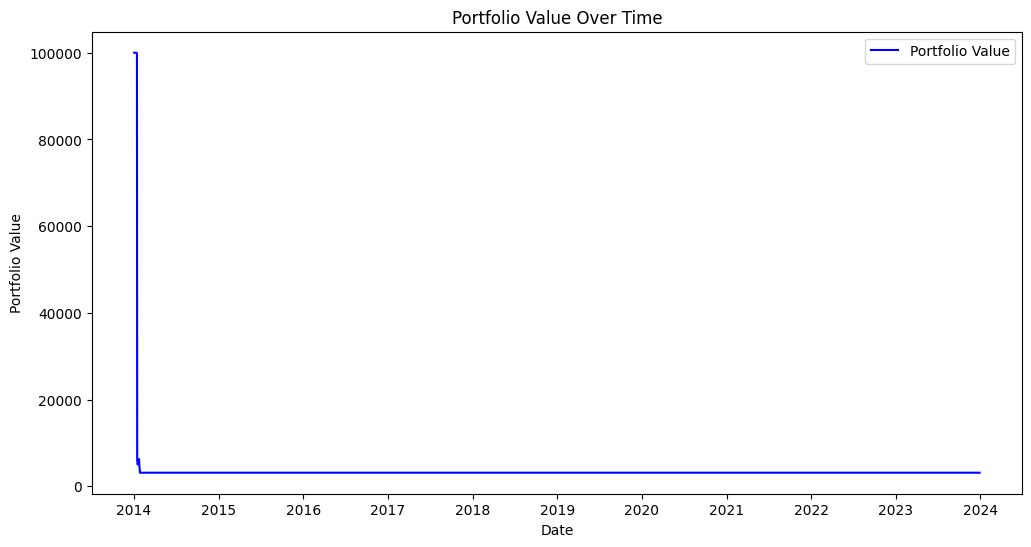

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio_Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


## **ADDING THE NEW INDICATOR TO IMPROVE THIS**

In [ ]:
import pandas as pd

# Calculate ADX
def calculate_adx(data, period=14):
    data['High_High'] = data['High'].rolling(window=period).max()
    data['Low_Low'] = data['Low'].rolling(window=period).min()
    data['High_Low'] = data['High_High'] - data['Low_Low']

    data['+DM'] = data['High'].diff().where(data['High'].diff() > data['Low'].diff(), 0)
    data['-DM'] = -data['Low'].diff().where(-data['Low'].diff() > data['High'].diff(), 0)

    data['TR'] = data[['High_Low', 'High', 'Close']].max(axis=1) - data[['Low_Low', 'Low', 'Close']].min(axis=1)

    data['+DI'] = 100 * (data['+DM'].rolling(window=period).sum() / data['TR'].rolling(window=period).sum())
    data['-DI'] = 100 * (data['-DM'].rolling(window=period).sum() / data['TR'].rolling(window=period).sum())

    data['DX'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI']))
    data['ADX'] = data['DX'].rolling(window=period).mean()

    return data

# Calculate ATR
def calculate_atr(data, period=14):
    data['H-L'] = data['High'] - data['Low']
    data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
    data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    data['ATR'] = data['TR'].rolling(window=period).mean()

    return data

# Applying the functions to the data
data = calculate_adx(data)
data = calculate_atr(data)


In [ ]:
# Initialize columns for signals
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Moving Average Crossover Signals
data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
data['Sell_Signal'][(data['EMA_20'] < data['EMA_50']) & (data['EMA_20'].shift(1) >= data['EMA_50'].shift(1))] = 1

# RSI Signals
data['Buy_Signal'][(data['RSI'] < 30) & (data['RSI'].shift(1) >= 30)] = 1
data['Sell_Signal'][(data['RSI'] > 70) & (data['RSI'].shift(1) <= 70)] = 1

# MACD Signals
data['Buy_Signal'][(data['MACD'] > data['MACD_Signal']) & (data['MACD'].shift(1) <= data['MACD_Signal'].shift(1))] = 1
data['Sell_Signal'][(data['MACD'] < data['MACD_Signal']) & (data['MACD'].shift(1) >= data['MACD_Signal'].shift(1))] = 1

# ADX Trend Strength Confirmation
data['Buy_Signal'][(data['ADX'] > 25) & (data['Buy_Signal'] == 1)] = 1  # Buy only if ADX confirms trend strength
data['Sell_Signal'][(data['ADX'] > 25) & (data['Sell_Signal'] == 1)] = 1  # Sell only if ADX confirms trend strength


<ipython-input-52-d26a277ae16f>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Buy_Signal'][(data['EMA_20'] > data['EMA_50']) & (data['EMA_20'].shift(1) <= data['EMA_50'].shift(1))] = 1
<ipython-input-52-d26a277ae16f>:6: SettingWithC

In [ ]:
stop_loss_pct = 0.02  # Example: 2% stop-loss
take_profit_pct = 0.05  # Example: 5% take-profit

# Update backtesting logic to include stop-loss and take-profit
for i in range(len(data)):
    if data['Buy_Signal'].iloc[i] == 1 and capital > 0:
        shares += capital // data['Close'].iloc[i]  # Buy shares
        capital -= shares * data['Close'].iloc[i]  # Deduct cost
        stop_loss_price = data['Close'].iloc[i] * (1 - stop_loss_pct)
        take_profit_price = data['Close'].iloc[i] * (1 + take_profit_pct)

    elif shares > 0:
        # Check for stop-loss or take-profit
        if data['Close'].iloc[i] < stop_loss_price or data['Close'].iloc[i] > take_profit_price:
            capital += shares * data['Close'].iloc[i]  # Sell shares
            shares = 0  # Reset shares


## 2ND BACKTEST

In [ ]:
# Initial parameters
initial_capital = 100000  # Starting capital
shares = 0  # Number of shares held
capital = initial_capital  # Current capital
portfolio_value = []  # To store portfolio value over time

# Backtesting loop
for i in range(len(data)):
    # Buy signal
    if data['Buy_Signal'].iloc[i] == 1:
        shares += capital // data['Close'].iloc[i]  # Buy as many shares as possible
        capital -= shares * data['Close'].iloc[i]  # Deduct cost from capital

    # Sell signal
    elif data['Sell_Signal'].iloc[i] == 1:
        capital += shares * data['Close'].iloc[i]  # Sell all shares
        shares = 0  # Reset shares to zero

    # Calculate total portfolio value (cash + value of shares)
    total_value = capital + (shares * data['Close'].iloc[i])
    portfolio_value.append(total_value)

# Add portfolio value to the DataFrame
data['Portfolio_Value'] = portfolio_value

# Calculate returns
data['Returns'] = data['Portfolio_Value'].pct_change()


In [ ]:
# Calculate performance metrics
total_return = (data['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital * 100
cagr = ((data['Portfolio_Value'].iloc[-1] / initial_capital) ** (1 / (len(data) / 252)) - 1) * 100  # Assuming 252 trading days
max_drawdown = (data['Portfolio_Value'].cummax() - data['Portfolio_Value']).max() / data['Portfolio_Value'].cummax().max() * 100

# Print the results
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")


Total Return: -96.87%
CAGR: -29.94%
Maximum Drawdown: 96.87%


# *SAME RESULTS GOT TO THINK IN A DIFFERENT APPROACH*

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

def calculate_atr(data, period=14):
    high_low = data['High'] - data['Low']
    high_close = (data['High'] - data['Close'].shift(1)).abs()
    low_close = (data['Low'] - data['Close'].shift(1)).abs()

    true_range = pd.DataFrame({
        'high_low': high_low,
        'high_close': high_close,
        'low_close': low_close
    }).max(axis=1)

    atr = true_range.rolling(window=period).mean()
    return atr

data['ATR'] = calculate_atr(data)


In [ ]:
def generate_signals(data):
    buy_signal = (data['RSI'] < 30) & (data['MACD'] > data['MACD_Signal'])
    sell_signal = (data['RSI'] > 70) & (data['MACD'] < data['MACD_Signal'])

    data['Buy_Signal'] = buy_signal.astype(int)
    data['Sell_Signal'] = sell_signal.astype(int)
    return data

data = generate_signals(data)


In [ ]:
def backtest(data):
    initial_capital = 10000
    shares = 0
    capital = initial_capital

    for i in range(len(data)):
        if data['Buy_Signal'].iloc[i] == 1:  # Buy Signal
            shares += capital // data['Close'].iloc[i]
            capital %= data['Close'].iloc[i]
        elif data['Sell_Signal'].iloc[i] == 1 and shares > 0:  # Sell Signal
            capital += shares * data['Close'].iloc[i]
            shares = 0

    final_value = capital + (shares * data['Close'].iloc[-1])
    return final_value

final_value = backtest(data)
print(f"Final Portfolio Value: {final_value:.2f}")


Final Portfolio Value: 10000.00


In [ ]:
# Initial parameters
initial_capital = 100000  # Starting capital
shares = 0  # Number of shares held
capital = initial_capital  # Current capital
portfolio_value = []  # To store portfolio value over time

# Backtesting loop
for i in range(len(data)):
    # Buy signal
    if data['Buy_Signal'].iloc[i] == 1:
        shares += capital // data['Close'].iloc[i]  # Buy as many shares as possible
        capital -= shares * data['Close'].iloc[i]  # Deduct cost from capital

    # Sell signal
    elif data['Sell_Signal'].iloc[i] == 1:
        capital += shares * data['Close'].iloc[i]  # Sell all shares
        shares = 0  # Reset shares to zero

    # Calculate total portfolio value (cash + value of shares)
    total_value = capital + (shares * data['Close'].iloc[i])
    portfolio_value.append(total_value)

# Add portfolio value to the DataFrame
data['Portfolio_Value'] = portfolio_value

# Calculate returns
data['Returns'] = data['Portfolio_Value'].pct_change()


In [ ]:
# Calculate performance metrics
total_return = (data['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital * 100
cagr = ((data['Portfolio_Value'].iloc[-1] / initial_capital) ** (1 / (len(data) / 252)) - 1) * 100  # Assuming 252 trading days
max_drawdown = (data['Portfolio_Value'].cummax() - data['Portfolio_Value']).max() / data['Portfolio_Value'].cummax().max() * 100

# Print the results
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")


Total Return: 0.00%
CAGR: 0.00%
Maximum Drawdown: 0.00%


# *Sentiment* BUT FAILED

In [ ]:
from textblob import TextBlob
import requests

def get_news_sentiment(news_headlines):
    sentiment_scores = []
    for headline in news_headlines:
        analysis = TextBlob(headline)
        sentiment_scores.append(analysis.sentiment.polarity)
    return sentiment_scores

# Example usage
news_headlines = ["Market is bullish today", "Economic indicators show recession signs"]
sentiment_scores = get_news_sentiment(news_headlines)


In [ ]:
def generate_signals(data):
    buy_signal = (data['RSI'] < 30) & (data['MACD'] > data['MACD_Signal']) & (data['Close'] > data['Bollinger_Upper'])
    sell_signal = (data['RSI'] > 70) & (data['MACD'] < data['MACD_Signal']) & (data['Close'] < data['Bollinger_Lower'])

    data['Buy_Signal'] = buy_signal.astype(int)
    data['Sell_Signal'] = sell_signal.astype(int)
    return data

data = generate_signals(data)


In [ ]:
def backtest(data):
    initial_capital = 10000
    shares = 0
    capital = initial_capital

    for i in range(len(data)):
        if data['Buy_Signal'].iloc[i] == 1:  # Buy Signal
            shares += capital // data['Close'].iloc[i]
            capital %= data['Close'].iloc[i]
        elif data['Sell_Signal'].iloc[i] == 1 and shares > 0:  # Sell Signal
            capital += shares * data['Close'].iloc[i]
            shares = 0

    final_value = capital + (shares * data['Close'].iloc[-1])
    return final_value

final_value = backtest(data)
print(f"Final Portfolio Value: {final_value:.2f}")


Final Portfolio Value: 10000.00


In [ ]:
def calculate_stop_loss(data):
    data['Stop_Loss'] = data['Close'] - (data['ATR'] * 1.5)  # 1.5 times the ATR
    return data

data = calculate_stop_loss(data)


## **Integrate Additional Financial Data**

In [ ]:
import requests

API_KEY = 'YOUR_ALPHA_VANTAGE_API_KEY'
url = f'https://www.alphavantage.co/query?function=GDP&apikey={API_KEY}'
response = requests.get(url)
gdp_data = response.json()


In [ ]:
NEWS_API_KEY = 'YOUR_NEWS_API_KEY'
news_url = f'https://newsapi.org/v2/everything?q=Nifty%2050&apiKey={NEWS_API_KEY}'
news_response = requests.get(news_url)
news_data = news_response.json()


In [ ]:
import sqlite3

# Connect to SQLite database (or create it)
conn = sqlite3.connect('financial_data.db')
c = conn.cursor()

# Create tables for different datasets
c.execute('''
    CREATE TABLE IF NOT EXISTS nifty_data (
        Date TEXT PRIMARY KEY,
        Open REAL,
        High REAL,
        Low REAL,
        Close REAL,
        Volume INTEGER
    )
''')

# Insert Nifty data
nifty_data.to_sql('nifty_data', conn, if_exists='replace', index=True)

# Commit changes and close the connection
conn.commit()
conn.close()


so as the google collab got api issue will be doing something else then

In [ ]:
import yfinance as yf
import time

def fetch_data():
    # Fetch historical data for Nifty 50
    nifty_data = yf.download('^NSEI', start='2014-01-01', end='2024-01-01')
    nifty_data.to_csv('/content/NSE50.csv')
    print("Data fetched and saved at /content/NSE50.csv")


In [ ]:
# Set the duration for fetching data
fetch_interval = 86400  # 24 hours in seconds

try:
    while True:
        fetch_data()  # Call the function to fetch data
        time.sleep(fetch_interval)  # Wait for the specified interval
except KeyboardInterrupt:
    print("Data fetching stopped.")


[*********************100%***********************]  1 of 1 completed


Data fetched and saved at /content/NSE50.csv
Data fetching stopped.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Modify the fetch_data function to save data to Google Drive
def fetch_data():
    nifty_data = yf.download('^NSEI', start='2010-01-01', end='2024-10-21')
    nifty_data.to_csv('/content/drive/MyDrive/NSE50.csv')  # Save to Google Drive
    print("Data fetched and saved at /content/drive/MyDrive/NSE50.csv")


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import yfinance as yf
import time
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def fetch_data():
    nifty_data = yf.download('^NSEI', start='2014-01-01', end='2024-01-01')
    nifty_data.to_csv('/content/drive/MyDrive/NSE50.csv')  # Save to Google Drive
    print("Data fetched and saved at /content/drive/MyDrive/NSE50.csv")

fetch_interval = 86400  # 24 hours in seconds

try:
    while True:
        fetch_data()  # Call the function to fetch data
        time.sleep(fetch_interval)  # Wait for the specified interval
except KeyboardInterrupt:
    print("Data fetching stopped.")


In [ ]:
import time

def fetch_data():
    start_time = time.time()  # Start timer
    nifty_data = yf.download('^NSEI', start='2014-01-01', end='2024-01-01')
    nifty_data.to_csv('/content/drive/MyDrive/NSE50.csv')  # Save to Google Drive
    end_time = time.time()  # End timer
    print(f"Data fetched and saved at /content/drive/MyDrive/NSE50.csv in {end_time - start_time:.2f} seconds")


# **Data Preprocessing but drive mount**

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/NSE50.csv', parse_dates=True, index_col='Date')


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data.fillna(method='ffill', inplace=True)  # Forward fill
# or
# data.dropna(inplace=True)  # Drop rows with missing values


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-72-9f5476cf5652>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])


In [ ]:
# Create lag features
for lag in range(1, 6):  # Creating 5 lag features
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)

# Create rolling features (e.g., rolling mean)
data['Rolling_Mean_5'] = data['Close'].rolling(window=5).mean()


In [ ]:
# Drop original 'Close' if lag features are created
# data.drop(columns=['Close'], inplace=True)


In [ ]:
print(data.shape)
print(data.describe())


(2453, 12)
              Open         High          Low        Close     Adj Close  \
count  2453.000000  2453.000000  2453.000000  2453.000000   2453.000000   
mean      0.377819     0.377018     0.374998     0.374192  11904.825792   
std       0.251337     0.252273     0.250849     0.251483   3967.843129   
min       0.000000     0.000000     0.000000     0.000000   6000.899902   
25%       0.163597     0.162079     0.162436     0.160203   8528.549805   
50%       0.306424     0.304724     0.304395     0.302888  10779.799805   
75%       0.621208     0.621124     0.618662     0.617675  15746.450195   
max       1.000000     1.000000     1.000000     1.000000  21778.699219   

            Volume  Close_Lag_1  Close_Lag_2  Close_Lag_3  Close_Lag_4  \
count  2453.000000  2452.000000  2451.000000  2450.000000  2449.000000   
mean      0.169528     0.373938     0.373683     0.373430     0.373183   
std       0.109717     0.251219     0.250952     0.250691     0.250444   
min       0.00000

## feature enginnering with mount

In [ ]:
# Simple Moving Averages (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()

# Exponential Moving Averages (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

print(data.describe())


              Open         High          Low        Close     Adj Close  \
count  2354.000000  2354.000000  2354.000000  2354.000000   2354.000000   
mean      0.392145     0.391394     0.389259     0.388501  12130.586011   
std       0.246405     0.247324     0.245982     0.246585   3890.569389   
min       0.068147     0.064396     0.056686     0.061460   6970.600098   
25%       0.173505     0.171427     0.170549     0.169448   8674.412598   
50%       0.312596     0.311270     0.310058     0.308803  10873.125000   
75%       0.627375     0.625800     0.624100     0.622980  15830.149902   
max       1.000000     1.000000     1.000000     1.000000  21778.699219   

            Volume  Close_Lag_1  Close_Lag_2  Close_Lag_3  Close_Lag_4  ...  \
count  2354.000000  2354.000000  2354.000000  2354.000000  2354.000000  ...   
mean      0.172722     0.388110     0.387719     0.387333     0.386953  ...   
std       0.110710     0.246349     0.246108     0.245872     0.245649  ...   
min     

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)


In [ ]:
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()


In [ ]:
def bollinger_bands(data, window=20, num_std=2):
    sma = data['Close'].rolling(window=window).mean()
    rstd = data['Close'].rolling(window=window).std()
    data['Bollinger_Upper'] = sma + (rstd * num_std)
    data['Bollinger_Lower'] = sma - (rstd * num_std)

bollinger_bands(data)


In [ ]:
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['Support1'] = (data['Pivot'] * 2) - data['High']
    data['Resistance1'] = (data['Pivot'] * 2) - data['Low']

calculate_pivot_points(data)


In [ ]:
data.dropna(inplace=True)


In [ ]:
print(data.tail())  # Show the last few rows of the data


                Open      High       Low     Close     Adj Close    Volume  \
Date                                                                         
2023-12-22  0.972020  0.973964  0.971702  0.972791  21349.400391  0.157206   
2023-12-26  0.976412  0.979453  0.977862  0.978619  21441.349609  0.121204   
2023-12-27  0.984801  0.992036  0.988428  0.992144  21654.750000  0.141634   
2023-12-28  0.998566  1.000000  1.000000  1.000000  21778.699219  0.217062   
2023-12-29  1.000000  0.998027  0.999930  0.997002  21731.400391  0.149586   

            Close_Lag_1  Close_Lag_2  Close_Lag_3  Close_Lag_4  ...  \
Date                                                            ...   
2023-12-22     0.966811     0.960162     0.979363     0.977180  ...   
2023-12-26     0.972791     0.966811     0.960162     0.979363  ...   
2023-12-27     0.978619     0.972791     0.966811     0.960162  ...   
2023-12-28     0.992144     0.978619     0.972791     0.966811  ...   
2023-12-29     1.000000    

# # Signal

## RSI

In [ ]:
# Initialize signal columns
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Generate buy signals
data.loc[
    (data['RSI'] < 30) &
    (data['MACD'] > data['MACD_Signal']) &
    (data['Close'] > data['SMA_50']), 'Buy_Signal'] = 1

# Generate sell signals
data.loc[
    (data['RSI'] > 70) &
    (data['MACD'] < data['MACD_Signal']) &
    (data['Close'] < data['SMA_50']), 'Sell_Signal'] = 1


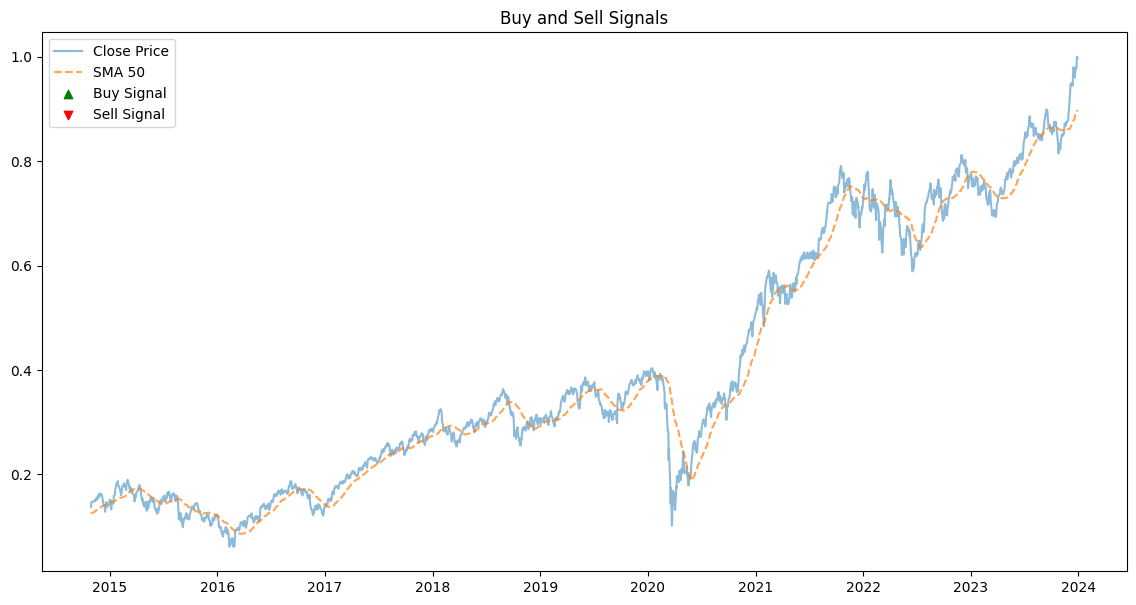

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--', alpha=0.7)
plt.scatter(data[data['Buy_Signal'] == 1].index, data[data['Buy_Signal'] == 1]['Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data[data['Sell_Signal'] == 1].index, data[data['Sell_Signal'] == 1]['Close'], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Buy and Sell Signals')
plt.legend()
plt.show()


In [ ]:
print(data[['Close', 'RSI', 'MACD', 'Buy_Signal', 'Sell_Signal']].tail(10))


               Close        RSI      MACD  Buy_Signal  Sell_Signal
Date                                                              
2023-12-15  0.979588  93.360211  0.027097           0            0
2023-12-18  0.977180  91.113055  0.028015           0            0
2023-12-19  0.979363  90.204598  0.028590           0            0
2023-12-20  0.960162  76.031608  0.027182           0            0
2023-12-21  0.966811  75.659666  0.026300           0            0
2023-12-22  0.972791  70.719263  0.025786           0            0
2023-12-26  0.978619  69.251046  0.025555           0            0
2023-12-27  0.992144  71.683535  0.026161           0            0
2023-12-28  1.000000  75.204670  0.026965           0            0
2023-12-29  0.997002  72.152521  0.027048           0            0


In [ ]:
# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Now, try printing the desired columns again
print(data[['Date', 'Close', 'RSI', 'MACD', 'MACD_Signal', 'SMA_50', 'Buy_Signal', 'Sell_Signal']].tail(10))


           Date     Close        RSI      MACD  MACD_Signal    SMA_50  \
2245 2023-12-15  0.979588  93.360211  0.027097     0.022307  0.877440   
2246 2023-12-18  0.977180  91.113055  0.028015     0.023449  0.879953   
2247 2023-12-19  0.979363  90.204598  0.028590     0.024477  0.882371   
2248 2023-12-20  0.960162  76.031608  0.027182     0.025018  0.884268   
2249 2023-12-21  0.966811  75.659666  0.026300     0.025275  0.886477   
2250 2023-12-22  0.972791  70.719263  0.025786     0.025377  0.888581   
2251 2023-12-26  0.978619  69.251046  0.025555     0.025412  0.890647   
2252 2023-12-27  0.992144  71.683535  0.026161     0.025562  0.893006   
2253 2023-12-28  1.000000  75.204670  0.026965     0.025843  0.895576   
2254 2023-12-29  0.997002  72.152521  0.027048     0.026084  0.898111   

      Buy_Signal  Sell_Signal  
2245           0            0  
2246           0            0  
2247           0            0  
2248           0            0  
2249           0            0  
2250

In [ ]:
# Example: Adjust RSI thresholds
data.loc[
    (data['RSI'] < 35) &  # Lower threshold
    (data['MACD'] > data['MACD_Signal']) &
    (data['Close'] > data['SMA_50']), 'Buy_Signal'] = 1

data.loc[
    (data['RSI'] > 65) &  # Higher threshold
    (data['MACD'] < data['MACD_Signal']) &
    (data['Close'] < data['SMA_50']), 'Sell_Signal'] = 1


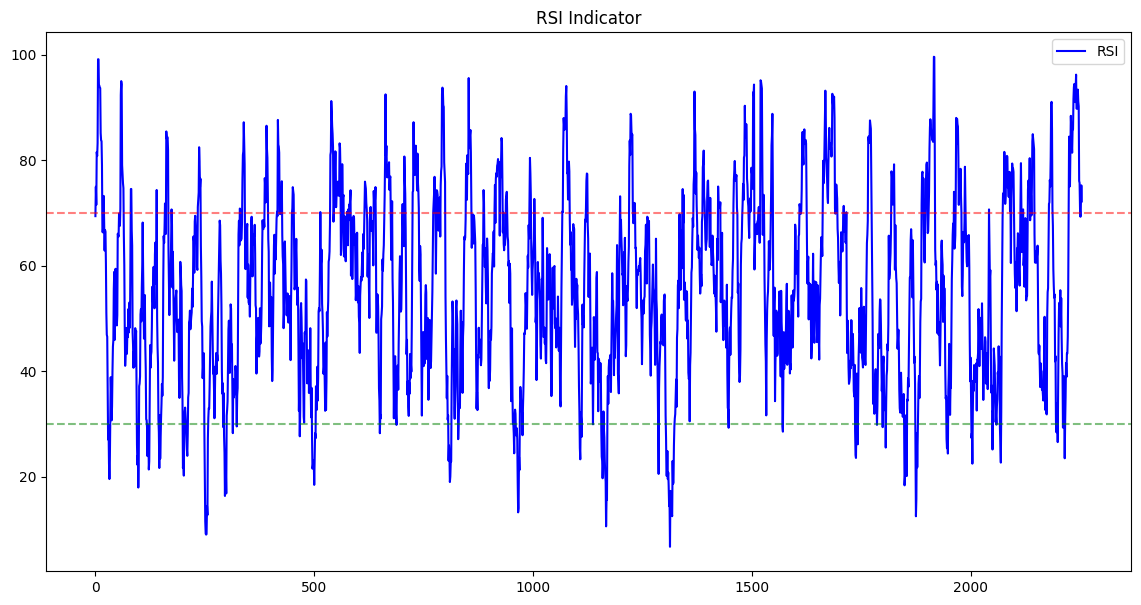

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', color='red', alpha=0.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.5)
plt.title('RSI Indicator')
plt.legend()
plt.show()


In [ ]:
# Initialize signal columns
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Generate buy signals
data.loc[
    (data['RSI'] < 30) &
    (data['MACD'] > data['MACD_Signal']) &
    (data['Close'] > data['SMA_50']), 'Buy_Signal'] = 1

# Generate sell signals
data.loc[
    (data['RSI'] > 70) &
    (data['MACD'] < data['MACD_Signal']) &
    (data['Close'] < data['SMA_50']), 'Sell_Signal'] = 1


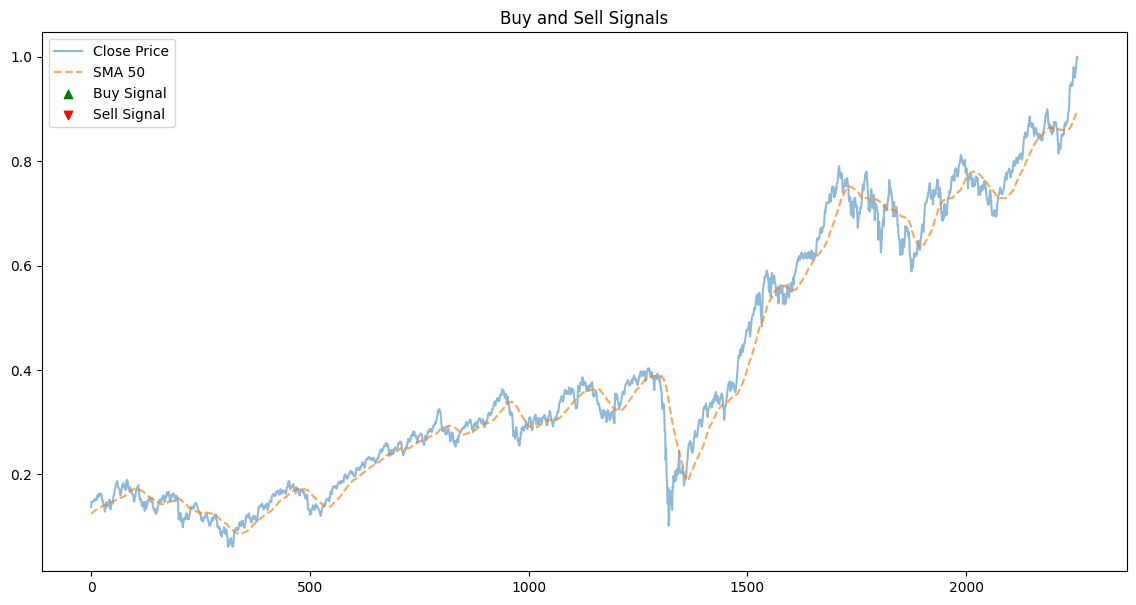

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--', alpha=0.7)
plt.scatter(data[data['Buy_Signal'] == 1].index, data[data['Buy_Signal'] == 1]['Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data[data['Sell_Signal'] == 1].index, data[data['Sell_Signal'] == 1]['Close'], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Buy and Sell Signals')
plt.legend()
plt.show()


In [ ]:
# Count how many rows meet the buy condition
buy_condition = (data['RSI'] < 30) & (data['MACD'] > data['MACD_Signal']) & (data['Close'] > data['SMA_50'])
print("Number of Buy Conditions Met:", buy_condition.sum())

# Count how many rows meet the sell condition
sell_condition = (data['RSI'] > 70) & (data['MACD'] < data['MACD_Signal']) & (data['Close'] < data['SMA_50'])
print("Number of Sell Conditions Met:", sell_condition.sum())


Number of Buy Conditions Met: 0
Number of Sell Conditions Met: 0


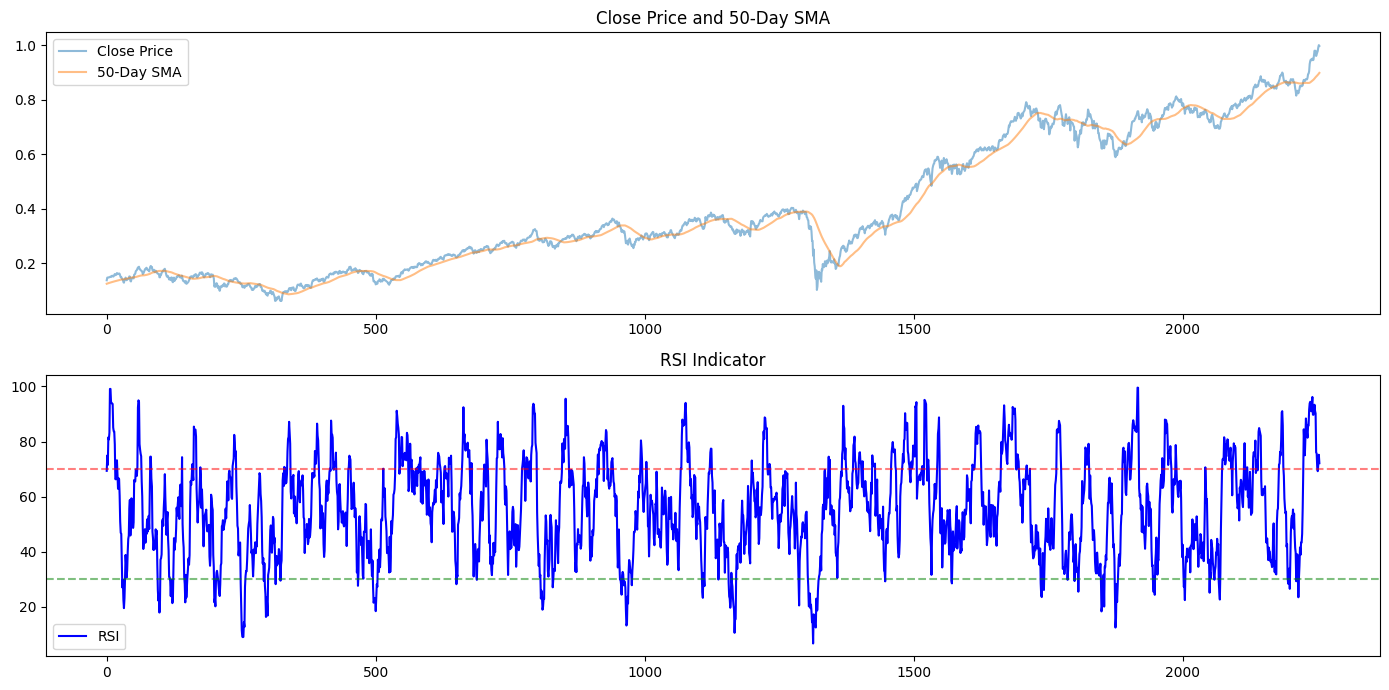

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Close Price and SMA
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_50'], label='50-Day SMA', alpha=0.5)
plt.title('Close Price and 50-Day SMA')
plt.legend()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', color='red', alpha=0.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.5)
plt.title('RSI Indicator')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())


                   Open         High          Low        Close  Volume  \
Date                                                                     
2014-01-02  6301.250000  6358.299805  6211.299805  6221.149902  158100   
2014-01-03  6194.549805  6221.700195  6171.250000  6211.149902  139000   
2014-01-06  6220.850098  6224.700195  6170.250000  6191.450195  118300   
2014-01-07  6203.899902  6221.500000  6144.750000  6162.250000  138600   
2014-01-08  6178.049805  6192.100098  6160.350098  6174.600098  146900   

                MACD  MACD_Signal       EMA_20       EMA_50      EMA_100  \
Date                                                                       
2014-01-02  0.000000     0.000000  6221.149902  6221.149902  6221.149902   
2014-01-03 -0.797721    -0.159544  6220.197521  6220.757745  6220.951883   
2014-01-06 -2.985111    -0.724658  6217.459681  6219.608430  6220.367691   
2014-01-07 -6.994221    -1.978570  6212.201616  6217.359080  6219.216845   
2014-01-08 -9.070362    -

In [ ]:
# Check the last 20 rows of the relevant columns
print(data[['Close', 'RSI', 'MACD', 'MACD_Signal', 'EMA_50']].tail(20))


                   Close        RSI        MACD  MACD_Signal        EMA_50
Date                                                                      
2023-12-01  20267.900391  91.580129  174.542457   102.615091  19615.491012
2023-12-04  20686.800781  93.856720  225.566447   127.205362  19657.503160
2023-12-05  20855.099609  94.437291  276.397497   157.043789  19704.467726
2023-12-06  20937.699219  93.860130  319.661707   189.567373  19752.829746
2023-12-07  20901.150391  90.986930  346.999724   221.053843  19797.861928
2023-12-08  20969.400391  93.559058  369.908429   250.824760  19843.804613
2023-12-11  20997.099609  96.192890  385.850989   277.830006  19889.031867
2023-12-12  20906.400391  89.772010  386.709171   299.605839  19928.928672
2023-12-13  20926.349609  89.710058  384.565984   316.597868  19968.043219
2023-12-14  21182.699219  91.844522  398.953872   333.069069  20015.676787
2023-12-15  21456.650391  93.360211  427.533606   351.961976  20072.185556
2023-12-18  21418.650391 

In [ ]:
# Initialize Buy and Sell Signal columns
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Generate buy signals
data.loc[
    (data['RSI'] < 40) &
    (data['MACD'] > data['MACD_Signal']) &
    (data['Close'] > data['EMA_20']), 'Buy_Signal'] = 1

# Generate sell signals
data.loc[
    (data['RSI'] > 60) &
    (data['MACD'] < data['MACD_Signal']) &
    (data['Close'] < data['EMA_20']), 'Sell_Signal'] = 1

# Display the last few rows to see if signals are generated
print(data[['Close', 'RSI', 'MACD', 'MACD_Signal', 'EMA_20', 'Buy_Signal', 'Sell_Signal']].tail(15))


                   Close        RSI        MACD  MACD_Signal        EMA_20  \
Date                                                                         
2023-12-08  20969.400391  93.559058  369.908429   250.824760  20202.965955   
2023-12-11  20997.099609  96.192890  385.850989   277.830006  20278.597731   
2023-12-12  20906.400391  89.772010  386.709171   299.605839  20338.388461   
2023-12-13  20926.349609  89.710058  384.565984   316.597868  20394.384761   
2023-12-14  21182.699219  91.844522  398.953872   333.069069  20469.462328   
2023-12-15  21456.650391  93.360211  427.533606   351.961976  20563.480239   
2023-12-18  21418.650391  91.113055  442.021619   369.973905  20644.925015   
2023-12-19  21453.099609  90.204598  451.083428   386.195810  20721.894024   
2023-12-20  21150.150391  76.031608  428.875695   394.731787  20762.680345   
2023-12-21  21255.050781  75.659666  414.957124   398.776854  20809.572767   
2023-12-22  21349.400391  70.719263  406.849869   400.391457  20

In [ ]:
print(f"Number of Buy Conditions Met: {data['Buy_Signal'].sum()}")
print(f"Number of Sell Conditions Met: {data['Sell_Signal'].sum()}")


Number of Buy Conditions Met: 6
Number of Sell Conditions Met: 3


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Initialize Buy and Sell Signal columns
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Define thresholds
buy_threshold = 20
sell_threshold = 95

# Generate buy signals based on RSI
data.loc[data['RSI'] < buy_threshold, 'Buy_Signal'] = 1

# Generate sell signals based on RSI
data.loc[data['RSI'] > sell_threshold, 'Sell_Signal'] = 1

# Display the last few rows to see if signals are generated
print(data[['Close', 'RSI', 'Buy_Signal', 'Sell_Signal']].tail(100))


                   Close        RSI  Buy_Signal  Sell_Signal
Date                                                        
2023-08-03  19381.650391  43.649083           0            0
2023-08-04  19517.000000  43.191330           0            0
2023-08-07  19597.300781  44.833252           0            0
2023-08-08  19570.849609  40.718328           0            0
2023-08-09  19632.550781  36.957241           0            0
...                  ...        ...         ...          ...
2023-12-22  21349.400391  70.719263           0            0
2023-12-26  21441.349609  69.251046           0            0
2023-12-27  21654.750000  71.683535           0            0
2023-12-28  21778.699219  75.204670           0            0
2023-12-29  21731.400391  72.152521           0            0

[100 rows x 4 columns]


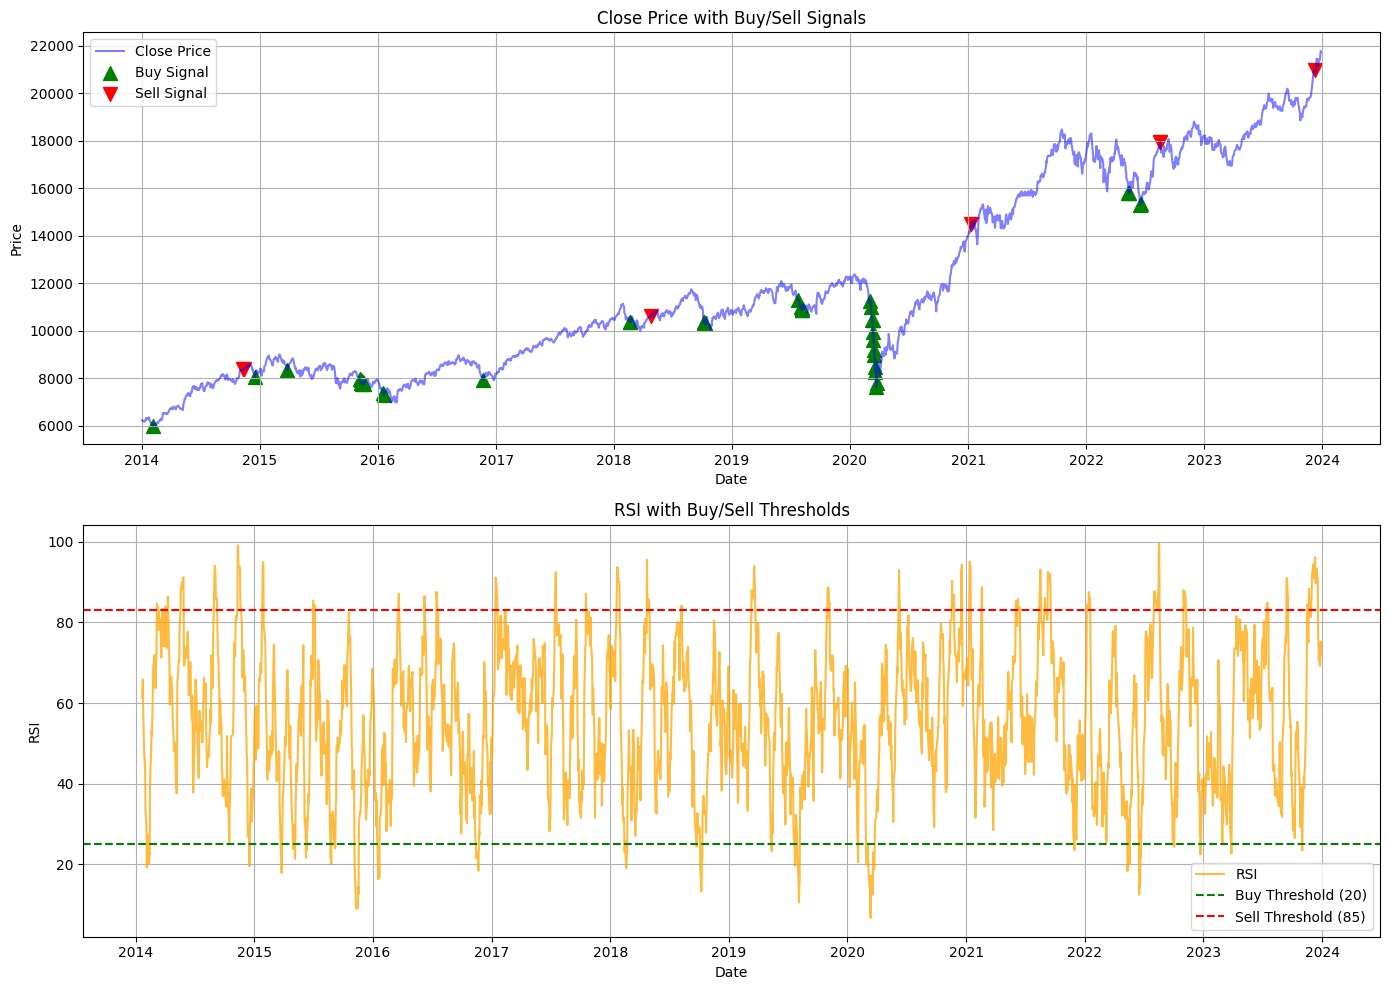

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Closing Price
ax1.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(data[data['Buy_Signal'] == 1].index,
            data[data['Buy_Signal'] == 1]['Close'],
            marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(data[data['Sell_Signal'] == 1].index,
            data[data['Sell_Signal'] == 1]['Close'],
            marker='v', color='red', label='Sell Signal', s=100)
ax1.set_title('Close Price with Buy/Sell Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='orange', alpha=0.75)
ax2.axhline(y=25, color='green', linestyle='--', label='Buy Threshold (20)')
ax2.axhline(y=83, color='red', linestyle='--', label='Sell Threshold (85)')
ax2.set_title('RSI with Buy/Sell Thresholds')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()


In [ ]:
print(data.tail(10))  # View the last 10 rows


                    Open          High           Low         Close  Volume  \
Date                                                                         
2023-12-15  21287.449219  21492.300781  21235.300781  21456.650391  508800   
2023-12-18  21434.800781  21482.800781  21365.349609  21418.650391  249700   
2023-12-19  21477.650391  21505.050781  21337.750000  21453.099609  249800   
2023-12-20  21543.500000  21593.000000  21087.349609  21150.150391  363900   
2023-12-21  21033.949219  21288.349609  20976.800781  21255.050781  277500   
2023-12-22  21295.849609  21390.500000  21232.449219  21349.400391  284700   
2023-12-26  21365.199219  21477.150391  21329.449219  21441.349609  219500   
2023-12-27  21497.650391  21675.750000  21495.800781  21654.750000  256500   
2023-12-28  21715.000000  21801.449219  21678.000000  21778.699219  393100   
2023-12-29  21737.650391  21770.300781  21676.900391  21731.400391  270900   

                  MACD  MACD_Signal        EMA_20        EMA_50

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)
logging.info('This is an info message.')


In [ ]:
data.to_csv('rsi_results.csv')


<ipython-input-110-fffdb0fed243>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Strategy_Returns'].iloc[i] = data['Market_Returns'].iloc[i]
<ipython-input-110-fffdb0fed243>:10: SettingWithCopyWarning: 
A value is trying to be set on

Total Return: -46.41%
CAGR: -6.21%
Maximum Drawdown: 46.41%


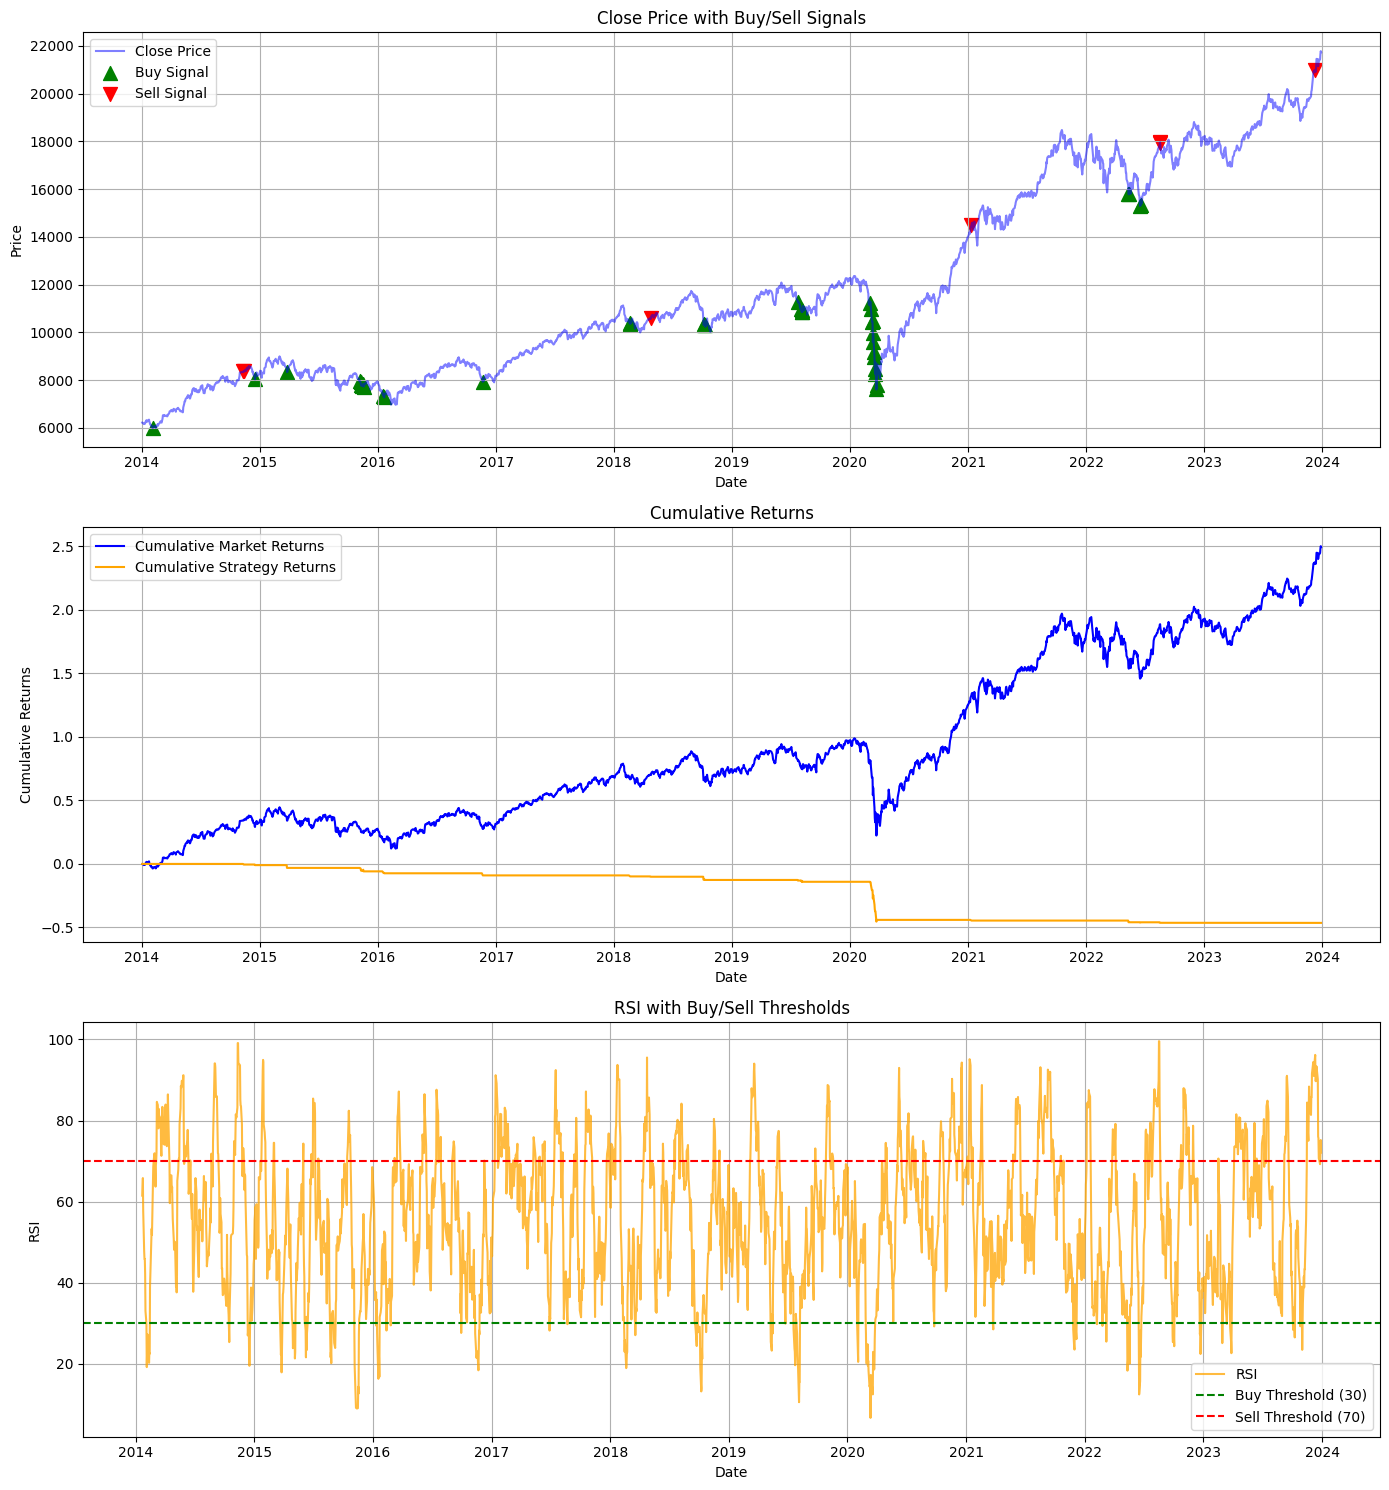

In [ ]:
# Calculate daily returns
data['Market_Returns'] = data['Close'].pct_change()

# Initialize strategy returns
data['Strategy_Returns'] = 0.0

# Calculate strategy returns based on signals
for i in range(1, len(data)):
    if data['Buy_Signal'].iloc[i] == 1:
        data['Strategy_Returns'].iloc[i] = data['Market_Returns'].iloc[i]
    elif data['Sell_Signal'].iloc[i] == 1:
        data['Strategy_Returns'].iloc[i] = -data['Market_Returns'].iloc[i]

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

# Calculate performance metrics
total_return = data['Cumulative_Strategy_Returns'].iloc[-1] * 100
cagr = (1 + total_return / 100) ** (1 / (len(data) / 252)) - 1  # assuming 252 trading days
max_drawdown = (data['Cumulative_Strategy_Returns'].cummax() - data['Cumulative_Strategy_Returns']).max() * 100

# Print performance metrics
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Create a figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15))

# Plot Closing Price with Buy/Sell Signals
ax1.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(data[data['Buy_Signal'] == 1].index,
            data[data['Buy_Signal'] == 1]['Close'],
            marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(data[data['Sell_Signal'] == 1].index,
            data[data['Sell_Signal'] == 1]['Close'],
            marker='v', color='red', label='Sell Signal', s=100)
ax1.set_title('Close Price with Buy/Sell Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

# Plot Cumulative Returns
ax2.plot(data.index, data['Cumulative_Market_Returns'], label='Cumulative Market Returns', color='blue')
ax2.plot(data.index, data['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns', color='orange')
ax2.set_title('Cumulative Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Returns')
ax2.legend()
ax2.grid()

# Plot RSI
ax3.plot(data.index, data['RSI'], label='RSI', color='orange', alpha=0.75)
ax3.axhline(y=30, color='green', linestyle='--', label='Buy Threshold (30)')
ax3.axhline(y=70, color='red', linestyle='--', label='Sell Threshold (70)')
ax3.set_title('RSI with Buy/Sell Thresholds')
ax3.set_xlabel('Date')
ax3.set_ylabel('RSI')
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()


RSI Summary Statistics:
count    2440.000000
mean       56.057072
std        17.540630
min         6.679764
25%        43.001319
50%        55.911811
75%        69.050945
max        99.582373
Name: RSI, dtype: float64

Number of Overbought Conditions (RSI > 70): 576
Number of Oversold Conditions (RSI < 30): 168


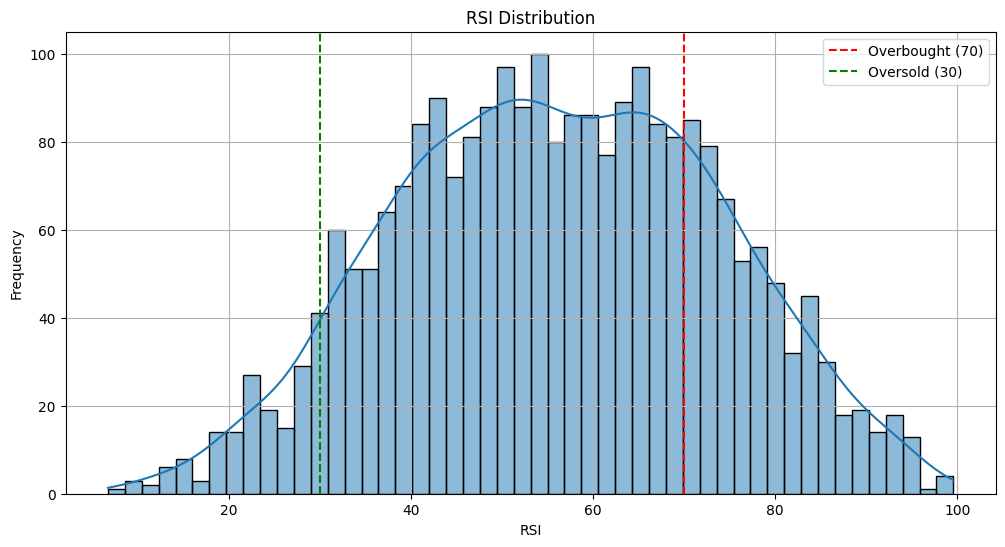

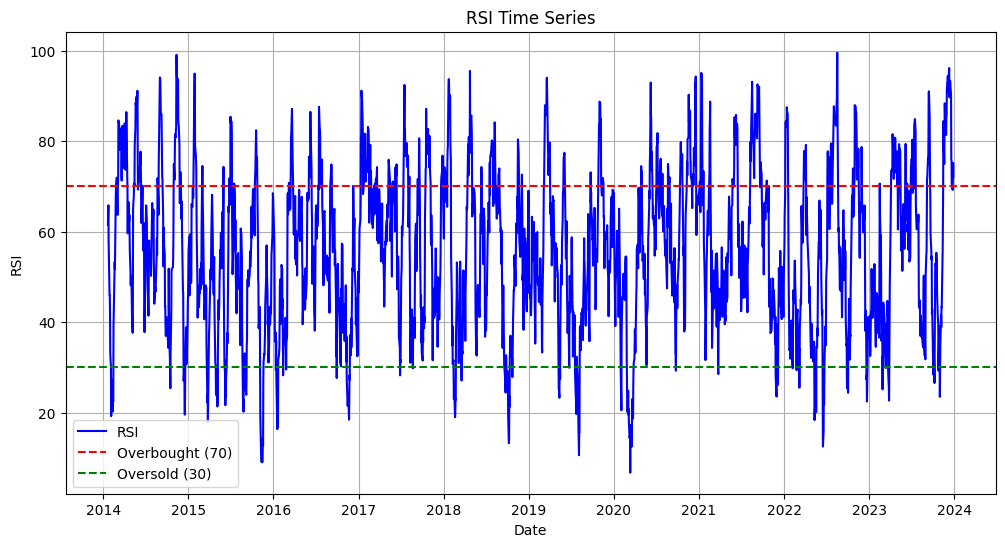

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Calculate RSI (if not already done)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Assuming RSI is already in the dataset, if not uncomment the line below
# data['RSI'] = calculate_rsi(data)

# Summary Statistics of RSI
rsi_summary = data['RSI'].describe()
print("RSI Summary Statistics:")
print(rsi_summary)

# Count of Overbought and Oversold Conditions
overbought_count = (data['RSI'] > 70).sum()
oversold_count = (data['RSI'] < 30).sum()

print(f"\nNumber of Overbought Conditions (RSI > 70): {overbought_count}")
print(f"Number of Oversold Conditions (RSI < 30): {oversold_count}")

# Plotting RSI Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['RSI'], bins=50, kde=True)
plt.axvline(x=70, color='red', linestyle='--', label='Overbought (70)')
plt.axvline(x=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Distribution')
plt.xlabel('RSI')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Time Series Plot of RSI
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Time Series')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


## MACD

In [ ]:
# Calculate the MACD and Signal Line
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()  # 12-day EMA
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()  # 26-day EMA
data['MACD'] = data['EMA_12'] - data['EMA_26']  # MACD Line
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()  # Signal Line
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']  # Histogram

# Display the last few rows to see the MACD values
print(data[['Close', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail(15))


                   Close        MACD  MACD_Signal   MACD_Hist
Date                                                         
2023-12-08  20969.400391  369.908429   250.824760  119.083669
2023-12-11  20997.099609  385.850989   277.830006  108.020983
2023-12-12  20906.400391  386.709171   299.605839   87.103332
2023-12-13  20926.349609  384.565984   316.597868   67.968116
2023-12-14  21182.699219  398.953872   333.069069   65.884803
2023-12-15  21456.650391  427.533606   351.961976   75.571630
2023-12-18  21418.650391  442.021619   369.973905   72.047714
2023-12-19  21453.099609  451.083428   386.195810   64.887619
2023-12-20  21150.150391  428.875695   394.731787   34.143909
2023-12-21  21255.050781  414.957124   398.776854   16.180270
2023-12-22  21349.400391  406.849869   400.391457    6.458412
2023-12-26  21441.349609  403.196546   400.952475    2.244071
2023-12-27  21654.750000  412.762817   403.314543    9.448273
2023-12-28  21778.699219  425.441595   407.739954   17.701641
2023-12-

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Initialize Buy and Sell Signal columns
data['Buy_Signal'] = 0
data['Sell_Signal'] = 0

# Generate buy signals (when MACD crosses above Signal line)
data.loc[
    (data['MACD'] > data['MACD_Signal']) &
    (data['MACD'].shift(1) <= data['MACD_Signal'].shift(1)), 'Buy_Signal'] = 1

# Generate sell signals (when MACD crosses below Signal line)
data.loc[
    (data['MACD'] < data['MACD_Signal']) &
    (data['MACD'].shift(1) >= data['MACD_Signal'].shift(1)), 'Sell_Signal'] = 1

# Display the last few rows to see if signals are generated
print(data[['Close', 'MACD', 'MACD_Signal', 'Buy_Signal', 'Sell_Signal']].tail(15))


                   Close        MACD  MACD_Signal  Buy_Signal  Sell_Signal
Date                                                                      
2023-12-08  20969.400391  369.908429   250.824760           0            0
2023-12-11  20997.099609  385.850989   277.830006           0            0
2023-12-12  20906.400391  386.709171   299.605839           0            0
2023-12-13  20926.349609  384.565984   316.597868           0            0
2023-12-14  21182.699219  398.953872   333.069069           0            0
2023-12-15  21456.650391  427.533606   351.961976           0            0
2023-12-18  21418.650391  442.021619   369.973905           0            0
2023-12-19  21453.099609  451.083428   386.195810           0            0
2023-12-20  21150.150391  428.875695   394.731787           0            0
2023-12-21  21255.050781  414.957124   398.776854           0            0
2023-12-22  21349.400391  406.849869   400.391457           0            0
2023-12-26  21441.349609 

In [ ]:
# Backtesting logic
initial_capital = 10000  # Initial capital
positions = data['Buy_Signal'].diff().fillna(0)  # Buy/Sell positions
portfolio = pd.DataFrame(index=data.index)
portfolio['Holdings'] = (positions * data['Close']).cumsum()  # Cumulative holdings value
portfolio['Cash'] = initial_capital - (positions * data['Close']).cumsum().shift().fillna(0)  # Cash management
portfolio['Total_Value'] = portfolio['Holdings'] + portfolio['Cash']  # Total portfolio value

# Calculate returns
portfolio['Returns'] = portfolio['Total_Value'].pct_change().fillna(0)

# Summary statistics
total_return = (portfolio['Total_Value'].iloc[-1] - initial_capital) / initial_capital * 100
cagr = (portfolio['Total_Value'].iloc[-1] / initial_capital) ** (1 / (len(portfolio) / 252)) - 1  # Assuming 252 trading days
max_drawdown = (portfolio['Total_Value'] / portfolio['Total_Value'].cummax() - 1).min() * 100

print(f'Total Return: {total_return:.2f}%')
print(f'CAGR: {cagr:.2f}%')
print(f'Maximum Drawdown: {max_drawdown:.2f}%')


Total Return: 0.00%
CAGR: 0.00%
Maximum Drawdown: -132.73%


## Volume Pressure Oscillator


### Volume Pressure Oscillator


In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')


def calculate_pressure_volume(df, signal=3, long=27, vmacd=True, vinv=False, norm=False):
    # Ensure we have the necessary columns
    df['volume'] = np.where(df['volume'] > 0, df['volume'], 1)
    df['atr'] = df['high'].rolling(window=1).max() - df['low'].rolling(window=1).min()  # Simplified ATR

    # Bull and Bear Power calculations
    df['BP'] = np.where(df['close'] < df['open'],
                        np.where(df['close'].shift(1) < df['open'],
                                 np.maximum(df['high'] - df['close'].shift(1), df['close'] - df['low']),
                                 np.maximum(df['high'] - df['open'], df['close'] - df['low'])),
                        np.where(df['close'] > df['open'],
                                 np.where(df['close'].shift(1) > df['open'],
                                          df['high'] - df['low'],
                                          np.maximum(df['open'] - df['close'].shift(1), df['high'] - df['low'])),
                                 np.where(df['high'] - df['close'] > df['close'] - df['low'],
                                          np.where(df['close'].shift(1) < df['open'],
                                                   np.maximum(df['high'] - df['close'].shift(1), df['close'] - df['low']),
                                                   df['high'] - df['open']),
                                          np.where(df['high'] - df['close'] < df['close'] - df['low'],
                                                   np.where(df['close'].shift(1) < df['open'],
                                                            df['high'] - df['low'],
                                                            np.maximum(df['open'] - df['close'].shift(1), df['high'] - df['low'])),
                                                   np.where(df['close'].shift(1) > df['open'],
                                                            np.maximum(df['high'] - df['open'], df['close'] - df['low']),
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close']))))))

    df['SP'] = np.where(df['close'] < df['open'],
                        np.where(df['close'].shift(1) > df['open'],
                                 np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                 df['high'] - df['low']),
                        np.where(df['close'] > df['open'],
                                 np.where(df['close'].shift(1) > df['open'],
                                          np.maximum(df['close'].shift(1) - df['low'], df['high'] - df['close']),
                                          np.maximum(df['open'] - df['low'], df['high'] - df['close'])),
                                 np.where(df['high'] - df['close'] > df['close'] - df['low'],
                                          np.where(df['close'].shift(1) < df['open'],
                                                   np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                                   df['high'] - df['low']),
                                          np.where(df['high'] - df['close'] < df['close'] - df['low'],
                                                   np.where(df['close'].shift(1) < df['open'],
                                                            df['high'] - df['low'],
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close'])),
                                                   np.where(df['close'].shift(1) > df['open'],
                                                            np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close']))))))

    df['TP'] = df['BP'] + df['SP']

    # Volume Pressure calculations
    df['BPV'] = (df['BP'] / df['TP']) * df['volume']
    df['SPV'] = (df['SP'] / df['TP']) * df['volume']
    df['TPV'] = df['BPV'] + df['SPV']

    # Exponential Moving Averages
    df['BPV_avg'] = df['BPV'].ewm(span=signal).mean().ewm(span=signal).mean()
    df['SPV_avg'] = df['SPV'].ewm(span=signal).mean().ewm(span=signal).mean()
    df['TPV_avg'] = df['TPV'].ewm(span=signal).mean().ewm(span=signal).mean()

    # Normalized Version
    df['VN'] = df['volume'] / df['volume'].ewm(span=long).mean()
    df['BPN'] = ((df['BP'] / df['BP'].ewm(span=long).mean()) * df['VN']) * 100
    df['SPN'] = ((df['SP'] / df['SP'].ewm(span=long).mean()) * df['VN']) * 100
    df['TPN'] = df['BPN'] + df['SPN']

    df['nbf'] = df['BPN'].ewm(span=signal).mean()
    df['nsf'] = df['SPN'].ewm(span=signal).mean()
    df['tpf'] = df['TPN'].ewm(span=signal).mean()
    df['ndif'] = df['nbf'] - df['nsf']

    # Conditional Selectors
    df['BPc'] = np.where(df['BPV'] > df['SPV'], df['BPV'], -abs(df['BPV']))
    df['SPc'] = np.where(df['SPV'] > df['BPV'], df['SPV'], -abs(df['SPV']))

    if norm:
        df['BPcon'] = df['BPN']
        df['SPcon'] = df['SPN']
        df['BPAcon'] = df['nbf']
        df['SPAcon'] = df['nsf']
        df['TPAcon'] = df['tpf']
    else:
        df['BPcon'] = df['BPc']
        df['SPcon'] = df['SPc']
        df['BPAcon'] = df['BPV_avg']
        df['SPAcon'] = df['SPV_avg']
        df['TPAcon'] = df['TPV_avg']

    # Volume Pressure Oscillator
    if vinv:
        df['vpo1'] = ((df['BPV_avg'].rolling(window=long).sum() - df['SPV_avg'].rolling(window=long).sum()) / df['TPV_avg'].rolling(window=long).sum()) * 100
        df['vpo2'] = ((df['nbf'].rolling(window=long).sum() - df['nsf'].rolling(window=long).sum()) / df['tpf'].rolling(window=long).sum()) * 100
    else:
        df['vpo1'] = ((df['BPV_avg'] - df['SPV_avg']) / df['TPV_avg']) * 100
        df['vpo2'] = ((df['nbf'] - df['nsf']) / df['tpf']) * 100

    df['vph'] = df['vpo1'].fillna(0) - df['vpo2'].fillna(0)

    return df

# Example usage:
# df = pd.read_csv('your_data.csv')  # Make sure to have the required columns: open, high, low, close, volume
# result_df = calculate_pressure_volume(df)


In [ ]:
import matplotlib.pyplot as plt

def plot_pressure_volume(df):
    plt.figure(figsize=(14, 8))

    # Plotting Buy and Sell Pressure
    plt.subplot(3, 1, 1)
    plt.bar(df.index, df['BPcon'], color='green', label='Buying Pressure', alpha=0.6)
    plt.bar(df.index, df['SPcon'], color='red', label='Selling Pressure', alpha=0.6)
    plt.title('Buying and Selling Pressure')
    plt.xlabel('Time')
    plt.ylabel('Pressure')
    plt.legend()

    # Plotting Average Pressures
    plt.subplot(3, 1, 2)
    plt.plot(df['BPAcon'], label='Average Buying Pressure', color='green', linewidth=2)
    plt.plot(df['SPAcon'], label='Average Selling Pressure', color='red', linewidth=2)
    plt.title('Average Pressures')
    plt.xlabel('Time')
    plt.ylabel('Average Pressure')
    plt.legend()

    # Plotting Volume Pressure Oscillator
    plt.subplot(3, 1, 3)
    plt.plot(df['vpo1'], label='VPO1', color='blue', linewidth=2)
    plt.plot(df['vpo2'], label='VPO2', color='orange', linewidth=2)
    plt.plot(df['vph'], label='VPH', color='purple', linewidth=2)
    plt.title('Volume Pressure Oscillator')
    plt.xlabel('Time')
    plt.ylabel('Oscillator Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_pressure_volume(result_df)


In [ ]:
pip install plotly


In [ ]:
import plotly.graph_objects as go

def plot_pressure_volume_interactive(df):
    fig = go.Figure()

    # Adding Buy and Sell Pressure bars
    fig.add_trace(go.Bar(x=df.index, y=df['BPcon'], name='Buying Pressure', marker_color='green', opacity=0.6))
    fig.add_trace(go.Bar(x=df.index, y=df['SPcon'], name='Selling Pressure', marker_color='red', opacity=0.6))

    # Adding Average Pressures
    fig.add_trace(go.Scatter(x=df.index, y=df['BPAcon'], mode='lines', name='Average Buying Pressure', line=dict(color='green', width=2)))
    fig.add_trace(go.Scatter(x=df.index, y=df['SPAcon'], mode='lines', name='Average Selling Pressure', line=dict(color='red', width=2)))

    # Adding Volume Pressure Oscillator
    fig.add_trace(go.Scatter(x=df.index, y=df['vpo1'], mode='lines', name='VPO1', line=dict(color='blue', width=2)))
    fig.add_trace(go.Scatter(x=df.index, y=df['vpo2'], mode='lines', name='VPO2', line=dict(color='orange', width=2)))
    fig.add_trace(go.Scatter(x=df.index, y=df['vph'], mode='lines', name='VPH', line=dict(color='purple', width=2)))

    # Layout settings
    fig.update_layout(title='Pressure-Volume Analysis',
                      xaxis_title='Time',
                      yaxis_title='Value',
                      barmode='overlay')

    fig.show()

# Example usage:
# plot_pressure_volume_interactive(result_df)


<ipython-input-119-fbbeef17a5d5>:138: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


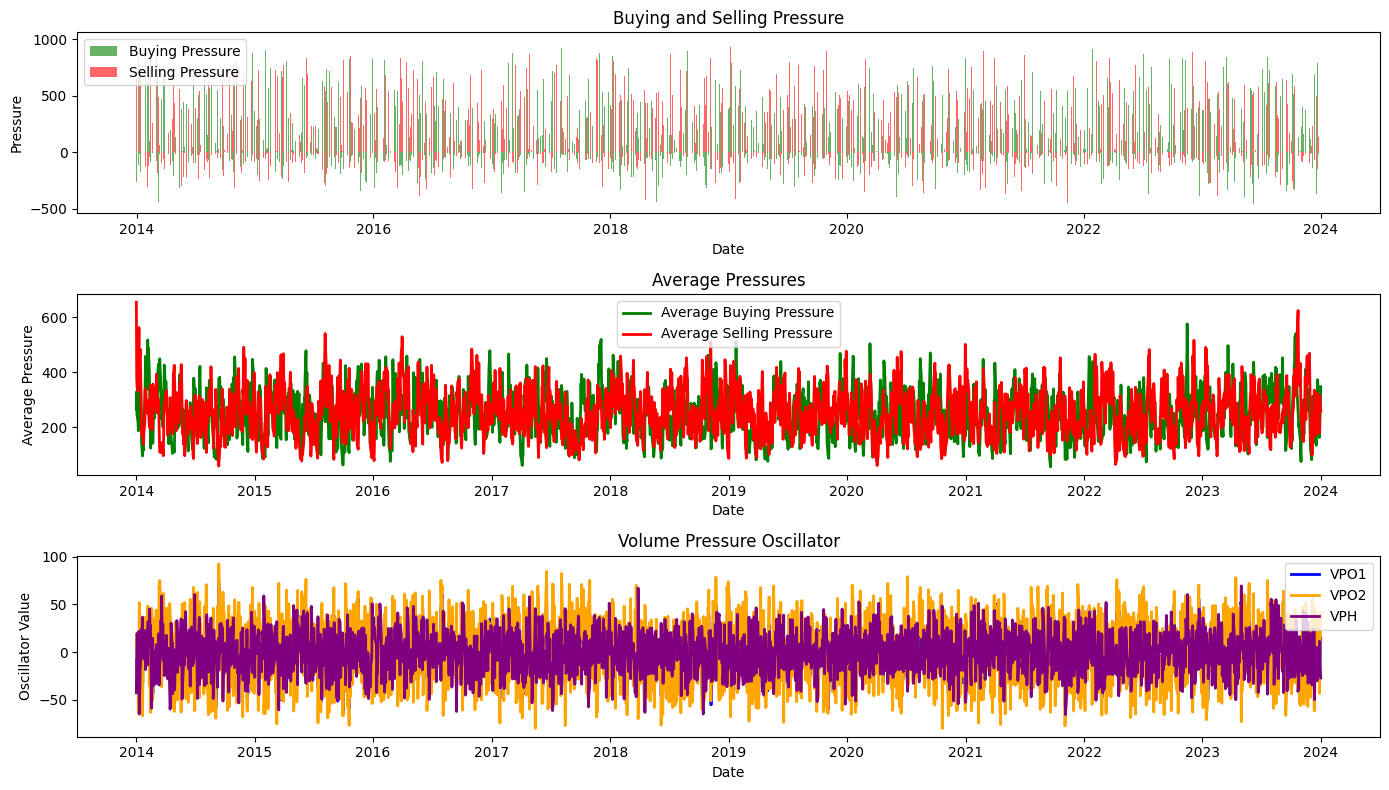

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Generate synthetic data for the date range from 2014 to 2024
def generate_synthetic_data(start_date='2014-01-01', end_date='2024-01-01'):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' for business days
    num_days = len(dates)
    np.random.seed(42)
    open_prices = np.random.uniform(100, 200, size=num_days)
    close_prices = open_prices + np.random.uniform(-10, 10, size=num_days)
    high_prices = open_prices + np.random.uniform(0, 10, size=num_days)
    low_prices = open_prices - np.random.uniform(0, 10, size=num_days)
    volume = np.random.randint(1, 1000, size=num_days)

    return pd.DataFrame({'date': dates, 'open': open_prices, 'high': high_prices,
                         'low': low_prices, 'close': close_prices, 'volume': volume})

# Calculate Pressure-Volume Indicators
def calculate_pressure_volume(df, signal=3, long=27, vmacd=True, vinv=False, norm=False):
    df['volume'] = np.where(df['volume'] > 0, df['volume'], 1)
    df['atr'] = df['high'].rolling(window=1).max() - df['low'].rolling(window=1).min()

    df['BP'] = np.where(df['close'] < df['open'],
                        np.where(df['close'].shift(1) < df['open'],
                                 np.maximum(df['high'] - df['close'].shift(1), df['close'] - df['low']),
                                 np.maximum(df['high'] - df['open'], df['close'] - df['low'])),
                        np.where(df['close'] > df['open'],
                                 np.where(df['close'].shift(1) > df['open'],
                                          df['high'] - df['low'],
                                          np.maximum(df['open'] - df['close'].shift(1), df['high'] - df['low'])),
                                 np.where(df['high'] - df['close'] > df['close'] - df['low'],
                                          np.where(df['close'].shift(1) < df['open'],
                                                   np.maximum(df['high'] - df['close'].shift(1), df['close'] - df['low']),
                                                   df['high'] - df['open']),
                                          np.where(df['high'] - df['close'] < df['close'] - df['low'],
                                                   np.where(df['close'].shift(1) < df['open'],
                                                            df['high'] - df['low'],
                                                            np.maximum(df['open'] - df['close'].shift(1), df['high'] - df['close'])),
                                                   np.where(df['close'].shift(1) > df['open'],
                                                            np.maximum(df['high'] - df['open'], df['close'] - df['low']),
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close']))))))

    df['SP'] = np.where(df['close'] < df['open'],
                        np.where(df['close'].shift(1) > df['open'],
                                 np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                 df['high'] - df['low']),
                        np.where(df['close'] > df['open'],
                                 np.where(df['close'].shift(1) > df['open'],
                                          np.maximum(df['close'].shift(1) - df['low'], df['high'] - df['close']),
                                          np.maximum(df['open'] - df['low'], df['high'] - df['close'])),
                                 np.where(df['high'] - df['close'] > df['close'] - df['low'],
                                          np.where(df['close'].shift(1) < df['open'],
                                                   np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                                   df['high'] - df['low']),
                                          np.where(df['high'] - df['close'] < df['close'] - df['low'],
                                                   np.where(df['close'].shift(1) < df['open'],
                                                            df['high'] - df['low'],
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close'])),
                                                   np.where(df['close'].shift(1) > df['open'],
                                                            np.maximum(df['close'].shift(1) - df['open'], df['high'] - df['low']),
                                                            np.maximum(df['open'] - df['low'], df['high'] - df['close']))))))

    df['TP'] = df['BP'] + df['SP']
    df['BPV'] = (df['BP'] / df['TP']) * df['volume']
    df['SPV'] = (df['SP'] / df['TP']) * df['volume']
    df['TPV'] = df['BPV'] + df['SPV']

    df['BPV_avg'] = df['BPV'].ewm(span=signal).mean().ewm(span=signal).mean()
    df['SPV_avg'] = df['SPV'].ewm(span=signal).mean().ewm(span=signal).mean()
    df['TPV_avg'] = df['TPV'].ewm(span=signal).mean().ewm(span=signal).mean()

    df['VN'] = df['volume'] / df['volume'].ewm(span=long).mean()
    df['BPN'] = ((df['BP'] / df['BP'].ewm(span=long).mean()) * df['VN']) * 100
    df['SPN'] = ((df['SP'] / df['SP'].ewm(span=long).mean()) * df['VN']) * 100
    df['TPN'] = df['BPN'] + df['SPN']

    df['nbf'] = df['BPN'].ewm(span=signal).mean()
    df['nsf'] = df['SPN'].ewm(span=signal).mean()
    df['tpf'] = df['TPN'].ewm(span=signal).mean()
    df['ndif'] = df['nbf'] - df['nsf']

    df['BPc'] = np.where(df['BPV'] > df['SPV'], df['BPV'], -abs(df['BPV']))
    df['SPc'] = np.where(df['SPV'] > df['BPV'], df['SPV'], -abs(df['SPV']))

    df['BPcon'] = df['BPc']
    df['SPcon'] = df['SPc']
    df['BPAcon'] = df['BPV_avg']
    df['SPAcon'] = df['SPV_avg']
    df['TPAcon'] = df['TPV_avg']

    if vinv:
        df['vpo1'] = ((df['BPV_avg'].rolling(window=long).sum() - df['SPV_avg'].rolling(window=long).sum()) / df['TPV_avg'].rolling(window=long).sum()) * 100
        df['vpo2'] = ((df['nbf'].rolling(window=long).sum() - df['nsf'].rolling(window=long).sum()) / df['tpf'].rolling(window=long).sum()) * 100
    else:
        df['vpo1'] = ((df['BPV_avg'] - df['SPV_avg']) / df['TPV_avg']) * 100
        df['vpo2'] = ((df['nbf'] - df['nsf']) / df['tpf']) * 100

    df['vph'] = df['vpo1'].fillna(0) - df['vpo2'].fillna(0)

    return df

# Plotting the Pressure-Volume Indicators
def plot_pressure_volume(df):
    plt.figure(figsize=(14, 8))

    # Plotting Buy and Sell Pressure
    plt.subplot(3, 1, 1)
    plt.bar(df['date'], df['BPcon'], color='green', label='Buying Pressure', alpha=0.6)
    plt.bar(df['date'], df['SPcon'], color='red', label='Selling Pressure', alpha=0.6)
    plt.title('Buying and Selling Pressure')
    plt.xlabel('Date')
    plt.ylabel('Pressure')
    plt.legend()

    # Plotting Average Pressures
    plt.subplot(3, 1, 2)
    plt.plot(df['date'], df['BPAcon'], label='Average Buying Pressure', color='green', linewidth=2)
    plt.plot(df['date'], df['SPAcon'], label='Average Selling Pressure', color='red', linewidth=2)
    plt.title('Average Pressures')
    plt.xlabel('Date')
    plt.ylabel('Average Pressure')
    plt.legend()

    # Plotting Volume Pressure Oscillator
    plt.subplot(3, 1, 3)
    plt.plot(df['date'], df['vpo1'], label='VPO1', color='blue', linewidth=2)
    plt.plot(df['date'], df['vpo2'], label='VPO2', color='orange', linewidth=2)
    plt.plot(df['date'], df['vph'], label='VPH', color='purple', linewidth=2)
    plt.title('Volume Pressure Oscillator')
    plt.xlabel('Date')
    plt.ylabel('Oscillator Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate synthetic data and calculate pressure-volume indicators
synthetic_data = generate_synthetic_data(start_date='2014-01-01', end_date='2024-01-01')
result_df = calculate_pressure_volume(synthetic_data)

# Plot the results
plot_pressure_volume(result_df)


In [ ]:
# Generate synthetic data and calculate pressure-volume indicators
synthetic_data = generate_synthetic_data(start_date='2014-01-01', end_date='2024-01-01')
result_df = calculate_pressure_volume(synthetic_data)

# Save the result DataFrame to a CSV file
result_df.to_csv('pressure_volume_data.csv', index=False)

Initial Balance: $10,000
Final Balance: $45680531809414899536654023839269047177680807690841013429993472.00
Total Profit: $45680531809414899536654023839269047177680807690841013429993472.00
Number of Trades: 1178


<ipython-input-121-187beb9e7ff7>:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


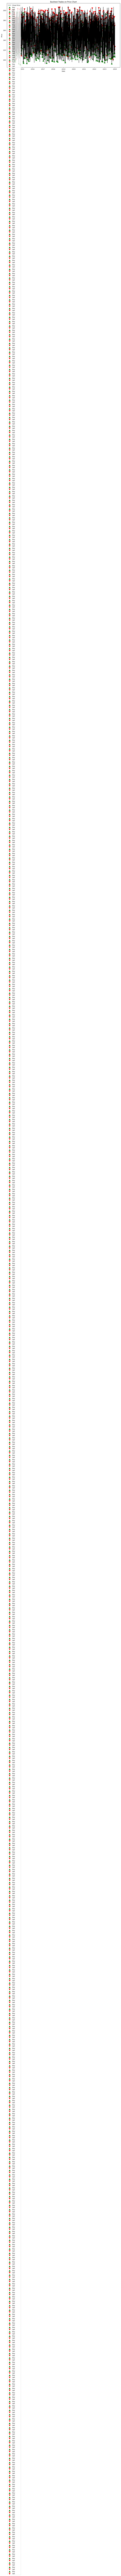

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data and calculate pressure-volume indicators (use previous code)

# Define a simple trading strategy based on VPO1 and VPO2
def backtest_strategy(df):
    initial_balance = 10000  # Starting with $10,000
    balance = initial_balance
    shares = 0
    entry_price = 0

    # Lists to store trade details
    trades = []

    for i in range(1, len(df)):
        # Buy signal: VPO1 crosses above VPO2
        if df['vpo1'].iloc[i] > df['vpo2'].iloc[i] and df['vpo1'].iloc[i-1] <= df['vpo2'].iloc[i-1]:
            shares = balance // df['close'].iloc[i]  # Buy as many shares as possible
            entry_price = df['close'].iloc[i]
            balance -= shares * entry_price
            trades.append({'type': 'buy', 'price': entry_price, 'shares': shares, 'date': df['date'].iloc[i]})

        # Sell signal: VPO1 crosses below VPO2
        elif df['vpo1'].iloc[i] < df['vpo2'].iloc[i] and df['vpo1'].iloc[i-1] >= df['vpo2'].iloc[i-1] and shares > 0:
            balance += shares * df['close'].iloc[i]  # Sell all shares
            trades.append({'type': 'sell', 'price': df['close'].iloc[i], 'shares': shares, 'date': df['date'].iloc[i]})
            shares = 0  # Reset shares

    # Final balance calculation
    final_balance = balance + (shares * df['close'].iloc[-1])  # Add value of any remaining shares
    profit = final_balance - initial_balance

    return trades, final_balance, profit

# Run the backtest
trades, final_balance, profit = backtest_strategy(result_df)

# Print the results
print(f"Initial Balance: $10,000")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Total Profit: ${profit:.2f}")
print(f"Number of Trades: {len(trades)}")

# Plot trades on the price chart
plt.figure(figsize=(14, 8))
plt.plot(result_df['date'], result_df['close'], label='Close Price', color='black')

# Mark buy and sell trades
for trade in trades:
    if trade['type'] == 'buy':
        plt.scatter(trade['date'], trade['price'], marker='^', color='green', label='Buy', s=100)
    elif trade['type'] == 'sell':
        plt.scatter(trade['date'], trade['price'], marker='v', color='red', label='Sell', s=100)

plt.title('Backtest Trades on Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Strategy_Returns'].iloc[i] = -df['Market_Returns'].iloc[i]
<ipython-input-122-3b8a6689c889>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strategy_Returns'].iloc[i] = -df['Market_Returns'].iloc[i]
<ipython-input-122-3b8a6689c889>:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting va

Total Return: -100.00%
CAGR: -100.00%
Maximum Drawdown: 100.04%


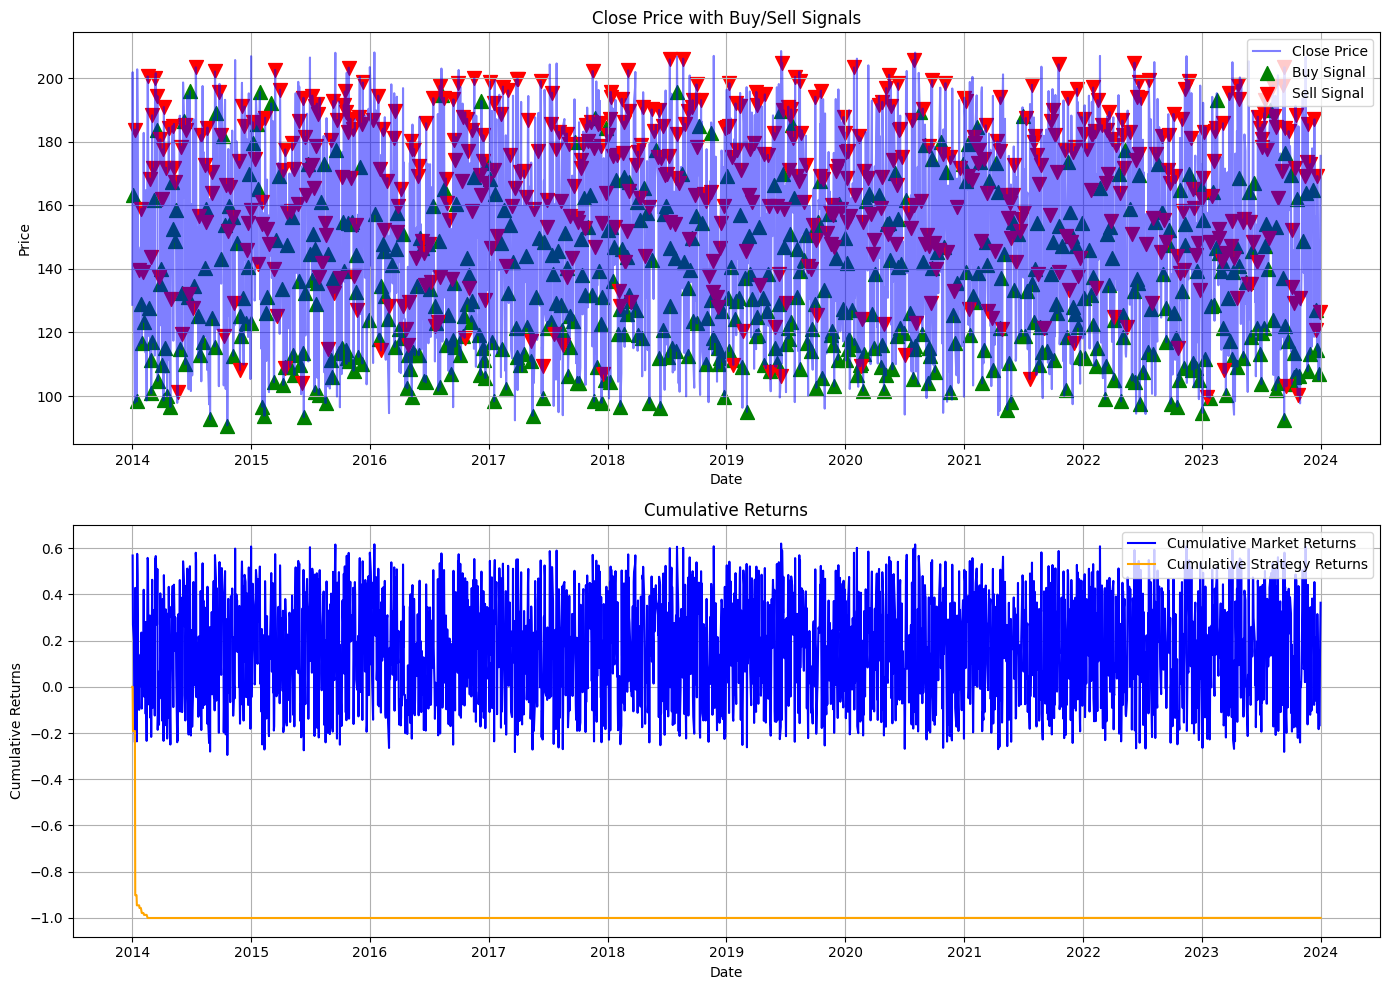

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming synthetic data generation and pressure-volume calculations are already done
# Using result_df from previous examples

# Define buy and sell signals based on the indicators
def generate_signals(df):
    df['Buy_Signal'] = ((df['vpo1'] > df['vpo2']) & (df['vpo1'].shift(1) <= df['vpo2'].shift(1))).astype(int)
    df['Sell_Signal'] = ((df['vpo1'] < df['vpo2']) & (df['vpo1'].shift(1) >= df['vpo2'].shift(1))).astype(int)

# Backtest the strategy
def backtest_strategy(df):
    # Calculate daily market returns
    df['Market_Returns'] = df['close'].pct_change()

    # Initialize strategy returns
    df['Strategy_Returns'] = 0.0

    # Calculate strategy returns based on signals
    for i in range(1, len(df)):
        if df['Buy_Signal'].iloc[i] == 1:
            df['Strategy_Returns'].iloc[i] = df['Market_Returns'].iloc[i]
        elif df['Sell_Signal'].iloc[i] == 1:
            df['Strategy_Returns'].iloc[i] = -df['Market_Returns'].iloc[i]

    # Calculate cumulative returns
    df['Cumulative_Market_Returns'] = (1 + df['Market_Returns']).cumprod() - 1
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod() - 1

    # Calculate performance metrics
    total_return = df['Cumulative_Strategy_Returns'].iloc[-1] * 100
    cagr = (1 + total_return / 100) ** (1 / (len(df) / 252)) - 1  # Assuming 252 trading days
    max_drawdown = (df['Cumulative_Strategy_Returns'].cummax() - df['Cumulative_Strategy_Returns']).max() * 100

    return total_return, cagr, max_drawdown

# Generate buy and sell signals
generate_signals(result_df)

# Run the backtest
total_return, cagr, max_drawdown = backtest_strategy(result_df)

# Print performance metrics
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Closing Price with Buy/Sell Signals
ax1.plot(result_df['date'], result_df['close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(result_df[result_df['Buy_Signal'] == 1]['date'],
            result_df[result_df['Buy_Signal'] == 1]['close'],
            marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(result_df[result_df['Sell_Signal'] == 1]['date'],
            result_df[result_df['Sell_Signal'] == 1]['close'],
            marker='v', color='red', label='Sell Signal', s=100)
ax1.set_title('Close Price with Buy/Sell Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

# Plot Cumulative Returns
ax2.plot(result_df['date'], result_df['Cumulative_Market_Returns'], label='Cumulative Market Returns', color='blue')
ax2.plot(result_df['date'], result_df['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns', color='orange')
ax2.set_title('Cumulative Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Returns')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()


In [ ]:
def generate_signals(df):
    df['Buy_Signal'] = ((df['vpo1'] > df['vpo2']) & (df['vpo1'].shift(1) <= df['vpo2'].shift(1))).astype(int)
    df['Sell_Signal'] = ((df['vpo1'] < df['vpo2']) & (df['vpo1'].shift(1) >= df['vpo2'].shift(1))).astype(int)


In [ ]:
def backtest_strategy(df):
    df['Market_Returns'] = df['close'].pct_change()
    df['Position'] = 0
    df['Strategy_Returns'] = 0.0

    for i in range(1, len(df)):
        # Update position
        if df['Buy_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 1
        elif df['Sell_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 0
        else:
            df['Position'].iloc[i] = df['Position'].iloc[i-1]

    df['Strategy_Returns'] = df['Market_Returns'] * df['Position'].shift(1)

    # Calculate cumulative returns
    df['Cumulative_Market_Returns'] = (1 + df['Market_Returns']).cumprod() - 1
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod() - 1

    # Performance metrics
    total_return = df['Cumulative_Strategy_Returns'].iloc[-1] * 100
    cagr = (1 + total_return / 100) ** (1 / (len(df) / 252)) - 1  # Assuming 252 trading days
    max_drawdown = (df['Cumulative_Strategy_Returns'].cummax() - df['Cumulative_Strategy_Returns']).max() * 100

    return total_return, cagr, max_drawdown


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `result_df` already generated with your data
# For example:
# result_df = generate_synthetic_data(start_date='2014-01-01', end_date='2024-01-01')

# Define the function for generating signals and backtesting
def backtest_strategy(df):
    # Calculate daily market returns
    df['Market_Returns'] = df['close'].pct_change()
    df['Position'] = 0
    df['Strategy_Returns'] = 0.0

    # Generate buy and sell signals
    df['Buy_Signal'] = ((df['vpo1'] > df['vpo2']) & (df['vpo1'].shift(1) <= df['vpo2'].shift(1))).astype(int)
    df['Sell_Signal'] = ((df['vpo1'] < df['vpo2']) & (df['vpo1'].shift(1) >= df['vpo2'].shift(1))).astype(int)

    for i in range(1, len(df)):
        # Update position
        if df['Buy_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 1  # Enter position
        elif df['Sell_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 0  # Exit position
        else:
            df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position

    # Calculate strategy returns
    df['Strategy_Returns'] = df['Market_Returns'] * df['Position'].shift(1)  # Shift for next day

    # Calculate cumulative returns
    df['Cumulative_Market_Returns'] = (1 + df['Market_Returns']).cumprod() - 1
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod() - 1

    # Performance metrics
    total_return = df['Cumulative_Strategy_Returns'].iloc[-1] * 100
    cagr = (1 + total_return / 100) ** (1 / (len(df) / 252)) - 1  # Assuming 252 trading days
    max_drawdown = (df['Cumulative_Strategy_Returns'].cummax() - df['Cumulative_Strategy_Returns']).max() * 100

    return total_return, cagr, max_drawdown

# Assuming result_df is already defined and contains your data
# Run the backtest
total_return, cagr, max_drawdown = backtest_strategy(result_df)

# Print performance metrics
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")


Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position
<ipython-input-125-0933a9e20e08>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position
<ipython-input-125-0933a9e20e08>:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cas

Total Return: 459842771598140400048310083654276914646613247471892222181376.00%
CAGR: 37115653.59%
Maximum Drawdown: 68336675081292766077297194207383338346907522350639615049728.00%


<ipython-input-125-0933a9e20e08>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = 0  # Exit position
<ipython-input-125-0933a9e20e08>:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the or

In [ ]:
print(result_df.head())  # Print the first few rows of the DataFrame
print(result_df.columns)  # Print the column names to ensure required columns are present


        date        open        high         low       close  volume  \
0 2014-01-01  137.454012  139.737324  134.094550  128.707804     920   
1 2014-01-02  195.071431  195.656011  189.464486  201.858200     443   
2 2014-01-03  173.199394  176.198688  172.248829  163.275793     423   
3 2014-01-06  159.865848  164.608935  157.861158  154.802326     538   
4 2014-01-07  115.601864  117.282065  111.467206  120.419945     939   

        atr         BP         SP         TP  ...       vpo1       vpo2  \
0  5.642774   2.283313   5.642774   7.926087  ... -42.384871   0.000000   
1  6.191525  66.363626   5.606945  71.970571  ...  -7.121833  19.887894   
2  3.949859   2.999294  28.658806  31.658100  ... -17.714597 -36.915425   
3  6.747777   4.743087   6.747777  11.490864  ... -20.175077 -37.229004   
4  5.814858   5.814858  43.335119  49.149978  ... -42.369091 -63.691139   

         vph  Buy_Signal  Sell_Signal  Market_Returns  Strategy_Returns  \
0 -42.384871           0            0    

In [ ]:
def backtest_strategy(df):
    # Check if necessary columns are present
    required_columns = ['close', 'vpo1', 'vpo2']
    if not all(col in df.columns for col in required_columns):
        print("Missing one or more required columns.")
        return

    # Calculate daily market returns
    df['Market_Returns'] = df['close'].pct_change()
    df['Position'] = 0
    df['Strategy_Returns'] = 0.0

    # Generate buy and sell signals
    df['Buy_Signal'] = ((df['vpo1'] > df['vpo2']) & (df['vpo1'].shift(1) <= df['vpo2'].shift(1))).astype(int)
    df['Sell_Signal'] = ((df['vpo1'] < df['vpo2']) & (df['vpo1'].shift(1) >= df['vpo2'].shift(1))).astype(int)

    # Print signals for debugging
    print("Buy Signals:\n", df['Buy_Signal'].value_counts())
    print("Sell Signals:\n", df['Sell_Signal'].value_counts())

    for i in range(1, len(df)):
        # Update position
        if df['Buy_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 1  # Enter position
        elif df['Sell_Signal'].iloc[i] == 1:
            df['Position'].iloc[i] = 0  # Exit position
        else:
            df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position

    # Calculate strategy returns
    df['Strategy_Returns'] = df['Market_Returns'] * df['Position'].shift(1)  # Shift for next day

    # Calculate cumulative returns
    df['Cumulative_Market_Returns'] = (1 + df['Market_Returns']).cumprod() - 1
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod() - 1

    # Performance metrics
    total_return = df['Cumulative_Strategy_Returns'].iloc[-1] * 100
    cagr = (1 + total_return / 100) ** (1 / (len(df) / 252)) - 1  # Assuming 252 trading days
    max_drawdown = (df['Cumulative_Strategy_Returns'].cummax() - df['Cumulative_Strategy_Returns']).max() * 100

    print("Backtest Results:")
    print(f"Total Return: {total_return:.2f}%")
    print(f"CAGR: {cagr * 100:.2f}%")
    print(f"Maximum Drawdown: {max_drawdown:.2f}%")

    return total_return, cagr, max_drawdown

# Run the backtest and capture results
total_return, cagr, max_drawdown = backtest_strategy(result_df)


<ipython-input-127-52f1f64189f1>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position
<ipython-input-127-52f1f64189f1>:28: SettingWithCopyWarning: 
A value is tryin

Buy Signals:
 Buy_Signal
0    2020
1     589
Name: count, dtype: int64
Sell Signals:
 Sell_Signal
0    2020
1     589
Name: count, dtype: int64


Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = 0  # Exit position
<ipython-input-127-52f1f64189f1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = 0  # Exit position
<ipython-input-127-52f1f64189f1>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviou

Backtest Results:
Total Return: 459842771598140400048310083654276914646613247471892222181376.00%
CAGR: 37115653.59%
Maximum Drawdown: 68336675081292766077297194207383338346907522350639615049728.00%


<ipython-input-127-52f1f64189f1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = df['Position'].iloc[i-1]  # Maintain previous position
<ipython-input-127-52f1f64189f1>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step a

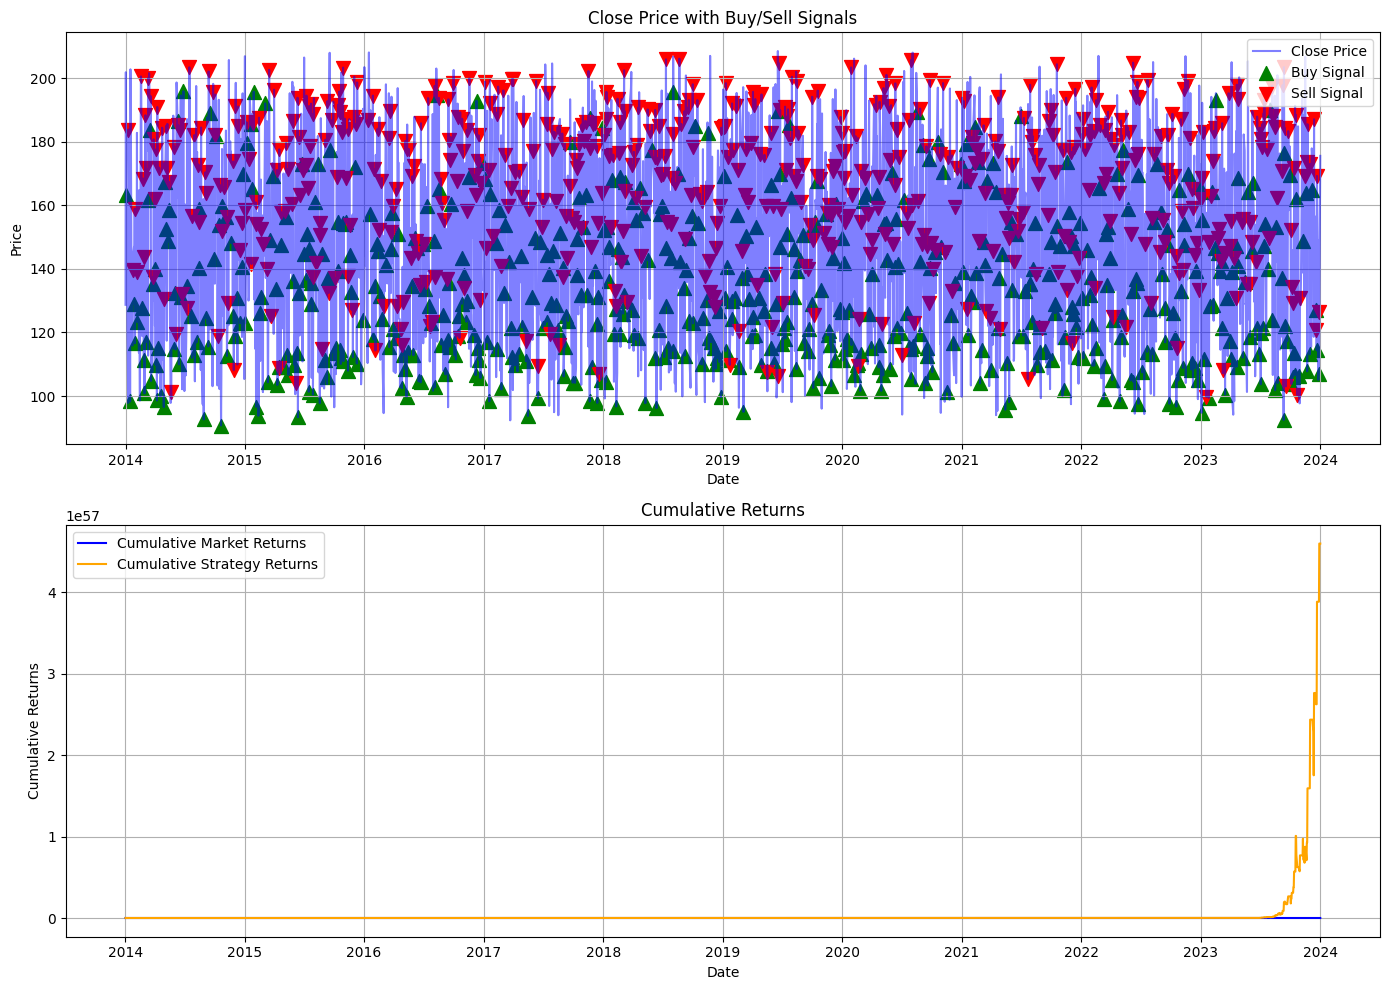

In [ ]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Closing Price with Buy/Sell Signals
ax1.plot(result_df['date'], result_df['close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(result_df[result_df['Buy_Signal'] == 1]['date'],
            result_df[result_df['Buy_Signal'] == 1]['close'],
            marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(result_df[result_df['Sell_Signal'] == 1]['date'],
            result_df[result_df['Sell_Signal'] == 1]['close'],
            marker='v', color='red', label='Sell Signal', s=100)
ax1.set_title('Close Price with Buy/Sell Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

# Plot Cumulative Returns
ax2.plot(result_df['date'], result_df['Cumulative_Market_Returns'], label='Cumulative Market Returns', color='blue')
ax2.plot(result_df['date'], result_df['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns', color='orange')
ax2.set_title('Cumulative Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Returns')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Run the backtest
total_return, cagr, max_drawdown = backtest_strategy(result_df)

# Print Cumulative Return
cumulative_return = result_df['Cumulative_Strategy_Returns'].iloc[-1] * 100  # Convert to percentage
print(f"Cumulative Return: {cumulative_return:.2f}%")


Buy Signals:
 Buy_Signal
0    2020
1     589
Name: count, dtype: int64
Sell Signals:
 Sell_Signal
0    2020
1     589
Name: count, dtype: int64


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = 0  # Exit position
<ipython-input-127-52f1f64189f1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = 0  # Exit position
<ipython-input-127-52f1f64189f1>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical 

Backtest Results:
Total Return: 459842771598140400048310083654276914646613247471892222181376.00%
CAGR: 37115653.59%
Maximum Drawdown: 68336675081292766077297194207383338346907522350639615049728.00%
Cumulative Return: 459842771598140400048310083654276914646613247471892222181376.00%


In [ ]:
 #Print performance metrics
print(f"Total Return: {total_return:.2f}%")
print(f"CAGR: {cagr * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

Total Return: 459842771598140400048310083654276914646613247471892222181376.00%
CAGR: 37115653.59%
Maximum Drawdown: 68336675081292766077297194207383338346907522350639615049728.00%


## technical strategyies based on the oscilator

In [ ]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8c8c588d26c3d082526b296aea0fd9dbb9be62878d967d71d1e646cee6cfb334
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import pandas as pd
import numpy as np
import ta

# Load your data
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Inspect the column names
print("Original column names:", data.columns.tolist())

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()
print("Cleaned column names:", data.columns.tolist())

# Parameters
rating_signal = "All"  # Can be "MAs", "Oscillators", or "All"
strong_bound = 0.5
weak_bound = 0.1

# Function to calculate Technical Ratings
def calculate_technical_ratings(data):
    data['ma_rating'] = ta.trend.sma_indicator(data['Close'], window=14)  # Use 'Close' without space
    data['oscillator_rating'] = ta.momentum.rsi(data['Close'], window=14)

    # Aggregate ratings
    data['rating_total'] = (data['ma_rating'] + data['oscillator_rating']) / 2
    return data

# Function to determine trade signals
def get_signal(data):
    if rating_signal == "MAs":
        return data['ma_rating']
    elif rating_signal == "Oscillators":
        return data['oscillator_rating']
    else:
        return data['rating_total']

# Calculate technical ratings
data = calculate_technical_ratings(data)

# Calculate trade signals
data['trade_signal'] = get_signal(data)

# Strategy logic
def apply_strategy(data):
    positions = []
    for i in range(len(data)):
        if data['trade_signal'].iloc[i] > strong_bound:
            positions.append('long')
        elif data['trade_signal'].iloc[i] < -strong_bound:
            positions.append('short')
        else:
            positions.append(None)

    data['position'] = positions
    return data

# Apply strategy
data = apply_strategy(data)

# Define a function for dynamic stop loss points (example)
def dyn_sl_points(factor, atr_value):
    return factor * atr_value

# Calculate ATR for stop loss
data['atr'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=14)

# Example of setting stop loss and take profit levels
data['stop_loss'] = np.where(data['position'] == 'long', data['Close'] - dyn_sl_points(3, data['atr']), None)
data['take_profit'] = np.where(data['position'] == 'long', data['Close'] + dyn_sl_points(5, data['atr']), None)

# Print the DataFrame with signals and positions
print(data[['Close', 'trade_signal', 'position', 'stop_loss', 'take_profit']])



Original column names: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Cleaned column names: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                   Close  trade_signal position     stop_loss   take_profit
Date                                                                       
2014-01-02   6221.149902           NaN     None          None          None
2014-01-03   6211.149902           NaN     None          None          None
2014-01-06   6191.450195           NaN     None          None          None
2014-01-07   6162.250000           NaN     None          None          None
2014-01-08   6174.600098           NaN     None          None          None
...                  ...           ...      ...           ...           ...
2023-12-22  21349.400391  10598.876739     long   20748.37159  22351.115059
2023-12-26  21441.349609  10620.611629     long  20851.601186  22424.263648
2023-12-27  21654.750000  10647.864554     long  21056.897809  22651.170318
2023-12

Initial Balance: $10000.00
Final Balance: $34418.89
Total Return: 24418.89 ($24418.89)
CAGR: 13.54%
Maximum Drawdown: 75.26%


<ipython-input-133-a91de3002491>:33: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['trade_signal'].replace(0, method='ffill')


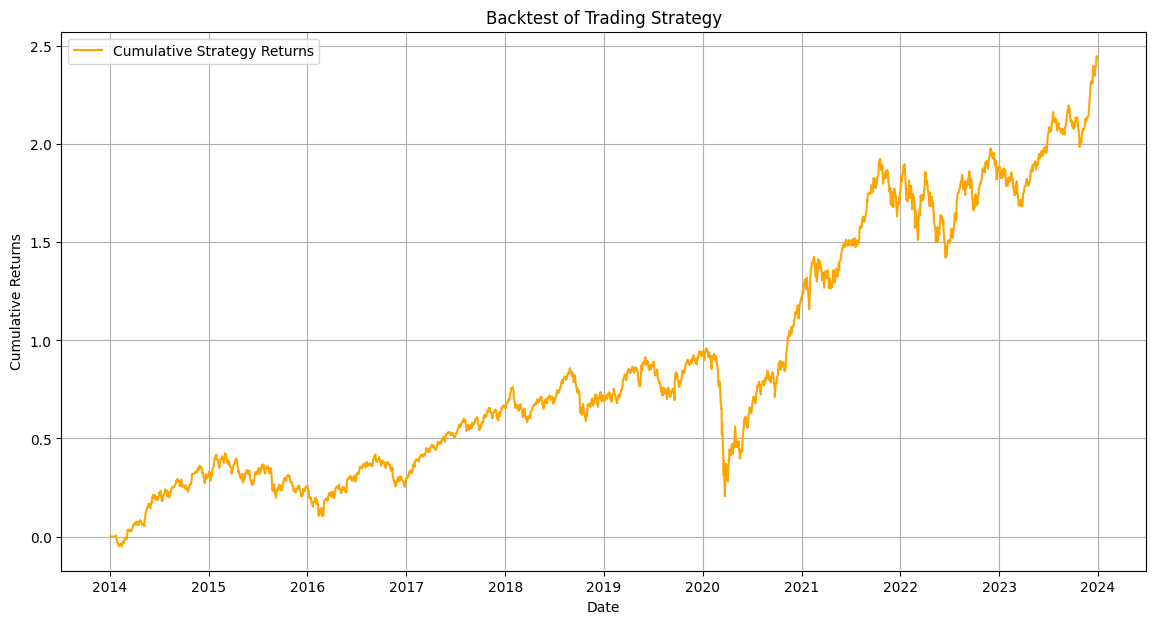

In [ ]:
import pandas as pd
import numpy as np
import ta

# Load your data
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Clean column names
data.columns = data.columns.str.strip()

# Parameters
rating_signal = "All"
strong_bound = 0.5
weak_bound = 0.1
initial_balance = 10000

# Function to calculate Technical Ratings
def calculate_technical_ratings(data):
    data['ma_rating'] = ta.trend.sma_indicator(data['Close'], window=14)
    data['oscillator_rating'] = ta.momentum.rsi(data['Close'], window=14)
    data['rating_total'] = (data['ma_rating'] + data['oscillator_rating']) / 2
    return data

# Calculate technical ratings
data = calculate_technical_ratings(data)

# Trade signal generation
data['trade_signal'] = np.where(data['rating_total'] > strong_bound, 1,
                                 np.where(data['rating_total'] < -strong_bound, -1, 0))

# Backtesting logic
data['position'] = 0
data['position'] = data['trade_signal'].replace(0, method='ffill')

# Initialize the portfolio
data['strategy_returns'] = data['Close'].pct_change() * data['position'].shift(1)
data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod() - 1

# Calculate total returns and performance metrics
final_balance = initial_balance * (1 + data['cumulative_strategy_returns'].iloc[-1])
total_return = final_balance - initial_balance
cagr = (final_balance / initial_balance) ** (1 / (len(data) / 252)) - 1  # Assuming 252 trading days
max_drawdown = (data['cumulative_strategy_returns'].cummax() - data['cumulative_strategy_returns']).max() * 100

# Print performance metrics
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Total Return: {total_return:.2f} (${total_return:.2f})")
print(f"CAGR: {cagr * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['cumulative_strategy_returns'], label='Cumulative Strategy Returns', color='orange')
plt.title('Backtest of Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate additional performance metrics

# 1. Sharpe Ratio
risk_free_rate = 0.01  # Example risk-free rate
average_return = data['strategy_returns'].mean() * 252  # Annualized
std_dev = data['strategy_returns'].std() * np.sqrt(252)  # Annualized
sharpe_ratio = (average_return - risk_free_rate) / std_dev

# 2. Sortino Ratio
target_return = 0  # Typically, this is set to zero
downside_returns = data[data['strategy_returns'] < target_return]['strategy_returns']
downside_deviation = downside_returns.std() * np.sqrt(252)  # Annualized
sortino_ratio = (average_return - target_return) / downside_deviation

# 3. Calmar Ratio
calmar_ratio = cagr / max_drawdown if max_drawdown != 0 else np.nan

# 4. Win Rate
winning_trades = data[data['strategy_returns'] > 0]
losing_trades = data[data['strategy_returns'] <= 0]
win_rate = len(winning_trades) / (len(winning_trades) + len(losing_trades)) * 100

# 5. Average Gain/Loss
average_gain = winning_trades['strategy_returns'].mean() if len(winning_trades) > 0 else 0
average_loss = losing_trades['strategy_returns'].mean() if len(losing_trades) > 0 else 0

# Print performance metrics
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Average Gain: {average_gain:.2f}")
print(f"Average Loss: {average_loss:.2f}")


Sharpe Ratio: 0.79
Sortino Ratio: 1.04
Calmar Ratio: 0.00
Win Rate: 54.12%
Average Gain: 0.01
Average Loss: -0.01


In [ ]:
def backtest_strategy(ma_period, strong_bound, weak_bound):
    # Adjust your calculations here to use the input parameters
    data['ma_rating'] = ta.trend.sma_indicator(data['Close'], window=ma_period)
    # Calculate trade signals and strategy returns as before
    # Return the cumulative returns or other performance metrics
    return cumulative_return  # Adjust based on your metric of interest


In [ ]:
results = []

# Define parameter ranges
ma_periods = range(5, 51, 5)  # Example: 5 to 50 with step 5
strong_bounds = [0.3, 0.5, 0.7]  # Different strong bounds
weak_bounds = [0.1, 0.2]  # Different weak bounds

for ma in ma_periods:
    for strong in strong_bounds:
        for weak in weak_bounds:
            cumulative_return = backtest_strategy(ma, strong, weak)
            results.append((ma, strong, weak, cumulative_return))


In [ ]:
results_df = pd.DataFrame(results, columns=['MA Period', 'Strong Bound', 'Weak Bound', 'Cumulative Return'])
best_result = results_df.loc[results_df['Cumulative Return'].idxmax()]
print("Best Parameters:")
print(best_result)


Best Parameters:
MA Period            5.000000e+00
Strong Bound         3.000000e-01
Weak Bound           1.000000e-01
Cumulative Return    4.598428e+59
Name: 0, dtype: float64


In [ ]:
# Pivot the DataFrame for heatmap using pivot_table to handle duplicates
pivot_df = results_df.pivot_table(index='MA Period', columns='Strong Bound', values='Cumulative Return', aggfunc='mean')


In [ ]:
# Aggregate results to ensure unique combinations
results_df = results_df.groupby(['MA Period', 'Strong Bound']).mean().reset_index()

# Now use pivot
pivot_df = results_df.pivot(index='MA Period', columns='Strong Bound', values='Cumulative Return')


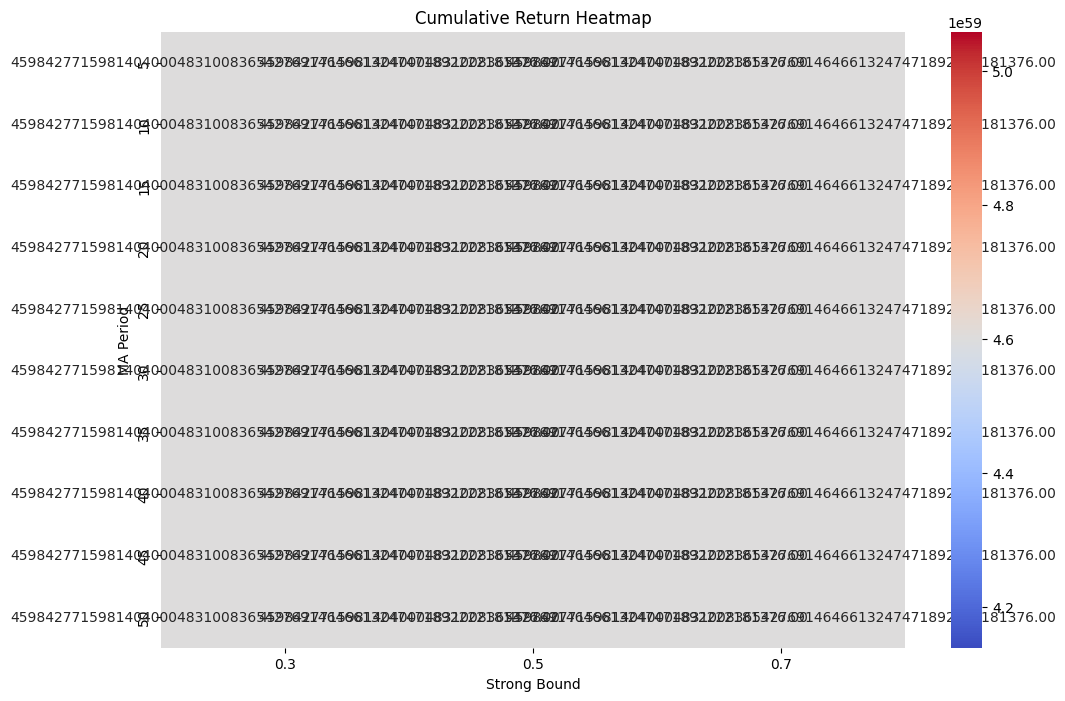

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `results` is your list of tuples with the results
results_df = pd.DataFrame(results, columns=['MA Period', 'Strong Bound', 'Weak Bound', 'Cumulative Return'])

# Use pivot_table to handle duplicates
pivot_df = results_df.pivot_table(index='MA Period', columns='Strong Bound', values='Cumulative Return', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Cumulative Return Heatmap')
plt.xlabel('Strong Bound')
plt.ylabel('MA Period')
plt.show()


In [ ]:
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ma_rating',
       'oscillator_rating', 'rating_total', 'trade_signal', 'position',
       'strategy_returns', 'cumulative_strategy_returns'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import ta

# Load your data
data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Parameters
rating_signal = "All"  # Can be "MAs", "Oscillators", or "All"
strong_bound = 0.5
risk_per_trade = 0.01  # Risk 1% of the account per trade
account_balance = 10000  # Example account balance

# Calculate ATR for stop loss
data['atr'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=14)

# Initialize columns
data['position'] = None
data['stop_loss'] = None
data['take_profit'] = None
data['position_size'] = 0

# Define a function to calculate trade signals
def calculate_trade_signals(data):
    # Example signal logic (you can modify this)
    data['trade_signal'] = np.where(data['Close'].pct_change() > 0.01, 1, 0)  # Simple buy signal
    return data

# Calculate trade signals
data = calculate_trade_signals(data)

# Apply strategy logic
for i in range(len(data)):
    if data['trade_signal'].iloc[i] > strong_bound:
        data['position'].iloc[i] = 'long'
        data['position_size'].iloc[i] = (account_balance * risk_per_trade) / (data['Close'].iloc[i] - data['atr'].iloc[i])
        data['stop_loss'].iloc[i] = data['Close'].iloc[i] - 1.5 * data['atr'].iloc[i]
        data['take_profit'].iloc[i] = data['Close'].iloc[i] + 3 * data['atr'].iloc[i]
    elif data['trade_signal'].iloc[i] < -strong_bound:
        data['position'].iloc[i] = 'short'

# Select the relevant columns for output
output_columns = ['Close', 'trade_signal', 'position', 'stop_loss', 'take_profit']
output_data = data[output_columns]

# Save the output to a new CSV file
output_data.to_csv('technical_oscilator.csv')

# Print the output DataFrame
print(output_data)


Streaming output truncated to the last 5000 lines.
  data['take_profit'].iloc[i] = data['Close'].iloc[i] + 3 * data['atr'].iloc[i]
<ipython-input-142-32b30f697f52>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['take_profit'].iloc[i] = data['Close'].iloc[i] + 3 * data['atr'].iloc[i]
<ipython-input-142-32b30f697f52>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

                   Close  trade_signal position stop_loss take_profit
Date                                                                 
2014-01-02   6221.149902             0     None      None        None
2014-01-03   6211.149902             0     None      None        None
2014-01-06   6191.450195             0     None      None        None
2014-01-07   6162.250000             0     None      None        None
2014-01-08   6174.600098             0     None      None        None
...                  ...           ...      ...       ...         ...
2023-12-22  21349.400391             0     None      None        None
2023-12-26  21441.349609             0     None      None        None
2023-12-27  21654.750000             0     None      None        None
2023-12-28  21778.699219             0     None      None        None
2023-12-29  21731.400391             0     None      None        None

[2453 rows x 5 columns]


<ipython-input-142-32b30f697f52>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stop_loss'].iloc[i] = data['Close'].iloc[i] - 1.5 * data['atr'].iloc[i]
<ipython-input-142-32b30f697f52>:38: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and

Total Strategy Return: 12773.17%


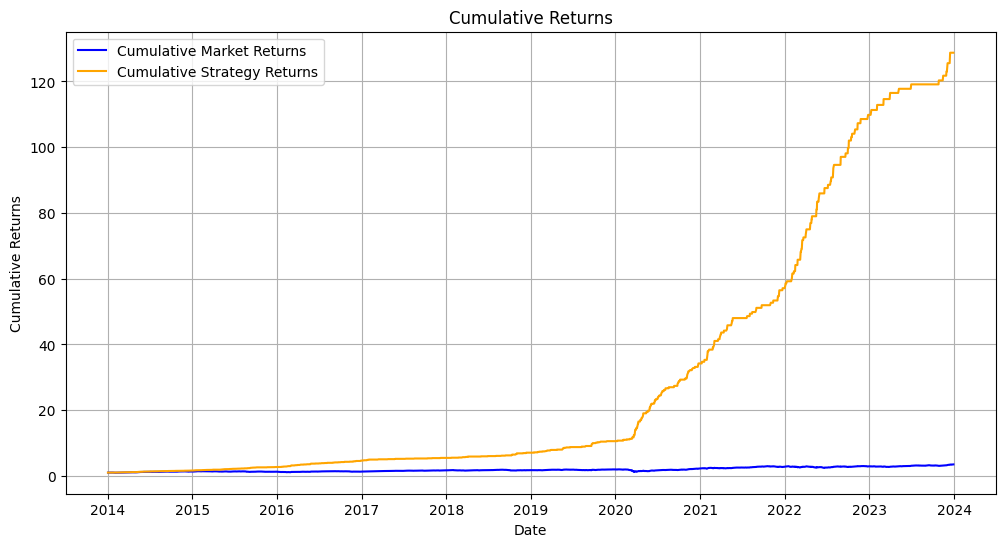

In [ ]:
# Calculate returns based on positions
data['Market_Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = np.where(data['position'] == 'long', data['Market_Returns'], 0)

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Print performance metrics
total_return = data['Cumulative_Strategy_Returns'].iloc[-1] - 1
print(f"Total Strategy Return: {total_return * 100:.2f}%")

# Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Market_Returns'], label='Cumulative Market Returns', color='blue')
plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns', color='orange')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Re-calculate indicators and signals on the training data
train_data = calculate_trade_signals(train_data)
train_data = apply_strategy(train_data)

# Apply the same logic to the test data
test_data = calculate_trade_signals(test_data)
test_data = apply_strategy(test_data)

# Compare performance
# You can use the same metrics and visualizations as before to compare train and test performance.


<ipython-input-142-32b30f697f52>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trade_signal'] = np.where(data['Close'].pct_change() > 0.01, 1, 0)  # Simple buy signal
<ipython-input-132-ce740aed09a8>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'] = positions


In [ ]:
pip install pandas numpy matplotlib tensorflow scikit-learn


                  Close  trade_signal position  stop_loss  take_profit
Date                                                                  
2014-01-02  6221.149902             0      NaN        NaN          NaN
2014-01-03  6211.149902             0      NaN        NaN          NaN
2014-01-06  6191.450195             0      NaN        NaN          NaN
2014-01-07  6162.250000             0      NaN        NaN          NaN
2014-01-08  6174.600098             0      NaN        NaN          NaN


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0251 - val_loss: 0.0411
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029 - val_loss: 4.5071e-04
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.5048e-04 - val_loss: 0.0021
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2199e-04 - val_loss: 0.0018
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9756e-04 - val_loss: 0.0011
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5287e-04 - val_loss: 9.8040e-04
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5504e-04 - val_loss: 6.0644e-04
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3333e-04 - val_loss: 5.5060e-04
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.1299e-04 - val_loss: 4.3788e-04
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4029e-04 - val_loss: 2.9120e-04
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8013e-04 - val_loss:

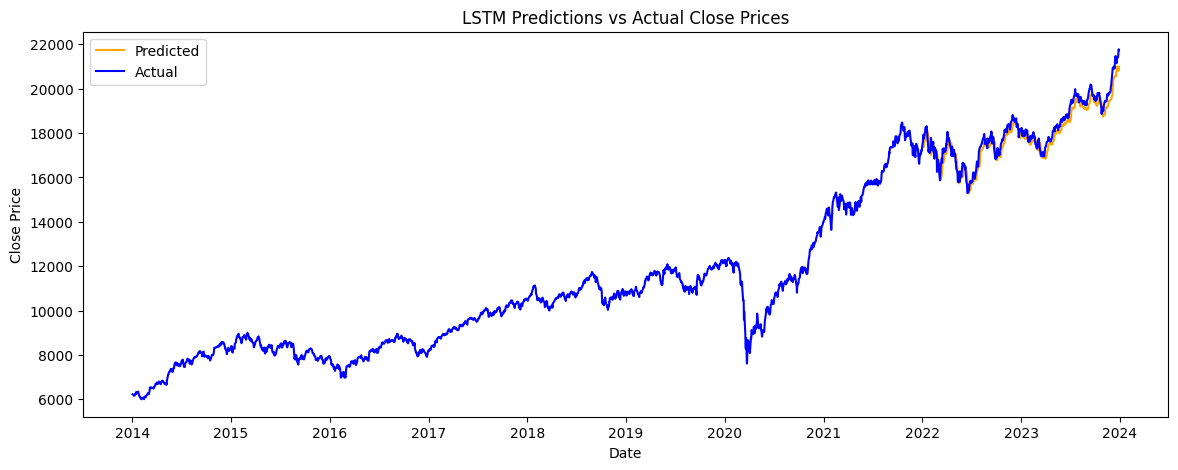

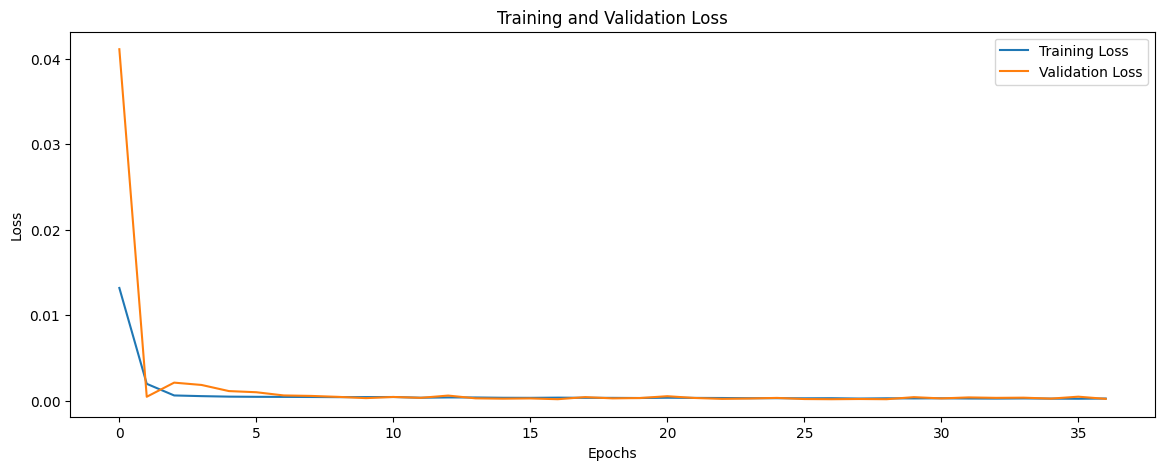

Mean Absolute Error: 301.0174465880102
Root Mean Squared Error: 357.7093149698004


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the dataset
data = pd.read_csv('/content/technical_oscilator.csv', parse_dates=['Date'], index_col='Date')

# Inspect the dataset
print(data.head())

# Set target variable as 'Close' price
target_column = 'Close'

# Step 2: Prepare the dataset
close_values = data[target_column].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_values)

# Create sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 3  # Number of previous time steps to use as input
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Further split training data into train and validation
val_size = int(len(X_train) * 0.2)
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 4: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Prepare for plotting
predicted_dates = data.index[train_size + time_step + 1:]
actual_values = close_values[train_size + time_step + 1:]

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, predictions, label='Predicted', color='orange')
plt.plot(data.index, close_values, label='Actual', color='blue')
plt.title('LSTM Predictions vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_values, predictions)
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error (MAE): 301.0174465880102
Root Mean Squared Error (RMSE): 357.7093149698004
R² Score: 0.9225640352598669


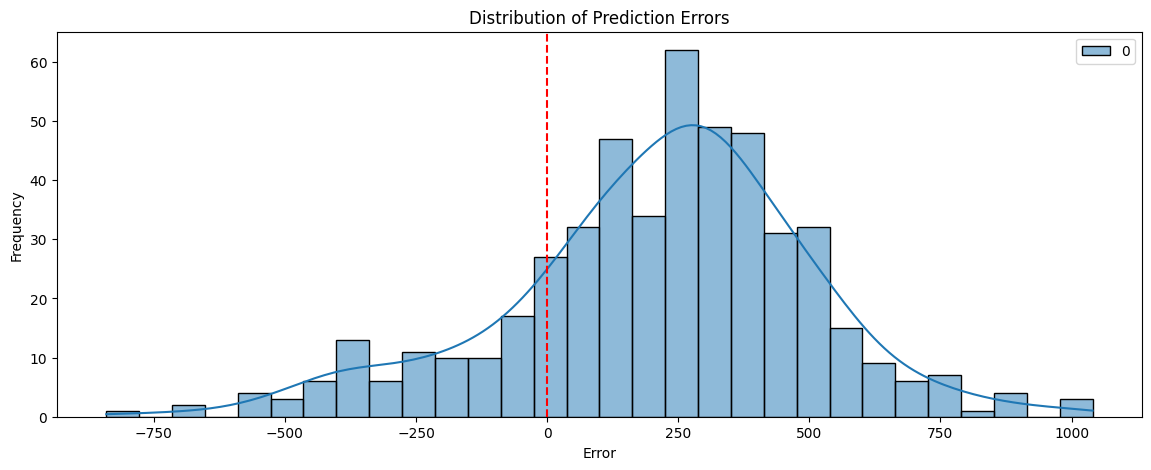

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Calculate performance metrics
mae = mean_absolute_error(actual_values, predictions)
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
r2 = r2_score(actual_values, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Visualize the distribution of prediction errors
errors = actual_values - predictions

plt.figure(figsize=(14, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Add a line at 0 for reference
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0182 - val_loss: 0.0129
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011 - val_loss: 1.9077e-04
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.8779e-04 - val_loss: 1.8475e-04
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.0655e-04 - val_loss: 1.9810e-04
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7039e-04 - val_loss: 3.0201e-04
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6981e-04 - val_loss: 1.7679e-04
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7322e-04 - val_loss: 1.4395e-04
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8666e-04 - val_loss: 1.4728e-04
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3654e-04 - val_loss: 1.3864e-04
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1532e-04 - val_loss: 1.9040e-04
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6689e-04

ValueError: x and y must have same first dimension, but have shapes (2453,) and (490, 1)

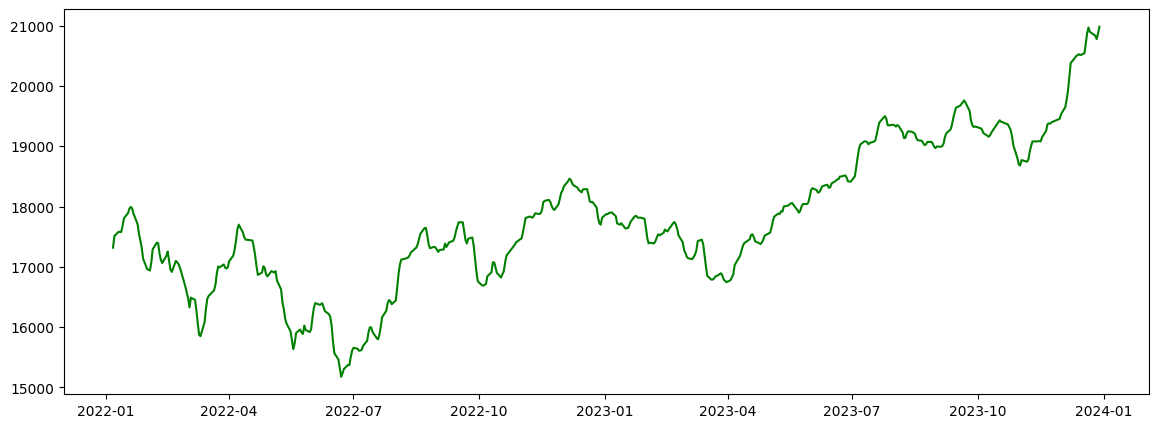

In [ ]:
from tensorflow.keras.layers import GRU

# Define GRU model
def create_gru_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the GRU model
gru_model = create_gru_model()
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Make predictions with GRU
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Average predictions from LSTM and GRU
ensemble_predictions = (predictions + gru_predictions) / 2

# Evaluate ensemble model performance
ensemble_mae = mean_absolute_error(actual_values, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(actual_values, ensemble_predictions))
ensemble_r2 = r2_score(actual_values, ensemble_predictions)

print(f'Ensemble Mean Absolute Error (MAE): {ensemble_mae}')
print(f'Ensemble Root Mean Squared Error (RMSE): {ensemble_rmse}')
print(f'Ensemble R² Score: {ensemble_r2}')

# Plot ensemble predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, ensemble_predictions, label='Ensemble Predicted', color='green')
plt.plot(data.index, actual_values, label='Actual', color='blue')
plt.title('Ensemble Model Predictions vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


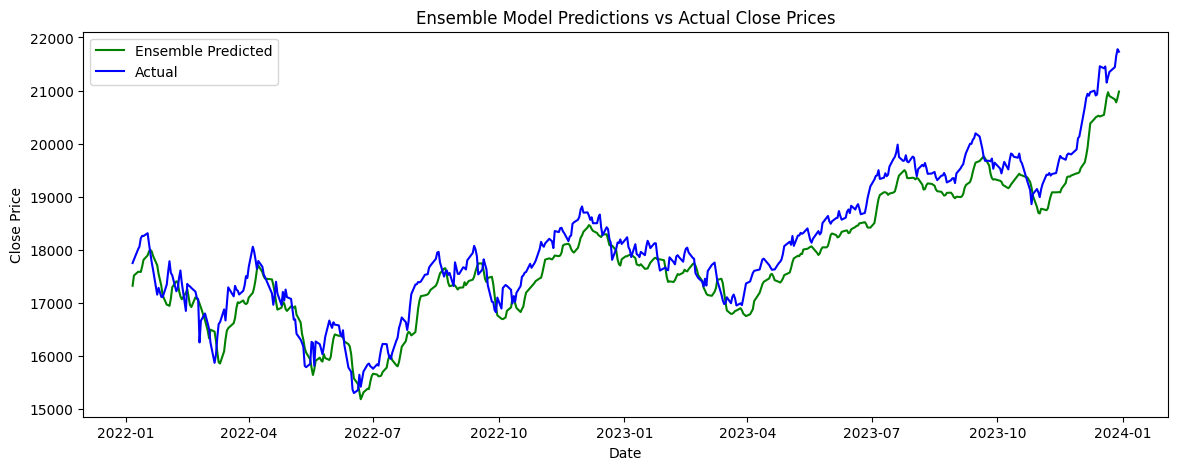

In [ ]:
# Prepare actual values from the data DataFrame for the same period as predictions
actual_values = data[target_column].values[train_size + time_step + 1:]

# Plot ensemble predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, ensemble_predictions, label='Ensemble Predicted', color='green')
plt.plot(predicted_dates, actual_values, label='Actual', color='blue')  # Use predicted_dates for actual_values
plt.title('Ensemble Model Predictions vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
print(f'Predicted Dates: {len(predicted_dates)}, Ensemble Predictions: {len(ensemble_predictions)}, Actual Values: {len(actual_values)}')


Predicted Dates: 490, Ensemble Predictions: 490, Actual Values: 490


# **lets** **move to next** saving in the google
# **♒**

# **Saving in the google**

In [ ]:
# prompt: save all the files in google drive in a different folder with project file with csv

import shutil
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the source directory (where your files are located)
source_dir = '/content'

# Define the destination directory (where you want to save the files)
destination_dir = '/content/drive/MyDrive/MyProject/project_files'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Iterate through all files in the source directory
for filename in os.listdir(source_dir):
  source_file = os.path.join(source_dir, filename)
  destination_file = os.path.join(destination_dir, filename)

  # Check if the file is a regular file and not a directory
  if os.path.isfile(source_file):
    try:
      # Copy the file to the destination directory
      shutil.copy2(source_file, destination_file)
      print(f"Copied {filename} to {destination_dir}")
    except Exception as e:
      print(f"Error copying {filename}: {e}")

# Save the CSV data to the project directory
# Assuming your DataFrame is named 'output_data'
data = pd.read_csv('/content/technical_oscilator.csv')
csv_filepath = os.path.join(destination_dir, 'technical_oscilator.csv')
data.to_csv(csv_filepath, index=False)
print(f"Saved technical_oscilator.csv to {destination_dir}")

# **WILL BE USING ALL THE STRATEGIES THAT WORKS IN MARKETS**




In [ ]:
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=8e4289b3fecf2954b157e94f7baa27dcaa4a489862d7db0494b328b59eba2499
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


### TECHNICAL STRATEGY

In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta

# Load your data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/MyProject/project_files/NSE50_with_indicators.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Technical ratings parameters
StrongBound = 0.5
WeakBound = 0.1

# Function to calculate ratings
def calculate_ratings(df, rating_type='All'):
    if rating_type == 'MAs':
        df['MA'] = ta.sma(df['Close'], length=14)
        rating = df['Close'].pct_change().fillna(0)
    elif rating_type == 'Oscillators':
        df['RSI'] = ta.rsi(df['Close'], length=14)
        rating = df['RSI'].fillna(0)
    else:  # rating_type == 'All'
        df['MA'] = ta.sma(df['Close'], length=14)
        df['RSI'] = ta.rsi(df['Close'], length=14)
        rating = (df['MA'].pct_change().fillna(0) + df['RSI'].fillna(0)) / 2

    return rating

# Generate signals
rating_type = 'All'  # Change to 'MAs' or 'Oscillators' as needed
df['TradeSignal'] = calculate_ratings(df, rating_type)

# Trading logic
def generate_signals(df):
    df['Position'] = 0  # Default to no position
    df.loc[df['TradeSignal'] > StrongBound, 'Position'] = 1  # Long position
    df.loc[df['TradeSignal'] < -StrongBound, 'Position'] = -1  # Short position
    return df

df = generate_signals(df)

# Example stop loss and take profit logic
def apply_stop_loss_take_profit(df, stop_loss_factor=3, trail_points_factor=5):
    for i in range(len(df)):
        if df['Position'].iloc[i] == 1:  # Long
            print(f"Long Entry on {df.index[i]} at price {df['Close'].iloc[i]}")
        elif df['Position'].iloc[i] == -1:  # Short
            print(f"Short Entry on {df.index[i]} at price {df['Close'].iloc[i]}")

apply_stop_loss_take_profit(df)

# Display the DataFrame
print(df[['Close', 'TradeSignal', 'Position']])


Long Entry on 2014-01-22 00:00:00 at price 6338.9501953125
Long Entry on 2014-01-23 00:00:00 at price 6345.64990234375
Long Entry on 2014-01-24 00:00:00 at price 6266.75
Long Entry on 2014-01-27 00:00:00 at price 6135.85009765625
Long Entry on 2014-01-28 00:00:00 at price 6126.25
Long Entry on 2014-01-29 00:00:00 at price 6120.25
Long Entry on 2014-01-30 00:00:00 at price 6073.7001953125
Long Entry on 2014-01-31 00:00:00 at price 6089.5
Long Entry on 2014-02-03 00:00:00 at price 6001.7998046875
Long Entry on 2014-02-04 00:00:00 at price 6000.89990234375
Long Entry on 2014-02-05 00:00:00 at price 6022.39990234375
Long Entry on 2014-02-06 00:00:00 at price 6036.2998046875
Long Entry on 2014-02-07 00:00:00 at price 6063.2001953125
Long Entry on 2014-02-10 00:00:00 at price 6053.4501953125
Long Entry on 2014-02-11 00:00:00 at price 6062.7001953125
Long Entry on 2014-02-12 00:00:00 at price 6084.0
Long Entry on 2014-02-13 00:00:00 at price 6001.10009765625
Long Entry on 2014-02-14 00:00:00 

In [ ]:
def backtest_strategy(df):
    df['StrategyReturns'] = df['Close'].pct_change() * df['Position'].shift(1)  # Shift position to avoid lookahead bias
    df['CumulativeReturns'] = (1 + df['StrategyReturns']).cumprod()  # Cumulative returns
    return df

df = backtest_strategy(df)
print(df[['Close', 'Position', 'StrategyReturns', 'CumulativeReturns']])


                   Close  Position  StrategyReturns  CumulativeReturns
Date                                                                  
2014-01-02   6221.149902         0              NaN                NaN
2014-01-03   6211.149902         0        -0.000000           1.000000
2014-01-06   6191.450195         0        -0.000000           1.000000
2014-01-07   6162.250000         0        -0.000000           1.000000
2014-01-08   6174.600098         0         0.000000           1.000000
...                  ...       ...              ...                ...
2023-12-22  21349.400391         1         0.004439           3.367971
2023-12-26  21441.349609         1         0.004307           3.382476
2023-12-27  21654.750000         1         0.009953           3.416141
2023-12-28  21778.699219         1         0.005724           3.435695
2023-12-29  21731.400391         1        -0.002172           3.428233

[2453 rows x 4 columns]


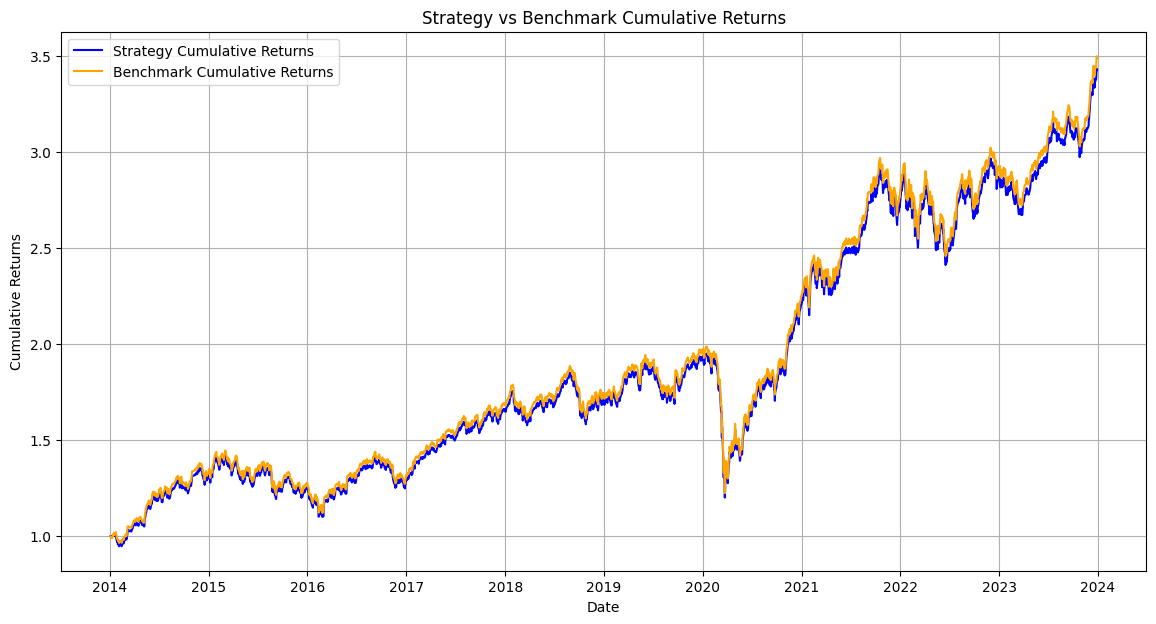

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['CumulativeReturns'], label='Strategy Cumulative Returns', color='blue')
plt.plot((1 + df['Close'].pct_change()).cumprod(), label='Benchmark Cumulative Returns', color='orange')
plt.title('Strategy vs Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def calculate_performance_metrics(df):
    # Calculate daily returns based on the strategy
    df['StrategyReturns'] = df['Close'].pct_change() * df['Position'].shift(1)  # Use shifted position
    df['CumulativeReturns'] = (1 + df['StrategyReturns']).cumprod()  # Cumulative returns

    # Calculate performance metrics
    total_return = df['CumulativeReturns'].iloc[-1] - 1  # Total return from the strategy
    total_trades = df['Position'].diff().ne(0).sum()  # Count trades (entry and exit)
    winning_trades = df['StrategyReturns'][df['StrategyReturns'] > 0].count()  # Count winning trades
    win_rate = winning_trades / total_trades if total_trades > 0 else 0  # Win rate
    max_drawdown = (df['CumulativeReturns'].cummax() - df['CumulativeReturns']).max()  # Max drawdown

    return {
        'Total Return (%)': total_return * 100,
        'Total Trades': total_trades,
        'Winning Trades': winning_trades,
        'Win Rate (%)': win_rate * 100,
        'Max Drawdown (%)': max_drawdown * 100
    }

performance_metrics = calculate_performance_metrics(df)
print(performance_metrics)


{'Total Return (%)': 242.8233338494255, 'Total Trades': 2, 'Winning Trades': 1326, 'Win Rate (%)': 66300.0, 'Max Drawdown (%)': 74.96588012635812}


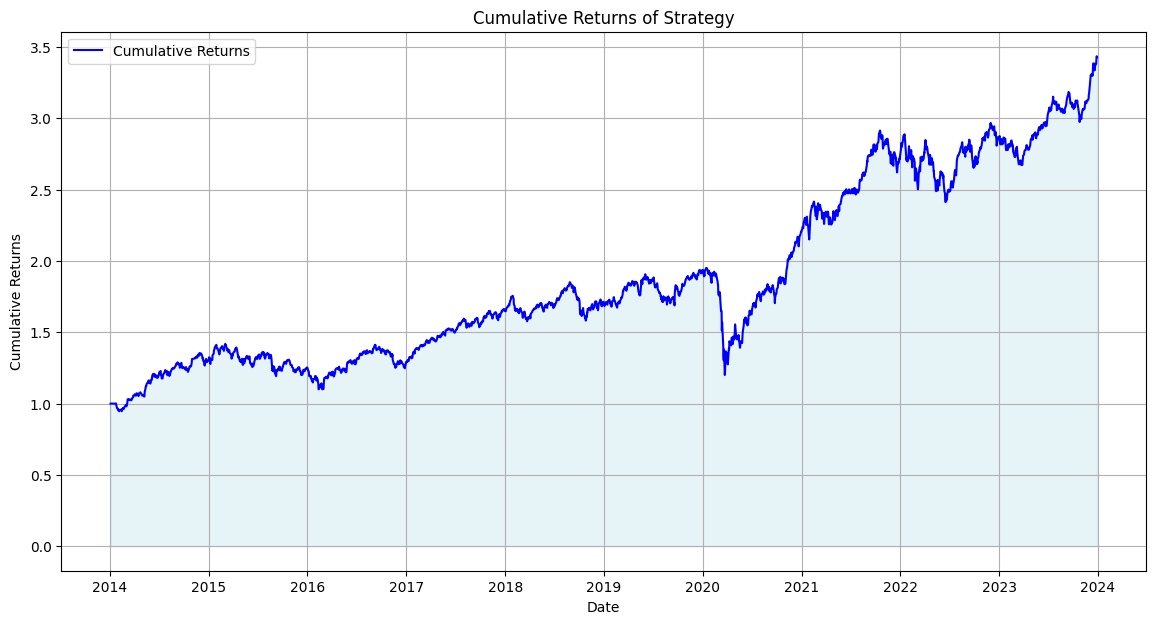

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['CumulativeReturns'], label='Cumulative Returns', color='blue')
plt.fill_between(df.index, df['CumulativeReturns'], color='lightblue', alpha=0.3)
plt.title('Cumulative Returns of Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


#### LSTM IN THIS

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array
data = df['Close'].values.reshape(-1, 1)
X, y = create_dataset(data, time_step=10)  # Adjust time_step as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the LSTM model
model = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.LSTM(50),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch size as needed


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0583
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0692e-04
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2842e-04
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6608e-04
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8943e-04
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7094e-04
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3690e-04
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9388e-04
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9369e-04
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9713e-04
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4421e-04
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7548e-04
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5210e-04
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4559e-04
Epoch 15/100
62/6

In [ ]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predicted prices to get the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


Root Mean Squared Error: 5979.997880539702


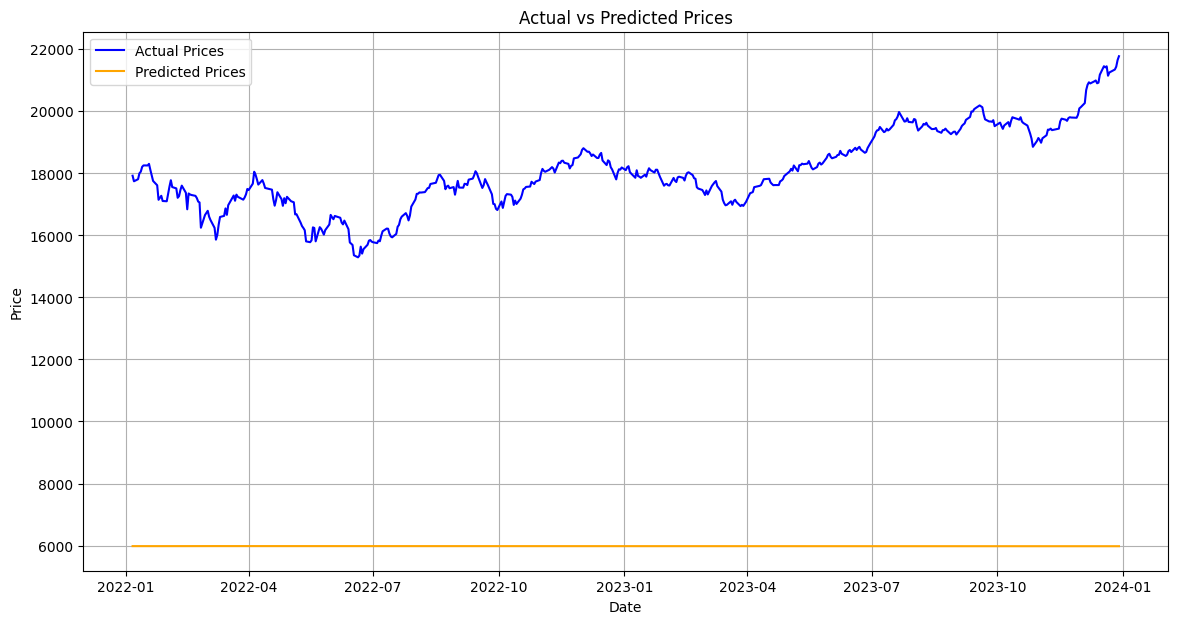

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
print(f'Root Mean Squared Error: {rmse}')

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(df.index[-len(predicted_prices):], predicted_prices, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
df['PredictedPrice'] = np.nan
df.iloc[-len(predicted_prices):, df.columns.get_loc('PredictedPrice')] = predicted_prices.flatten()

def generate_lstm_signals(df):
    df['LSTM_Signal'] = 0
    df.loc[df['PredictedPrice'] > df['Close'], 'LSTM_Signal'] = 1  # Long signal
    df.loc[df['PredictedPrice'] < df['Close'], 'LSTM_Signal'] = -1  # Short signal
    return df

df = generate_lstm_signals(df)


#### Signals Based on LSTM Predictions

In [ ]:
# Generate LSTM-based trading signals
df = generate_lstm_signals(df)


In [ ]:
def calculate_lstm_performance_metrics(df):
    # Calculate daily returns based on the strategy
    df['StrategyReturns'] = df['Close'].pct_change() * df['LSTM_Signal'].shift(1)  # Use shifted signal
    df['CumulativeReturns'] = (1 + df['StrategyReturns']).cumprod()  # Cumulative returns

    # Calculate performance metrics
    total_return = df['CumulativeReturns'].iloc[-1] - 1  # Total return from the strategy
    total_trades = df['LSTM_Signal'].diff().ne(0).sum()  # Count trades (entry and exit)
    winning_trades = df['StrategyReturns'][df['StrategyReturns'] > 0].count()  # Count winning trades
    win_rate = winning_trades / total_trades if total_trades > 0 else 0  # Win rate
    max_drawdown = (df['CumulativeReturns'].cummax() - df['CumulativeReturns']).max()  # Max drawdown

    return {
        'Total Return (%)': total_return * 100,
        'Total Trades': total_trades,
        'Winning Trades': winning_trades,
        'Win Rate (%)': win_rate * 100,
        'Max Drawdown (%)': max_drawdown * 100
    }

# Calculate and print performance metrics based on LSTM signals
lstm_performance_metrics = calculate_lstm_performance_metrics(df)
print(lstm_performance_metrics)


{'Total Return (%)': 33.93358735043608, 'Total Trades': 2, 'Winning Trades': 262, 'Win Rate (%)': 13100.0, 'Max Drawdown (%)': 25.667087986780913}


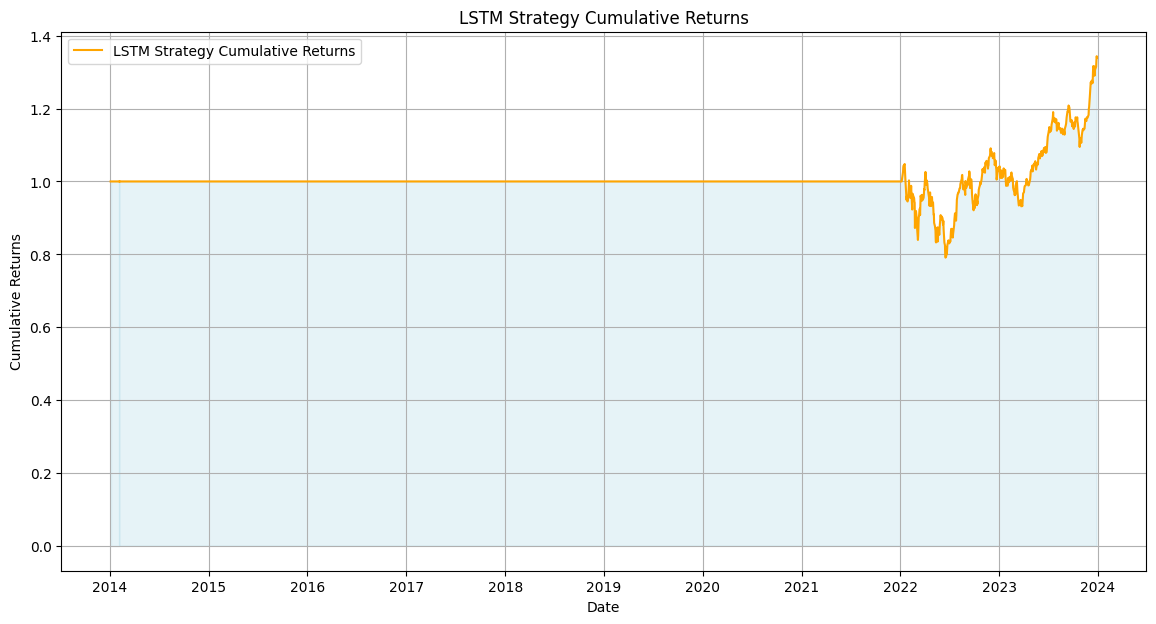

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['CumulativeReturns'], label='LSTM Strategy Cumulative Returns', color='orange')
plt.fill_between(df.index, df['CumulativeReturns'], color='lightBLUE', alpha=0.3)
plt.title('LSTM Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


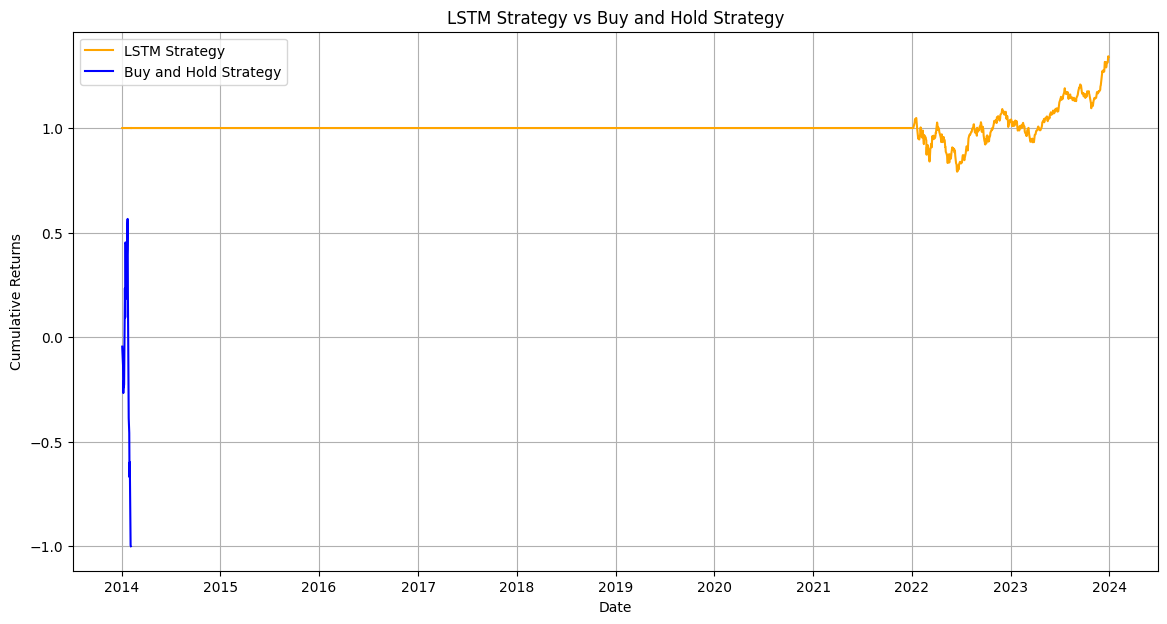

In [ ]:
# Buy-and-hold strategy performance
df['BuyHoldReturns'] = (df['Close'].pct_change() + 1).cumprod() - 1

# Visualize both strategies
plt.figure(figsize=(14, 7))
plt.plot(df['CumulativeReturns'], label='LSTM Strategy', color='orange')
plt.plot(df['BuyHoldReturns'], label='Buy and Hold Strategy', color='blue')
plt.title('LSTM Strategy vs Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save the DataFrame to a CSV file
output_path = '/content/NSE50_LSTM_Results.csv'
df.to_csv(output_path)

print(f'Data saved to {output_path}')


Data saved to /content/NSE50_LSTM_Results.csv


In [ ]:
# Check your signal generation logic
def generate_lstm_signals(df):
    # Generate signals based on the predicted prices
    df['LSTM_Signal'] = 0  # Default to zero
    df.loc[df['Predicted_Close'] > df['Close'], 'LSTM_Signal'] = 1  # Buy signal
    df.loc[df['Predicted_Close'] < df['Close'], 'LSTM_Signal'] = -1  # Sell signal
    return df


In [ ]:
# Adjust the StrongBound as needed
StrongBound = 0.1  # Example adjustment


In [ ]:
def calculate_trade_signal(df):
    df['TradeSignal'] = 0
    df.loc[df['LSTM_Signal'] == 1, 'TradeSignal'] = 1  # Long position
    df.loc[df['LSTM_Signal'] == -1, 'TradeSignal'] = -1  # Short position
    return df


In [ ]:
def train_lstm_model(df):
    # Prepare your data here (e.g., scaling, reshaping)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(df[['Close']])

    # Define time step for LSTM
    time_step = 10
    X, y = create_dataset(data_scaled, time_step)

    # Reshape for LSTM
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))

    # Compile and fit the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=50, batch_size=32)

    # Make predictions
    predicted_price = model.predict(X)

    # Inverse transform predictions to original scale
    predicted_price = scaler.inverse_transform(predicted_price)

    # Add predictions to DataFrame
    df['Predicted_Close'] = np.nan  # Initialize with NaN
    # Correctly assign predictions
    start_index = time_step  # Adjust index by time_step
    df.iloc[start_index:start_index + len(predicted_price), df.columns.get_loc('Predicted_Close')] = predicted_price.flatten()

    return df

# Call the function to train the model and get predictions
df = train_lstm_model(df)

# Now generate LSTM signals if needed
df = generate_lstm_signals(df)

# Print the relevant columns
print(df[['Close', 'Predicted_Close', 'LSTM_Signal']].tail(20))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0306
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.8044e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9598e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.0139e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8370e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9910e-04
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8524e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9194e-04
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0366e-04
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3235e-04
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5920e-04
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5611e-04
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5372e-04
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0233e-04
Epoch 15/50
77/77 ━━━━━━━━━━━━

In [ ]:
def generate_lstm_signals(df, threshold=0.01):
    df['LSTM_Signal'] = 0  # Default to no signal
    df['LSTM_Signal'][df['Predicted_Close'] > df['Close'] * (1 + threshold)] = 1  # Buy signal
    df['LSTM_Signal'][df['Predicted_Close'] < df['Close'] * (1 - threshold)] = -1  # Sell signal
    return df

df = generate_lstm_signals(df)


<ipython-input-200-40ac939030e9>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['LSTM_Signal'][df['Predicted_Close'] > df['Close'] * (1 + threshold)] = 1  # Buy signal
<ipython-input-200-40ac939030e9>:3: SettingWithCopyWarning: 
A value

In [ ]:
def backtest_strategy(df):
    df['Position'] = df['LSTM_Signal'].replace(-1, 0).ffill()  # Forward fill to maintain position
    df['Strategy_Return'] = df['Close'].pct_change() * df['Position'].shift(1)  # Daily return
    df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()  # Cumulative return
    return df

df = backtest_strategy(df)


In [ ]:
def calculate_performance_metrics(df):
    total_return = df['Cumulative_Strategy_Return'].iloc[-1] - 1
    max_drawdown = ((df['Cumulative_Strategy_Return'].cummax() - df['Cumulative_Strategy_Return']) / df['Cumulative_Strategy_Return'].cummax()).max()
    print(f"Total Return: {total_return:.2%}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")

calculate_performance_metrics(df)


Total Return: -3.15%
Maximum Drawdown: 28.15%


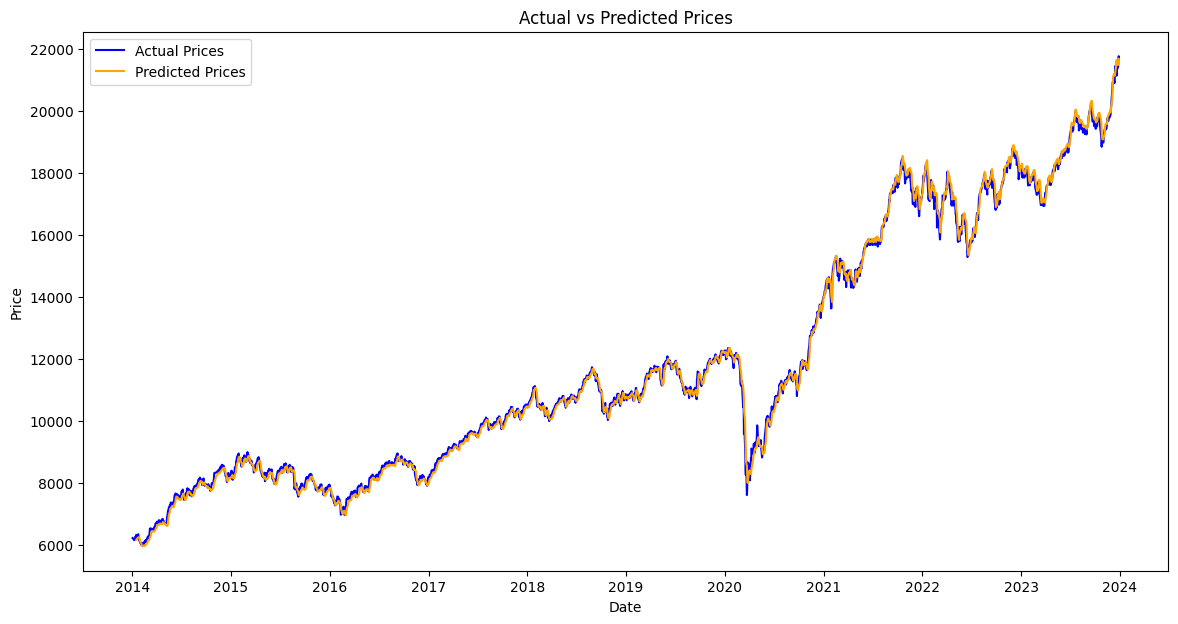

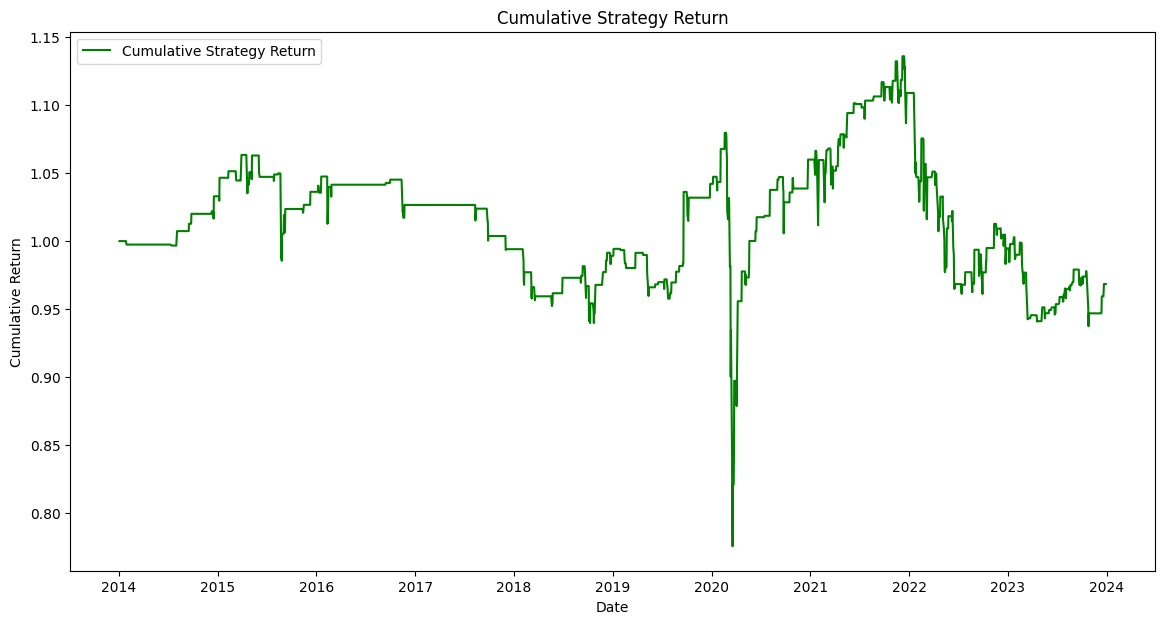

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Prices', color='blue')
plt.plot(df['Predicted_Close'], label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative_Strategy_Return'], label='Cumulative Strategy Return', color='green')
plt.title('Cumulative Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/MyProject/project_files/NSE50_with_lstm_predictions.csv')
df.to_csv('/content/NSE50_with_lstm_predictions.csv')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [ ]:
# Load your data
df = pd.read_csv('/content/NSE50_with_lstm_predictions.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Assume 'Close' is the target variable and features are already defined
X = df.drop(columns=['Close', 'Predicted_Close', 'LSTM_Signal'])
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Drop rows with missing values in the features
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align the target variable with the features
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align the target variable with the features


In [ ]:
print(X_train.isnull().sum())  # Check for missing values in training features
print(X_test.isnull().sum())   # Check for missing values in testing features


Open                          0
High                          0
Low                           0
Adj Close                     0
Volume                        0
Position                      0
Strategy_Return               0
Cumulative_Strategy_Return    0
dtype: int64
Open                          0
High                          0
Low                           0
Adj Close                     0
Volume                        0
Position                      0
Strategy_Return               0
Cumulative_Strategy_Return    0
dtype: int64


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

# Fit HistGradientBoosting model
hg_model = HistGradientBoostingRegressor(random_state=42)
hg_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingRegressor(random_state=42)

In [ ]:
# Example Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Example Gradient Boosting Model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# LSTM Model:
# Note: This assumes you've already defined and trained your LSTM model separately.
# The output of the LSTM model should be compatible with the input expected by the VotingRegressor.
# You should also ensure the LSTM model returns predictions in a format compatible with the other models.


GradientBoostingRegressor(random_state=42)

In [ ]:
# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('gbm', gbm_model),
    ('lstm', lstm_model)  # Replace with actual LSTM predictions if needed
])

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)


NameError: name 'lstm_model' is not defined

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming you have your training data in X_train and y_train
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape your training data for LSTM [samples, time steps, features]
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Create and fit the LSTM model
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 53373224.0000
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28429784.0000
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11560758.0000
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1396079.6250
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132327.5469
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81287.9688
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133347.3906
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35295.4180
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50321.5742
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49735.2891
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23420.0195
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25733.1348
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20821.8809
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62101.3594
Ep

In [ ]:
# Reshape your test data for LSTM
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Get LSTM predictions
lstm_predictions = lstm_model.predict(X_test_lstm)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
# Assuming lstm_predictions are now in the correct shape
lstm_predictions = lstm_predictions.flatten()  # Flatten if necessary

# Combine predictions into a DataFrame for ensemble training (optional)
# predictions_df = pd.DataFrame({
#     'lstm': lstm_predictions,
#     'rf': rf_model.predict(X_test),
#     'gbm': gbm_model.predict(X_test)
# })

# Use the LSTM model object in the VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('lstm', lstm_model),  # Use lstm_model instead of lstm_predictions
    ('rf', rf_model),
    ('gbm', gbm_model)
])

# Ensure you use the training data for fitting
ensemble_model.fit(X_train, y_train)

ValueError: The estimator Sequential should be a regressor.

error waalae

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load your data
df = pd.read_csv('/content/drive/MyDrive/MyProject/project_files/NSE50_with_indicators.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Handle missing values
df.ffill(inplace=True)  # Forward fill to handle missing values
df.bfill(inplace=True)  # Backward fill for any remaining NaNs

# Check for NaN values in the DataFrame
print(df.isnull().sum())

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Check if scaled data has NaN values
if np.any(np.isnan(scaled_data)):
    print("Scaled data contains NaN values!")

# Prepare training data
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, df.columns.get_loc('Close')])

X, y = np.array(X), np.array(y)

# Check shapes
print(f'X shape: {X.shape}')  # Should be (num_samples, 60, num_features)
print(f'y shape: {y.shape}')  # Should be (num_samples,)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
lstm_model.add(Dense(units=1))

# Compile the model with a lower learning rate and gradient clipping
optimizer = Adam(learning_rate=0.00001)
lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
lstm_model.fit(X, y, epochs=50, batch_size=32)

# Generate predictions
lstm_predictions = lstm_model.predict(X)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(np.concatenate((np.zeros((lstm_predictions.shape[0], df.shape[1] - 1)), lstm_predictions), axis=1))[:, -1]

# Check predictions
print("LSTM Predictions:", lstm_predictions[:10])  # Print first 10 predictions


Open               0
High               0
Low                0
Close              0
Volume             0
MACD               0
MACD_Signal        0
EMA_20             0
EMA_50             0
EMA_100            0
Pivot              0
Support1           0
Resistance1        0
Bollinger_Upper    0
Bollinger_Lower    0
EMA_150            0
EMA_200            0
RSI                0
dtype: int64
X shape: (2393, 60, 18)
y shape: (2393,)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.2662
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.1733
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1119
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0713
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0407
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0235
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0152
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0105
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0082
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0059
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0042
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0034
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0025
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0021
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017
Epoch 16/50
75/

MSE: 68899772.90667894, MAE: 8101.536725740617, RMSE: 8300.588708439838


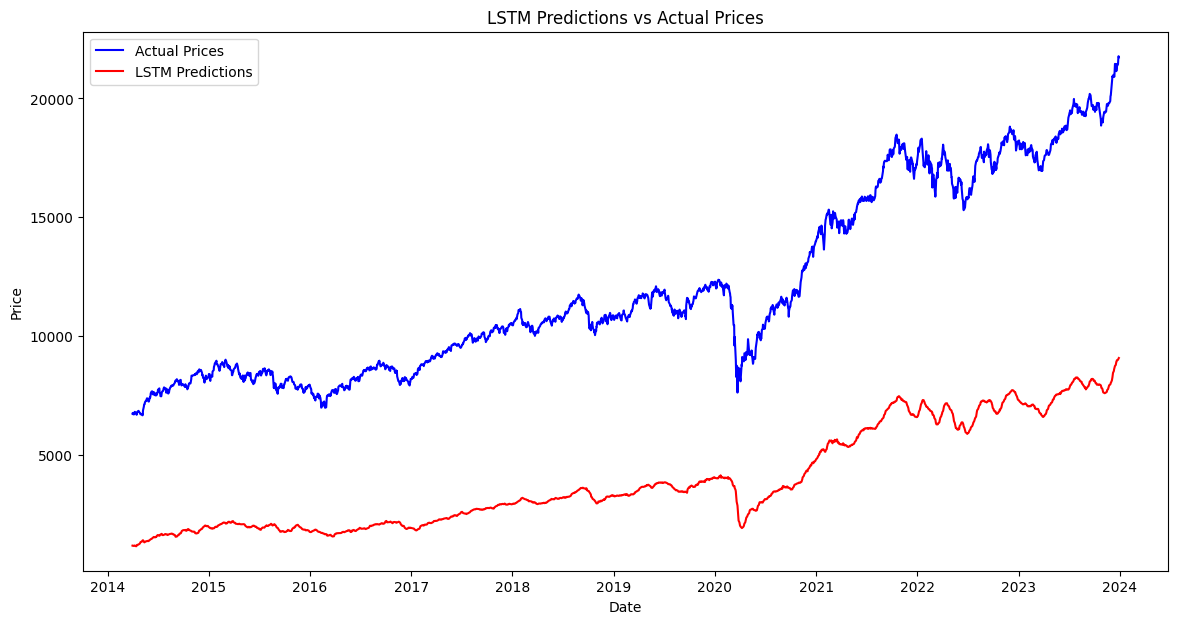

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Inverse transform the predictions
lstm_predictions_inverse = scaler.inverse_transform(
    np.concatenate((np.zeros((lstm_predictions.shape[0], df.shape[1] - 1)), lstm_predictions.reshape(-1, 1)), axis=1)
)

# Extract only the predicted 'Close' prices
lstm_predictions_inverse = lstm_predictions_inverse[:, -1]

# Step 2: Calculate performance metrics
# Assuming you have the actual 'Close' prices for the prediction period
actual_prices = df['Close'].values[60:60 + len(lstm_predictions)]  # Adjust the indexing as necessary

mse = mean_squared_error(actual_prices, lstm_predictions_inverse)
mae = mean_absolute_error(actual_prices, lstm_predictions_inverse)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

# Step 3: Visualize predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(df.index[60:60 + len(lstm_predictions)], actual_prices, color='blue', label='Actual Prices')
plt.plot(df.index[60:60 + len(lstm_predictions)], lstm_predictions_inverse, color='red', label='LSTM Predictions')
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a new DataFrame to hold actual prices and predictions
results_df = pd.DataFrame({
    'Date': df.index[60:60 + len(lstm_predictions)],  # Adjusting for the prediction period
    'Actual_Close': actual_prices,
    'Predicted_Close': lstm_predictions_inverse
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Save to CSV
results_df.to_csv('/content/lstm_predictions.csv')

print("Data saved to 'lstm_predictions.csv'")


Data saved to 'lstm_predictions.csv'


## Bollinger Bands Strategy

In [ ]:
import pandas as pd
import numpy as np

# Load your Nifty 50 dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Define parameters for Bollinger Bands
length = 20
mult = 2.0

# Calculate the Bollinger Bands
data['Basis'] = data['Close'].rolling(window=length).mean()
data['Deviation'] = mult * data['Close'].rolling(window=length).std()
data['Upper'] = data['Basis'] + data['Deviation']
data['Lower'] = data['Basis'] - data['Deviation']

# Select only the necessary columns: Date, Close, Upper, Lower, and Basis
bollinger_data = data[['Close', 'Upper', 'Lower', 'Basis']].copy()

# Save the Bollinger Bands data to a new CSV file
bollinger_data.to_csv('/content/Bollinger_Bands_Data.csv')

# Display the resulting DataFrame
print(bollinger_data.tail())


                   Close         Upper         Lower         Basis
Date                                                              
2023-12-22  21349.400391  21877.731494  19785.043506  20831.387500
2023-12-26  21441.349609  21872.033026  19955.407013  20913.720020
2023-12-27  21654.750000  21885.382787  20118.562330  21001.972559
2023-12-28  21778.699219  21925.763687  20246.391391  21086.077539
2023-12-29  21731.400391  21924.068942  20407.911137  21165.990039


In [ ]:
import pandas as pd
import numpy as np

# Load your Nifty 50 dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Define parameters for Bollinger Bands
length = 20
mult = 2.0

# Calculate the Bollinger Bands
data['Basis'] = data['Close'].rolling(window=length).mean()
data['Deviation'] = mult * data['Close'].rolling(window=length).std()
data['Bollinger_Upper'] = data['Basis'] + data['Deviation']
data['Bollinger_Lower'] = data['Basis'] - data['Deviation']

# Update the DataFrame to include only the necessary columns
data['upper'] = data['Bollinger_Upper']
data['lower'] = data['Bollinger_Lower']

# Drop the old Bollinger columns
data = data.drop(columns=['Bollinger_Upper', 'Bollinger_Lower', 'Basis', 'Deviation'])

# Save the updated DataFrame back to the CSV
data.to_csv('/content/NSE50_with_indicators.csv')

# Display the updated DataFrame
print(data.tail())


                    Open          High           Low         Close  Volume  \
Date                                                                         
2023-12-22  21295.849609  21390.500000  21232.449219  21349.400391  284700   
2023-12-26  21365.199219  21477.150391  21329.449219  21441.349609  219500   
2023-12-27  21497.650391  21675.750000  21495.800781  21654.750000  256500   
2023-12-28  21715.000000  21801.449219  21678.000000  21778.699219  393100   
2023-12-29  21737.650391  21770.300781  21676.900391  21731.400391  270900   

                  MACD  MACD_Signal        EMA_20        EMA_50       EMA_100  \
Date                                                                            
2023-12-22  406.849869   400.391457  20860.984922  20298.886262  19863.391919   
2023-12-26  403.196546   400.952475  20916.257749  20343.688746  19894.638606   
2023-12-27  412.762817   403.314543  20986.590345  20395.102913  19929.492297   
2023-12-28  425.441595   407.739954  21062.02928

#### STRATEGY

Total Strategy Return: -33.36%
Maximum Drawdown: 34.03%


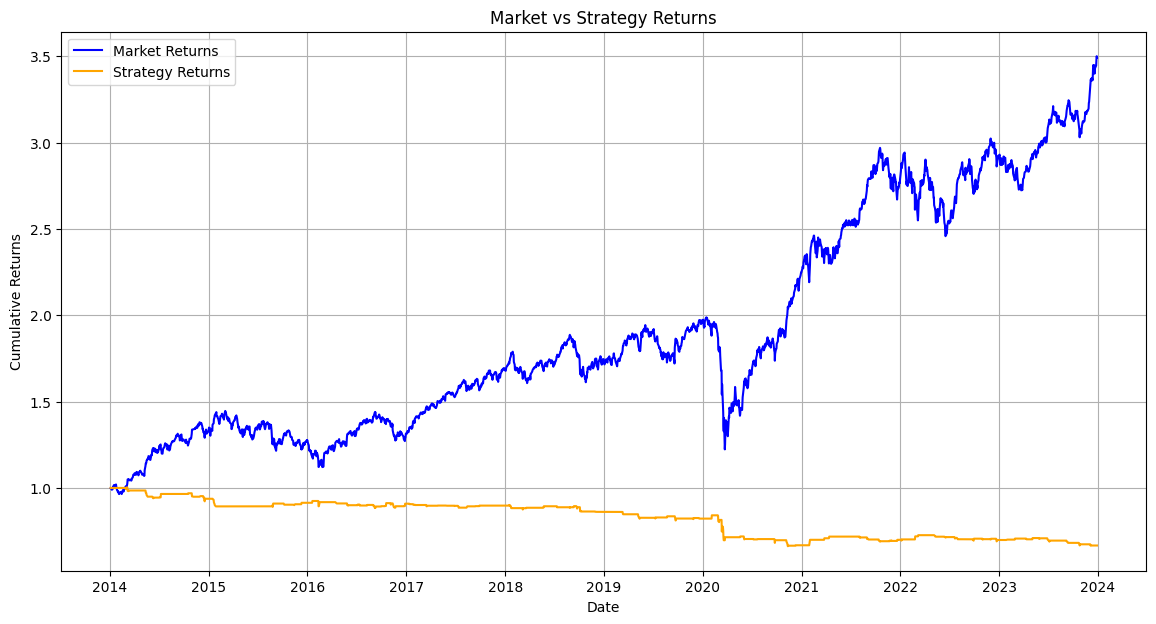

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Initialize columns for signals and positions
data['Signal'] = 0
data['Position'] = 0

# Generate buy and sell signals
data.loc[data['Close'] < data['lower'], 'Signal'] = 1  # Buy signal
data.loc[data['Close'] > data['upper'], 'Signal'] = -1  # Sell signal

# Calculate positions
data['Position'] = data['Signal'].shift()  # Shift signals to avoid look-ahead bias

# Calculate daily returns
data['Market_Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Performance metrics
total_return = data['Cumulative_Strategy_Returns'].iloc[-1] - 1
max_drawdown = (data['Cumulative_Strategy_Returns'].cummax() - data['Cumulative_Strategy_Returns']).max()

# Display performance metrics
print(f"Total Strategy Return: {total_return:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Visualize cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative_Market_Returns'], label='Market Returns', color='blue')
plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='orange')
plt.title('Market vs Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from itertools import product

# Load dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Define function to calculate returns based on Bollinger Bands parameters
def backtest_bollinger_bands(data, length, mult):
    data['Basis'] = data['Close'].rolling(window=length).mean()
    data['Deviation'] = mult * data['Close'].rolling(window=length).std()
    data['Upper'] = data['Basis'] + data['Deviation']
    data['Lower'] = data['Basis'] - data['Deviation']

    # Generate signals
    data['Signal'] = 0
    data.loc[data['Close'] < data['Lower'], 'Signal'] = 1  # Buy
    data.loc[data['Close'] > data['Upper'], 'Signal'] = -1  # Sell

    # Calculate positions and returns
    data['Position'] = data['Signal'].shift()
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Market_Returns'] * data['Position']
    return data['Strategy_Returns'].cumsum().iloc[-1]  # Cumulative return

# Define ranges for optimization
lengths = range(5, 31)  # Bollinger Bands length
multipliers = np.arange(1.0, 3.0, 0.1)  # Multipliers

# Create a grid of parameters
results = []
for length, mult in product(lengths, multipliers):
    total_return = backtest_bollinger_bands(data.copy(), length, mult)
    results.append((length, mult, total_return))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Length', 'Multiplier', 'Total Return'])
best_result = results_df.loc[results_df['Total Return'].idxmax()]

print("Best Parameters:")
print(f"Length: {best_result['Length']}, Multiplier: {best_result['Multiplier']}, Total Return: {best_result['Total Return']:.2f}")


Best Parameters:
Length: 15.0, Multiplier: 2.4000000000000012, Total Return: 0.16


Best Parameters:
Length: 15.0, Multiplier: 2.4000000000000012, Total Return: 0.16


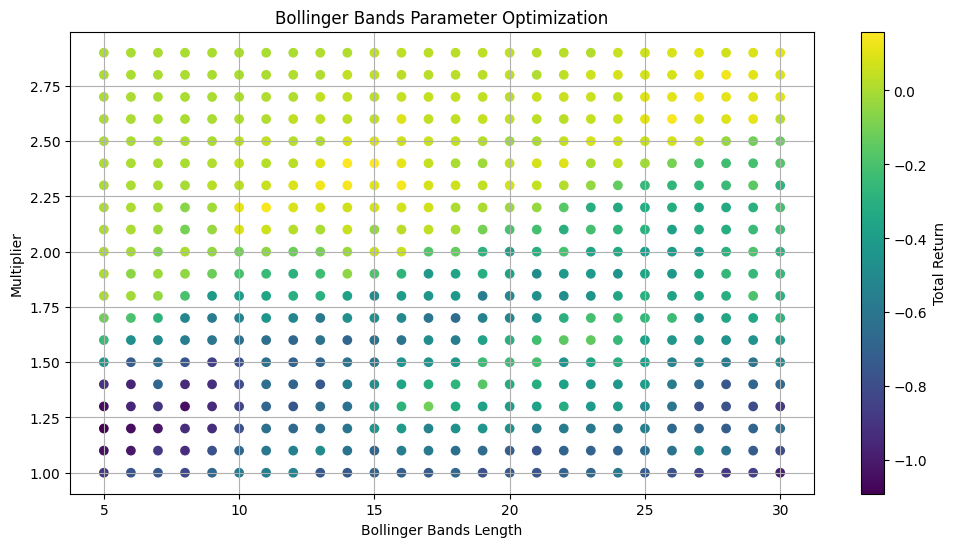

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', parse_dates=['Date'], index_col='Date')

# Define function to calculate returns based on Bollinger Bands parameters
def backtest_bollinger_bands(data, length, mult):
    # Calculate Bollinger Bands
    data['Basis'] = data['Close'].rolling(window=length).mean()
    data['Deviation'] = mult * data['Close'].rolling(window=length).std()
    data['Upper'] = data['Basis'] + data['Deviation']
    data['Lower'] = data['Basis'] - data['Deviation']

    # Generate signals
    data['Signal'] = 0
    data.loc[data['Close'] < data['Lower'], 'Signal'] = 1  # Buy signal
    data.loc[data['Close'] > data['Upper'], 'Signal'] = -1  # Sell signal

    # Calculate positions and returns
    data['Position'] = data['Signal'].shift()
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

    return data['Strategy_Returns'].cumsum().iloc[-1]  # Return cumulative return

# Define ranges for optimization
lengths = range(5, 31)  # Bollinger Bands length
multipliers = np.arange(1.0, 3.0, 0.1)  # Multipliers

# Create a grid of parameters
results = []
for length, mult in product(lengths, multipliers):
    total_return = backtest_bollinger_bands(data.copy(), length, mult)
    results.append((length, mult, total_return))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Length', 'Multiplier', 'Total Return'])

# Identify the best parameters
best_result = results_df.loc[results_df['Total Return'].idxmax()]

print("Best Parameters:")
print(f"Length: {best_result['Length']}, Multiplier: {best_result['Multiplier']}, Total Return: {best_result['Total Return']:.2f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Length'], results_df['Multiplier'], c=results_df['Total Return'], cmap='viridis')
plt.colorbar(label='Total Return')
plt.title('Bollinger Bands Parameter Optimization')
plt.xlabel('Bollinger Bands Length')
plt.ylabel('Multiplier')
plt.grid()
plt.show()


Final Cumulative Strategy Return: 16.75%
Final Cumulative Market Return: 249.31%


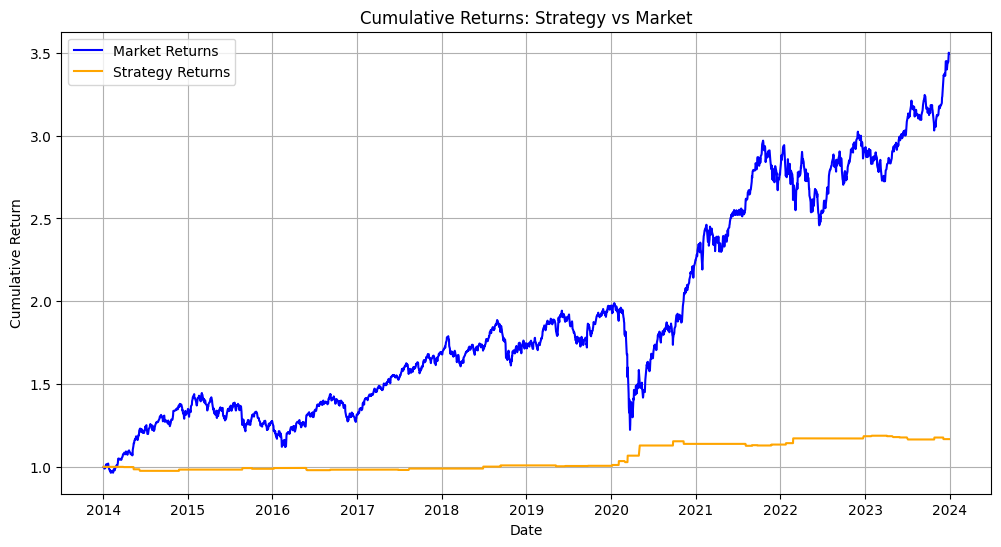

In [ ]:
# Assuming the best parameters have been identified
best_length = int(best_result['Length'])  # Ensure it's an integer
best_multiplier = float(best_result['Multiplier'])  # Ensure it's a float

# Function to implement the optimized strategy
def implement_optimized_strategy(data, length, mult):
    # Ensure the data has enough entries for the rolling window
    if len(data) < length:
        raise ValueError("Data length is shorter than the specified Bollinger Bands length.")

    # Calculate Bollinger Bands
    data['Basis'] = data['Close'].rolling(window=length).mean()
    data['Deviation'] = mult * data['Close'].rolling(window=length).std()
    data['Upper'] = data['Basis'] + data['Deviation']
    data['Lower'] = data['Basis'] - data['Deviation']

    # Generate signals
    data['Signal'] = 0
    data.loc[data['Close'] < data['Lower'], 'Signal'] = 1  # Buy
    data.loc[data['Close'] > data['Upper'], 'Signal'] = -1  # Sell

    # Calculate positions and returns
    data['Position'] = data['Signal'].shift()
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

    # Calculate cumulative returns
    data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
    data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

    return data

# Apply the optimized strategy
optimized_data = implement_optimized_strategy(data.copy(), best_length, best_multiplier)

# Evaluate performance
final_return = optimized_data['Cumulative_Strategy_Returns'].iloc[-1] - 1
final_market_return = optimized_data['Cumulative_Market_Returns'].iloc[-1] - 1

print(f"Final Cumulative Strategy Return: {final_return:.2%}")
print(f"Final Cumulative Market Return: {final_market_return:.2%}")

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(optimized_data['Cumulative_Market_Returns'], label='Market Returns', color='blue')
plt.plot(optimized_data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='orange')
plt.title('Cumulative Returns: Strategy vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()


#### random forest

In [ ]:
# Create additional features for the model
optimized_data['Price_Above_Upper'] = optimized_data['Close'] - optimized_data['Upper']
optimized_data['Price_Below_Lower'] = optimized_data['Close'] - optimized_data['Lower']
optimized_data['Lagged_Close'] = optimized_data['Close'].shift(1)
optimized_data['Lagged_Return'] = optimized_data['Market_Returns'].shift(1)

# Drop NaN values created by shifting
model_data = optimized_data.dropna()

# Define features and target variable
features = model_data[['Upper', 'Lower', 'Basis', 'Price_Above_Upper', 'Price_Below_Lower', 'Lagged_Close', 'Lagged_Return']]
target = model_data['Signal']  # Target is the Signal generated by the strategy


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00         4

    accuracy                           1.00       487
   macro avg       1.00      1.00      1.00       487
weighted avg       1.00      1.00      1.00       487

[[  5   0   0]
 [  0 478   0]
 [  0   0   4]]


In [ ]:
# Prepare the latest data for prediction
latest_data = optimized_data.iloc[-1]  # Get the latest row
latest_features = [[
    latest_data['Upper'],
    latest_data['Lower'],
    latest_data['Basis'],
    latest_data['Price_Above_Upper'],
    latest_data['Price_Below_Lower'],
    latest_data['Close'],
    latest_data['Lagged_Return']
]]

# Predict the signal
predicted_signal = model.predict(latest_features)
print(f"Predicted Signal for Next Day: {predicted_signal[0]}")


Predicted Signal for Next Day: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### lSTM

In [ ]:
import numpy as np

# Function to create sequences
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

# Specify the number of time steps
time_steps = 10  # You can adjust this

# Create sequences
X, y = create_sequences(model_data[['Upper', 'Lower', 'Basis', 'Price_Above_Upper', 'Price_Below_Lower', 'Lagged_Close', 'Lagged_Return']].values, model_data['Signal'].values, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9488 - loss: 0.2083 - val_accuracy: 0.9814 - val_loss: -0.0080
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9770 - loss: 0.0094 - val_accuracy: 0.9814 - val_loss: -0.0126
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9769 - loss: 0.0234 - val_accuracy: 0.9814 - val_loss: -0.0138
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9754 - loss: 0.0179 - val_accuracy: 0.9814 - val_loss: -0.0149
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9824 - loss: -0.0109 - val_accuracy: 0.9814 - val_loss: -0.0161
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9823 - loss: -0.0065 - val_accuracy: 0.9814 - val_loss: -0.0154
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9766 - loss: 0.0159 - val_accuracy: 0.9814 - val_loss: -0.0169
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9770 - loss: 0.0223 - val_accuracy: 

In [ ]:
# Predict using the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Evaluate the model
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.98      1.00      0.99       476
           1       0.00      0.00      0.00         4

    accuracy                           0.98       485
   macro avg       0.33      0.33      0.33       485
weighted avg       0.96      0.98      0.97       485

[[  0   5   0]
 [  0 476   0]
 [  0   4   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


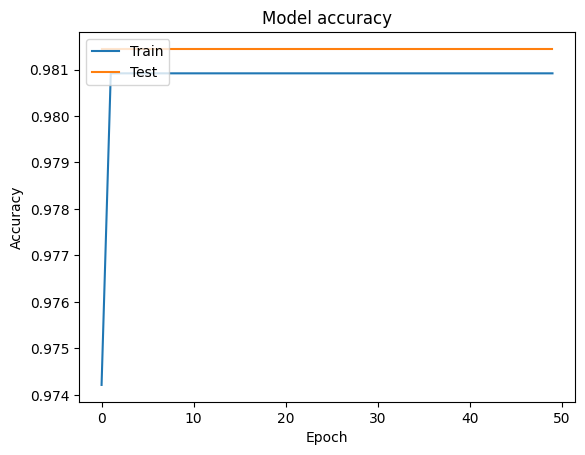

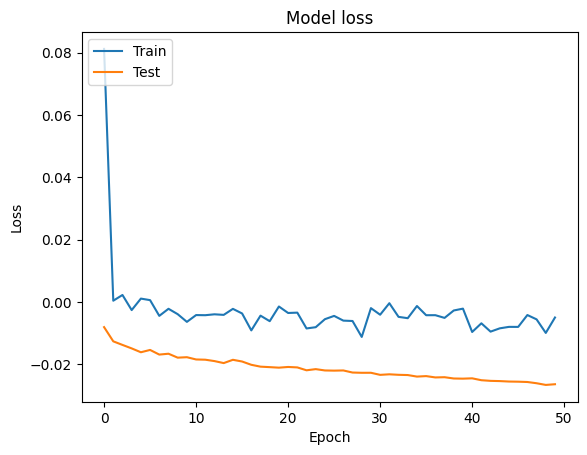

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Prepare the latest data for prediction
latest_data = model_data[['Upper', 'Lower', 'Basis', 'Price_Above_Upper', 'Price_Below_Lower', 'Lagged_Close', 'Lagged_Return']].values[-time_steps:]
latest_data = latest_data.reshape((1, time_steps, latest_data.shape[1]))

# Predict the signal
predicted_signal = model.predict(latest_data)
predicted_class = (predicted_signal > 0.5).astype(int)
print(f"Predicted Signal for Next Day: {predicted_class[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Signal for Next Day: 0


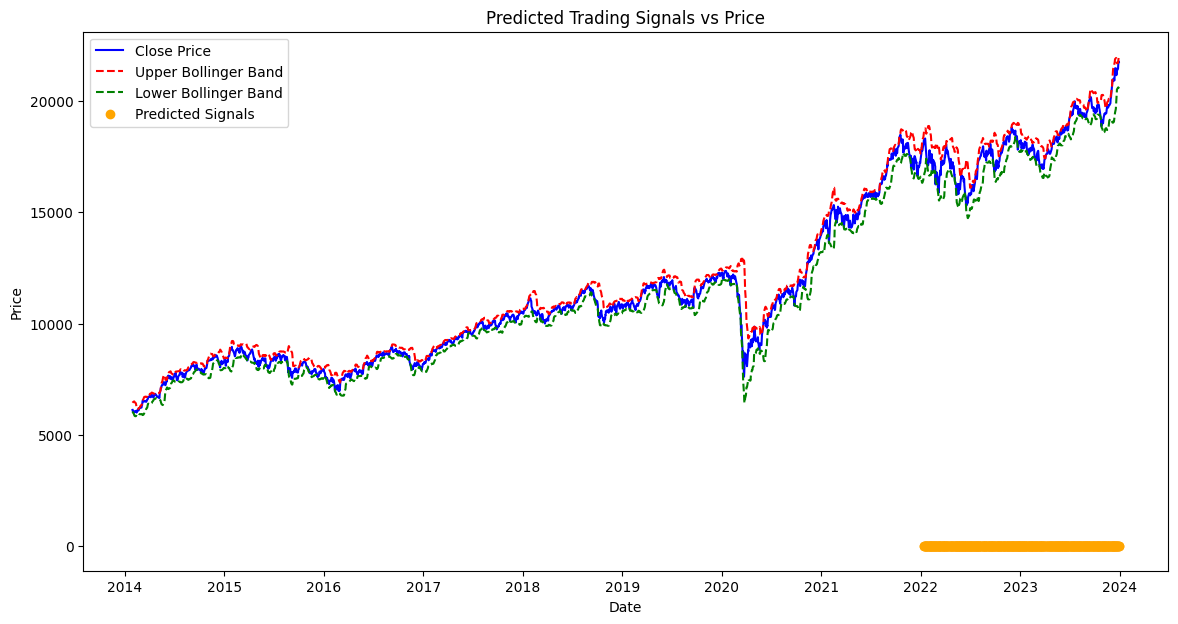

In [ ]:
# Combine actual and predicted signals for visualization
predictions_df = model_data.copy()
predictions_df['Predicted_Signal'] = np.nan
predictions_df.iloc[-len(y_pred_classes):, predictions_df.columns.get_loc('Predicted_Signal')] = y_pred_classes.flatten()

plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Close'], label='Close Price', color='blue')
plt.plot(predictions_df['Upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(predictions_df['Lower'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.scatter(predictions_df.index, predictions_df['Predicted_Signal'], color='orange', label='Predicted Signals', marker='o')
plt.title('Predicted Trading Signals vs Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Initialize variables
predictions_df['Position'] = 0  # Column for the trading position (1 for long, -1 for short)
predictions_df['Daily_Return'] = 0.0  # Column for daily returns
predictions_df['Strategy_Return'] = 0.0  # Column for strategy returns

# Define positions based on predicted signals
predictions_df['Position'] = predictions_df['Predicted_Signal'].shift(1)  # Shift to align with next day's price


In [ ]:
# Calculate daily returns
predictions_df['Daily_Return'] = predictions_df['Close'].pct_change()

# Calculate strategy returns
predictions_df['Strategy_Return'] = predictions_df['Daily_Return'] * predictions_df['Position']


In [ ]:
# Calculate cumulative returns
predictions_df['Cumulative_Strategy_Return'] = (1 + predictions_df['Strategy_Return']).cumprod()
predictions_df['Cumulative_Market_Return'] = (1 + predictions_df['Daily_Return']).cumprod()


In [ ]:
# Total return from the strategy
total_strategy_return = predictions_df['Cumulative_Strategy_Return'].iloc[-1] - 1
total_market_return = predictions_df['Cumulative_Market_Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return * 100:.2f}%")
print(f"Total Market Return: {total_market_return * 100:.2f}%")


Total Strategy Return: 0.00%
Total Market Return: 255.07%


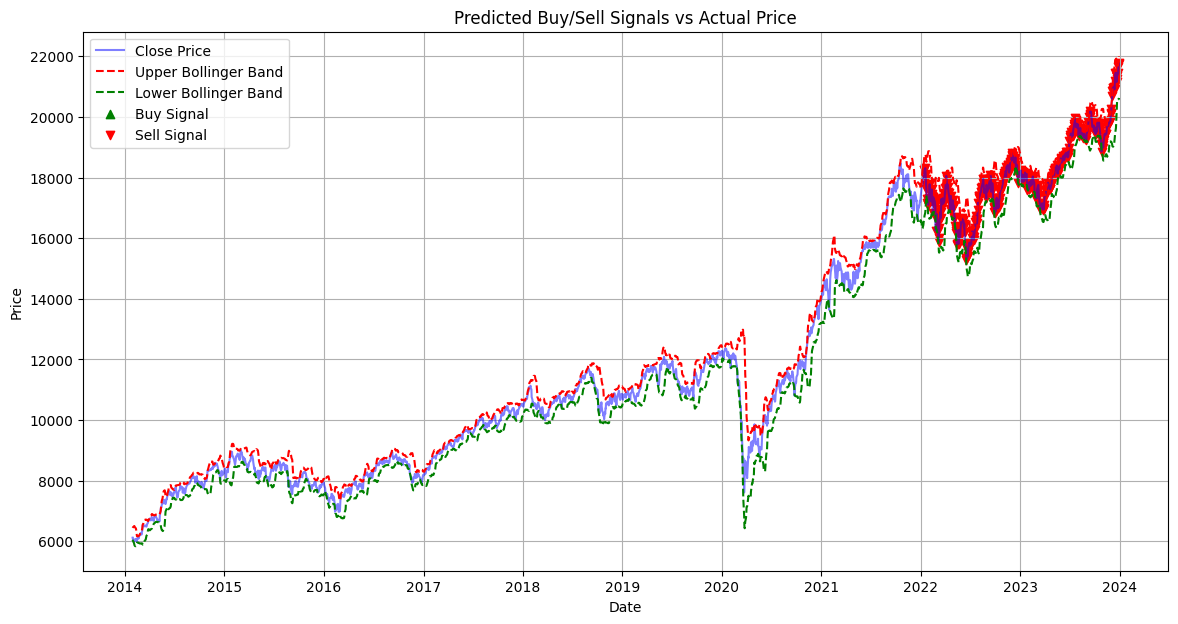

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for easier manipulation
review_df = predictions_df[['Close', 'Predicted_Signal', 'Upper', 'Lower']].copy()

# Map signals to actual buy/sell actions
review_df['Signal'] = review_df['Predicted_Signal'].replace({1: 'Buy', 0: 'Sell'})
review_df['Buy_Signal'] = (review_df['Predicted_Signal'] == 1).astype(int)
review_df['Sell_Signal'] = (review_df['Predicted_Signal'] == 0).astype(int)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot closing prices and Bollinger Bands
plt.plot(review_df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(review_df['Upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(review_df['Lower'], label='Lower Bollinger Band', color='green', linestyle='--')

# Plot buy signals
plt.scatter(review_df.index[review_df['Buy_Signal'] == 1],
            review_df['Close'][review_df['Buy_Signal'] == 1],
            marker='^', color='green', label='Buy Signal', alpha=1)

# Plot sell signals
plt.scatter(review_df.index[review_df['Sell_Signal'] == 1],
            review_df['Close'][review_df['Sell_Signal'] == 1],
            marker='v', color='red', label='Sell Signal', alpha=1)

# Customize the plot
plt.title('Predicted Buy/Sell Signals vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate daily returns
predictions_df['Daily_Return'] = predictions_df['Close'].pct_change()

# Calculate strategy returns
predictions_df['Strategy_Return'] = predictions_df['Daily_Return'] * predictions_df['Position']


In [ ]:
# Calculate cumulative returns
predictions_df['Cumulative_Strategy_Return'] = (1 + predictions_df['Strategy_Return']).cumprod()
predictions_df['Cumulative_Market_Return'] = (1 + predictions_df['Daily_Return']).cumprod()


In [ ]:
# Total return from the strategy
total_strategy_return = predictions_df['Cumulative_Strategy_Return'].iloc[-1] - 1
total_market_return = predictions_df['Cumulative_Market_Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return * 100:.2f}%")
print(f"Total Market Return: {total_market_return * 100:.2f}%")


Total Strategy Return: 0.00%
Total Market Return: 255.07%


In [ ]:
# Step 1: Create a DataFrame for analysis
analysis_df = predictions_df[['Close', 'Predicted_Signal']].copy()

# Step 2: Calculate future price movement
# Shift the 'Close' column to get the next day's close price
analysis_df['Next_Close'] = analysis_df['Close'].shift(-1)

# Determine if the price went up or down
analysis_df['Price_Move'] = (analysis_df['Next_Close'] > analysis_df['Close']).astype(int)  # 1 for up, 0 for down

# Step 3: Identify failed predictions
# Where the predicted signal is 1 (buy) but the price actually went down
failed_buys = analysis_df[(analysis_df['Predicted_Signal'] == 1) & (analysis_df['Price_Move'] == 0)]

# Where the predicted signal is 0 (sell) but the price actually went up
failed_sells = analysis_df[(analysis_df['Predicted_Signal'] == 0) & (analysis_df['Price_Move'] == 1)]

# Step 4: Analyze patterns
print("Failed Buy Predictions:")
print(failed_buys)

print("\nFailed Sell Predictions:")
print(failed_sells)

# Optionally, you can analyze additional market conditions, like volatility
# For example, calculate daily volatility as the difference between high and low prices
predictions_df['Daily_Volatility'] = predictions_df['High'] - predictions_df['Low']

# You can now join this volatility information to your failed predictions DataFrame


Failed Buy Predictions:
Empty DataFrame
Columns: [Close, Predicted_Signal, Next_Close, Price_Move]
Index: []

Failed Sell Predictions:
                   Close  Predicted_Signal    Next_Close  Price_Move
Date                                                                
2022-01-14  18255.750000               0.0  18308.099609           1
2022-01-24  17149.099609               0.0  17277.949219           1
2022-01-28  17101.949219               0.0  17339.849609           1
2022-01-31  17339.849609               0.0  17576.849609           1
2022-02-01  17576.849609               0.0  17780.000000           1
...                  ...               ...           ...         ...
2023-12-20  21150.150391               0.0  21255.050781           1
2023-12-21  21255.050781               0.0  21349.400391           1
2023-12-22  21349.400391               0.0  21441.349609           1
2023-12-26  21441.349609               0.0  21654.750000           1
2023-12-27  21654.750000             

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators.csv', index_col='Date', parse_dates=True)

# Calculate daily volatility
data['Daily_Volatility'] = data['High'] - data['Low']

# Calculate moving averages (e.g., 20-day and 50-day)
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Drop NaN values created by rolling calculations
data = data.dropna()

# Save the updated DataFrame
data.to_csv('/content/NSE50_with_indicators_updated.csv')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset
data = pd.read_csv('/content/NSE50_with_indicators_updated.csv', index_col='Date', parse_dates=True)

# Calculate daily volatility
data['Daily_Volatility'] = data['High'] - data['Low']

# Calculate moving averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Drop NaN values created by rolling calculations
data = data.dropna()

# Feature selection for LSTM model
features = ['Close', 'upper', 'lower', 'Daily_Volatility', 'MA_20', 'MA_50']
X = data[features].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM input
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10  # Example time step
X_lstm, y_lstm = create_dataset(X_scaled, y, time_step)


In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9790 - loss: 0.2608
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9768 - loss: 0.0222
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9826 - loss: -0.0270
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9806 - loss: -0.0098
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9770 - loss: -0.0234
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9764 - loss: -0.0138
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9789 - loss: -0.0372
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9785 - loss: 0.0027
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9788 - loss: -0.0579
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9807 - loss: -0.0194
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9811 - loss: 0.0035
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - ac

In [ ]:
# Make predictions
predictions = model.predict(X_lstm)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary signals

# Update your strategy based on predictions
data['Predicted_Signal'] = np.nan  # Initialize the column
data['Predicted_Signal'].iloc[time_step:] = predictions.flatten()  # Assign predictions

# Define buy/sell conditions
data['Buy_Signal'] = (data['Predicted_Signal'] == 1)
data['Sell_Signal'] = (data['Predicted_Signal'] == 0)

# Print the last few rows to check the results
print(data[['Predicted_Signal', 'Buy_Signal', 'Sell_Signal']].tail())


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
            Predicted_Signal  Buy_Signal  Sell_Signal
Date                                                 
2023-12-22               0.0       False         True
2023-12-26               0.0       False         True
2023-12-27               0.0       False         True
2023-12-28               0.0       False         True
2023-12-29               0.0       False         True


<ipython-input-43-78427ff19cdf>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Predicted_Signal'].iloc[time_step:] = predictions.flatten()  # Assign predictions
<ipython-input-43-78427ff19cdf>:7: SettingWithCopyWarning: 
A value is t

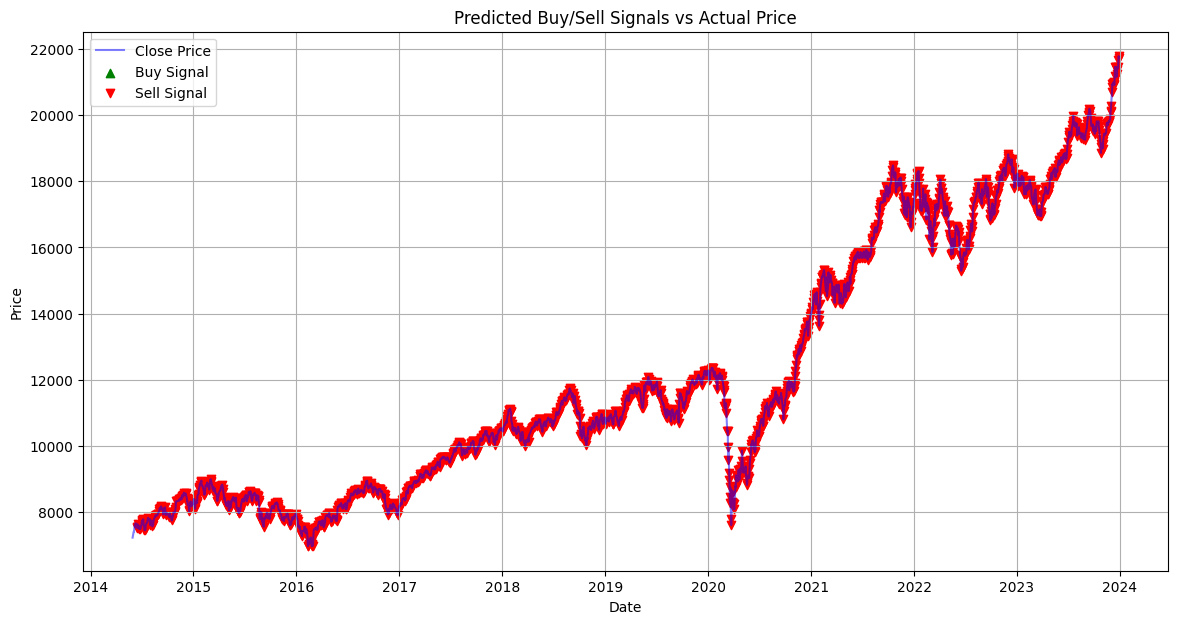

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame has 'Close', 'Predicted_Signal', 'Buy_Signal', and 'Sell_Signal' columns

# Create a figure
plt.figure(figsize=(14, 7))

# Plot the close prices
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)

# Plot Buy signals
plt.scatter(data.index[data['Buy_Signal'] == True],
            data['Close'][data['Buy_Signal'] == True],
            marker='^', color='green', label='Buy Signal', alpha=1)

# Plot Sell signals
plt.scatter(data.index[data['Sell_Signal'] == True],
            data['Close'][data['Sell_Signal'] == True],
            marker='v', color='red', label='Sell Signal', alpha=1)

# Additional graph formatting
plt.title('Predicted Buy/Sell Signals vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# prompt: save all the files in google drive in a different folder with project file with csv

import shutil
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the source directory (where your files are located)
source_dir = '/content'

# Define the destination directory (where you want to save the files)
destination_dir = '/content/drive/MyDrive/EROS2.1.2/project_files'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Iterate through all files in the source directory
for filename in os.listdir(source_dir):
  source_file = os.path.join(source_dir, filename)
  destination_file = os.path.join(destination_dir, filename)

  # Check if the file is a regular file and not a directory
  if os.path.isfile(source_file):
    try:
      # Copy the file to the destination directory
      shutil.copy2(source_file, destination_file)
      print(f"Copied {filename} to {destination_dir}")
    except Exception as e:
      print(f"Error copying {filename}: {e}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied NSE50_with_indicators_updated.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied NSE50_processed.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied pressure_volume_data.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied NSE50_with_indicators.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied technical_oscilator.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied lstm_predictions.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied NSE50_with_lstm_predictions.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied rsi_results.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied financial_data.db to /content/drive/MyDrive/EROS2.1.2/project_files
Copied NSE50.csv to /content/drive/MyDrive/EROS2.1.2/project_files
Copied Bollinger_Bands_Data.csv to /content/drive/MyDrive/EROS2.1.2/project

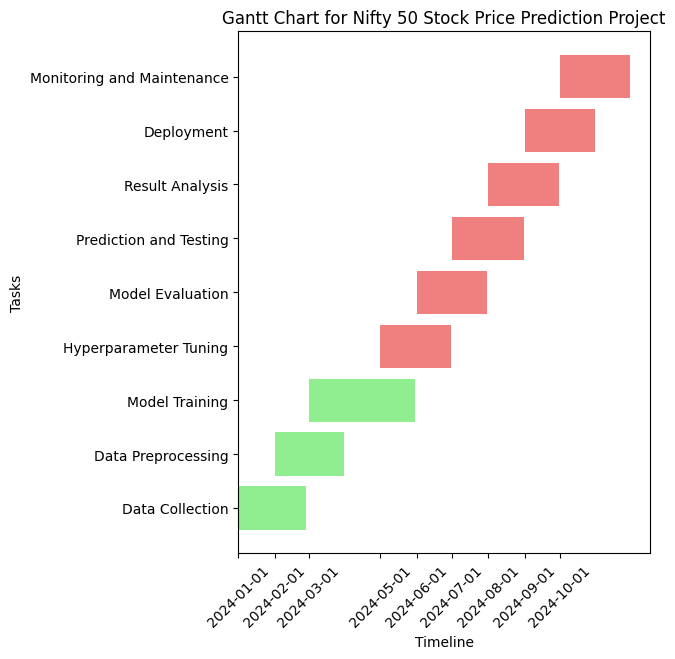

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data for the Gantt chart
data = {
    'Task': [
        'Data Collection',
        'Data Preprocessing',
        'Model Training',
        'Hyperparameter Tuning',
        'Model Evaluation',
        'Prediction and Testing',
        'Result Analysis',
        'Deployment',
        'Monitoring and Maintenance'
    ],
    'Start': [
        '2024-01-01',
        '2024-02-01',
        '2024-03-01',
        '2024-05-01',
        '2024-06-01',
        '2024-07-01',
        '2024-08-01',
        '2024-09-01',
        '2024-10-01'
    ],
    'End': [
        '2024-02-28',
        '2024-03-31',
        '2024-05-31',
        '2024-06-30',
        '2024-07-31',
        '2024-08-31',
        '2024-09-30',
        '2024-10-31',
        '2024-11-30'
    ],
    'Status': [
        'Done',
        'Done',
        'Done',
        'Active',
        'Active',
        'Active',
        'Active',
        'Active',
        'Active'
    ]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.days

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6.7, 6.7))  # Size in inches

# Create a color mapping based on task status
colors = {'Done': 'lightgreen', 'Active': 'lightcoral'}
df['Color'] = df['Status'].map(colors)

# Create the Gantt bars
for i, row in df.iterrows():
    ax.barh(row['Task'], row['Duration'], left=row['Start'].timestamp()/(24*3600), color=row['Color'])

# Set the x-axis as dates
ax.set_xticks(df['Start'].map(lambda x: x.timestamp()/(24*3600)))
ax.set_xticklabels(df['Start'].dt.strftime('%Y-%m-%d'), rotation=45)

# Set labels and title
ax.set_xlabel('Timeline')
ax.set_ylabel('Tasks')
ax.set_title('Gantt Chart for Nifty 50 Stock Price Prediction Project')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
